In [1]:
model = "lstm"
card_type = "Diamonds"

In [2]:
# Parameters
card_type = "Clubs"
model = "lstm"


In [3]:
import pandas as pd
import numpy as np
from chance_utils import compute_statistics
from matplotlib import pyplot as plt

In [4]:
possible_result = ["7","8","9","10","J","Q","K","A"]
all_cards = ['Spades','Diamonds','Hearts','Clubs']
n_outputs = 8
n_features = 8*4
sample_length = 240*5

In [5]:
dummies = pd.get_dummies(possible_result).T
dummies = dummies.reindex(index=possible_result,fill_value=0)
dummies = dummies.reset_index()
dummies

,index,0,1,2,3,4,5,6,7
0,7,1,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0
3,10,0,0,0,1,0,0,0,0
4,J,0,0,0,0,1,0,0,0
5,Q,0,0,0,0,0,1,0,0
6,K,0,0,0,0,0,0,1,0
7,A,0,0,0,0,0,0,0,1


In [6]:
def replace_with_dummies(df):
    df = pd.merge(dummies,df,left_on='index',right_on="Spades",how="right").drop(columns=["Spades"])
    df = pd.merge(dummies,df,left_on='index',right_on="Diamonds",how="right",suffixes=("_Diamonds","")).drop(columns=["Diamonds","index_Diamonds"])
    df = pd.merge(dummies,df,left_on='index',right_on="Hearts",how="right",suffixes=("_Hearts","")).drop(columns=["Hearts","index_Hearts"])
    return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])

    

In [7]:
test_chance = pd.read_csv("test_chance.csv",index_col=[0])
test_chance.Date = pd.to_datetime(test_chance.Date)

train_chance = pd.read_csv('train_chance.csv',index_col=[0])
train_chance.Date = pd.to_datetime(train_chance.Date)

In [8]:
test_chance = replace_with_dummies(test_chance)
train_chance = replace_with_dummies(train_chance)

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_91163/3572030588.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'5', '4', '0', '2', '3', '1', '7', '6'} in the result is deprecated and will raise a MergeError in a future version.
  return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])
/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_91163/3572030588.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'5', '4', '0', '2', '3', '1', '7', '6'} in the result is deprecated and will raise a MergeError in a future version.
  return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])


In [9]:
# make the samples ready to tsfresh
spades_test_chance = test_chance.sort_values(by="Date").reset_index(drop=True)
spades_test_chance['id'] = 1

spades_train_chance = train_chance.sort_values(by="Date").reset_index(drop=True)
spades_train_chance['id'] = 1

spades_train_chance.tail()

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,1,2,3,4,5,6,7,Date,lottoryNumber,id
29119,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,35924,1
29120,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,35925,1
29121,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,35926,1
29122,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,35927,1
29123,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,35928,1


In [10]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_test_rolled = roll_time_series(spades_test_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled = roll_time_series(spades_train_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled.tail()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:03<02:03,  3.16s/it]

Rolling:   5%|▌         | 2/40 [00:03<00:51,  1.36s/it]

Rolling:  15%|█▌        | 6/40 [00:04<00:19,  1.76it/s]

Rolling:  18%|█▊        | 7/40 [00:05<00:17,  1.85it/s]

Rolling:  20%|██        | 8/40 [00:05<00:15,  2.03it/s]

Rolling:  22%|██▎       | 9/40 [00:05<00:14,  2.19it/s]

Rolling:  25%|██▌       | 10/40 [00:06<00:13,  2.28it/s]

Rolling:  28%|██▊       | 11/40 [00:06<00:12,  2.35it/s]

Rolling:  30%|███       | 12/40 [00:06<00:11,  2.34it/s]

Rolling:  32%|███▎      | 13/40 [00:07<00:09,  2.73it/s]

Rolling:  35%|███▌      | 14/40 [00:07<00:10,  2.52it/s]

Rolling:  38%|███▊      | 15/40 [00:07<00:08,  2.88it/s]

Rolling:  40%|████      | 16/40 [00:08<00:07,  3.20it/s]

Rolling:  42%|████▎     | 17/40 [00:08<00:08,  2.58it/s]

Rolling:  45%|████▌     | 18/40 [00:08<00:07,  2.96it/s]

Rolling:  48%|████▊     | 19/40 [00:09<00:06,  3.26it/s]

Rolling:  50%|█████     | 20/40 [00:09<00:07,  2.52it/s]

Rolling:  52%|█████▎    | 21/40 [00:09<00:06,  2.89it/s]

Rolling:  55%|█████▌    | 22/40 [00:10<00:05,  3.20it/s]

Rolling:  57%|█████▊    | 23/40 [00:10<00:07,  2.35it/s]

Rolling:  60%|██████    | 24/40 [00:11<00:05,  2.73it/s]

Rolling:  62%|██████▎   | 25/40 [00:11<00:04,  3.07it/s]

Rolling:  65%|██████▌   | 26/40 [00:11<00:04,  3.37it/s]

Rolling:  68%|██████▊   | 27/40 [00:11<00:03,  3.64it/s]

Rolling:  70%|███████   | 28/40 [00:12<00:05,  2.30it/s]

Rolling:  72%|███████▎  | 29/40 [00:12<00:04,  2.67it/s]

Rolling:  75%|███████▌  | 30/40 [00:13<00:03,  3.05it/s]

Rolling:  78%|███████▊  | 31/40 [00:13<00:02,  3.34it/s]

Rolling:  80%|████████  | 32/40 [00:13<00:02,  3.61it/s]

Rolling:  82%|████████▎ | 33/40 [00:13<00:01,  3.84it/s]

Rolling:  85%|████████▌ | 34/40 [00:14<00:02,  2.26it/s]

Rolling:  88%|████████▊ | 35/40 [00:14<00:01,  2.67it/s]

Rolling:  90%|█████████ | 36/40 [00:15<00:01,  3.07it/s]

Rolling:  92%|█████████▎| 37/40 [00:15<00:00,  3.47it/s]

Rolling:  95%|█████████▌| 38/40 [00:15<00:00,  3.88it/s]

Rolling:  98%|█████████▊| 39/40 [00:15<00:00,  4.21it/s]

Rolling: 100%|██████████| 40/40 [00:15<00:00,  4.58it/s]

Rolling: 100%|██████████| 40/40 [00:15<00:00,  2.54it/s]

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:08<05:30,  8.48s/it]

Rolling:   5%|▌         | 2/40 [00:10<02:53,  4.55s/it]

Rolling:   8%|▊         | 3/40 [00:13<02:33,  4.16s/it]

Rolling:  10%|█         | 4/40 [00:15<01:53,  3.14s/it]

Rolling:  12%|█▎        | 5/40 [00:18<01:52,  3.21s/it]

Rolling:  15%|█▌        | 6/40 [00:20<01:30,  2.66s/it]

Rolling:  18%|█▊        | 7/40 [00:22<01:16,  2.31s/it]

Rolling:  20%|██        | 8/40 [00:25<01:23,  2.60s/it]

Rolling:  22%|██▎       | 9/40 [00:26<01:11,  2.31s/it]

Rolling:  25%|██▌       | 10/40 [00:28<01:02,  2.10s/it]

Rolling:  28%|██▊       | 11/40 [00:30<00:58,  2.01s/it]

Rolling:  30%|███       | 12/40 [00:32<00:54,  1.95s/it]

Rolling:  32%|███▎      | 13/40 [00:35<01:06,  2.46s/it]

Rolling:  35%|███▌      | 14/40 [00:37<00:58,  2.25s/it]

Rolling:  38%|███▊      | 15/40 [00:39<00:52,  2.09s/it]

Rolling:  40%|████      | 16/40 [00:41<00:47,  1.98s/it]

Rolling:  42%|████▎     | 17/40 [00:42<00:39,  1.73s/it]

Rolling:  45%|████▌     | 18/40 [00:45<00:49,  2.24s/it]

Rolling:  48%|████▊     | 19/40 [00:46<00:40,  1.95s/it]

Rolling:  50%|█████     | 20/40 [00:48<00:34,  1.71s/it]

Rolling:  52%|█████▎    | 21/40 [00:49<00:28,  1.52s/it]

Rolling:  55%|█████▌    | 22/40 [00:50<00:25,  1.41s/it]

Rolling:  57%|█████▊    | 23/40 [00:51<00:23,  1.38s/it]

Rolling:  60%|██████    | 24/40 [00:52<00:21,  1.33s/it]

Rolling:  62%|██████▎   | 25/40 [00:57<00:33,  2.22s/it]

Rolling:  65%|██████▌   | 26/40 [00:58<00:26,  1.89s/it]

Rolling:  68%|██████▊   | 27/40 [00:59<00:21,  1.69s/it]

Rolling:  70%|███████   | 28/40 [01:00<00:18,  1.54s/it]

Rolling:  72%|███████▎  | 29/40 [01:01<00:15,  1.45s/it]

Rolling:  75%|███████▌  | 30/40 [01:03<00:14,  1.43s/it]

Rolling:  78%|███████▊  | 31/40 [01:04<00:12,  1.41s/it]

Rolling:  80%|████████  | 32/40 [01:05<00:10,  1.37s/it]

Rolling:  82%|████████▎ | 33/40 [01:07<00:09,  1.32s/it]

Rolling:  85%|████████▌ | 34/40 [01:13<00:16,  2.74s/it]

Rolling:  88%|████████▊ | 35/40 [01:14<00:11,  2.29s/it]

Rolling:  90%|█████████ | 36/40 [01:15<00:07,  1.99s/it]

Rolling:  92%|█████████▎| 37/40 [01:16<00:05,  1.77s/it]

Rolling:  95%|█████████▌| 38/40 [01:18<00:03,  1.61s/it]

Rolling:  98%|█████████▊| 39/40 [01:19<00:01,  1.46s/it]

Rolling: 100%|██████████| 40/40 [01:20<00:00,  1.32s/it]

Rolling: 100%|██████████| 40/40 [01:20<00:00,  2.01s/it]

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,1,2,3,4,5,6,7,Date,lottoryNumber,id
33509995,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,35924,"(1, 2017-12-07 00:00:00.035928)"
33509996,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,35925,"(1, 2017-12-07 00:00:00.035928)"
33509997,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,35926,"(1, 2017-12-07 00:00:00.035928)"
33509998,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,35927,"(1, 2017-12-07 00:00:00.035928)"
33509999,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,35928,"(1, 2017-12-07 00:00:00.035928)"


In [11]:
test_labeling_df = test_chance.drop(columns=["Date"])
train_labeling_df = train_chance.drop(columns=["Date"])

labeling_df = pd.concat([test_labeling_df,train_labeling_df])
labeling_df.head()

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,7_Diamonds,0,1,2,3,4,5,6,7,lottoryNumber
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,35944
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,35945
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,35946
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,35947
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,35948


In [12]:
def make_a_sample(current_sample,labeling_df):
    
    current_id = current_sample['id'].values[0]
    final_label = None
    
    assert current_sample.shape[0] == sample_length, f"{current_id} is not shape of {sample_length}"

    lottey_num_predicting = (current_id[1].microsecond + 1)
    label = labeling_df[labeling_df.lottoryNumber == lottey_num_predicting]
    
    if len(label) == 1:
        final_label = label.values[0]

    sample = current_sample.drop(columns=['id','Date']).values

    return lottey_num_predicting,final_label,sample

In [13]:
train = df_train_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

train = sorted(train.values,key=lambda x:x[0])
_,train_y,train_x = map(list, zip(*train))

In [14]:
test = df_test_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

test = sorted(test.values,key=lambda x:x[0])
_,test_y,test_x = map(list, zip(*test))

In [15]:
test_y = pd.DataFrame(test_y[:-1])
last_sample = test_x[-1]

test_x = test_x[:-1]
train_y = pd.DataFrame(train_y)

In [16]:
test_x = np.stack(test_x)
train_x = np.stack(train_x)

In [17]:
test_x = test_x[:,:,:-1]
train_x = train_x[:,:,:-1]
test_y = test_y.iloc[:,:-1]
train_y = train_y.iloc[:,:-1]

In [18]:
assert test_x.shape[0] == test_y.shape[0] and train_x.shape[0] == train_y.shape[0]

In [19]:
print(f"Test shape {test_x.shape}")
print(f"Train shape {train_x.shape}")

Test shape (8509, 1200, 32)
Train shape (27925, 1200, 32)


In [20]:
test_y.iloc[:,:8].shape

(8509, 8)

In [21]:
import tensorflow as tf

if model == "lstm":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, input_shape=(sample_length,n_features)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
elif model == "nn":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(sample_length,8)))
    model.add(tf.keras.layers.Dense(350, activation='relu'))
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(150, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()
print("==========================")
for layer in model.layers:
    print(layer.input_shape)

2022-08-15 00:23:29.372147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 100)               53200     


 dropout (Dropout)           (None, 100)               0         


 dense (Dense)               (None, 100)               10100     


 dense_1 (Dense)             (None, 8)                 808       


Total params: 64,108


Trainable params: 64,108


Non-trainable params: 0


_________________________________________________________________


(None, 1200, 32)
(None, 100)
(None, 100)
(None, 100)


In [22]:
card_type_index = all_cards.index(card_type)
start_index = card_type_index*8
end_index = (card_type_index+1)*8

test_y = test_y.iloc[:,start_index:end_index]
train_y = train_y.iloc[:,start_index:end_index]

In [23]:
assert not np.isnan(train_x).any()
assert not np.isnan(train_y).any().any()
assert not np.isnan(test_x).any()
assert not np.isnan(test_y).any().any()

In [24]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
#  
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=64,epochs=300,callbacks=[es])

Epoch 1/300


  1/437 [..............................] - ETA: 24:46 - loss: 2.0924 - accuracy: 0.1094

  2/437 [..............................] - ETA: 4:59 - loss: 2.0889 - accuracy: 0.1328 

  3/437 [..............................] - ETA: 5:01 - loss: 2.0894 - accuracy: 0.1302

  4/437 [..............................] - ETA: 4:59 - loss: 2.0918 - accuracy: 0.1250

  5/437 [..............................] - ETA: 5:01 - loss: 2.0933 - accuracy: 0.1156

  6/437 [..............................] - ETA: 5:02 - loss: 2.0904 - accuracy: 0.1224

  7/437 [..............................] - ETA: 5:08 - loss: 2.0888 - accuracy: 0.1205

  8/437 [..............................] - ETA: 5:07 - loss: 2.0878 - accuracy: 0.1172

  9/437 [..............................] - ETA: 5:07 - loss: 2.0877 - accuracy: 0.1128

 10/437 [..............................] - ETA: 5:05 - loss: 2.0871 - accuracy: 0.1187

 11/437 [..............................] - ETA: 5:14 - loss: 2.0886 - accuracy: 0.1151

 12/437 [..............................] - ETA: 5:15 - loss: 2.0894 - accuracy: 0.1094

 13/437 [..............................] - ETA: 5:15 - loss: 2.0887 - accuracy: 0.1058

 14/437 [..............................] - ETA: 5:17 - loss: 2.0894 - accuracy: 0.1049

 15/437 [>.............................] - ETA: 5:15 - loss: 2.0883 - accuracy: 0.1094

 16/437 [>.............................] - ETA: 5:15 - loss: 2.0880 - accuracy: 0.1094

 17/437 [>.............................] - ETA: 5:14 - loss: 2.0882 - accuracy: 0.1094

 18/437 [>.............................] - ETA: 5:14 - loss: 2.0876 - accuracy: 0.1085

 19/437 [>.............................] - ETA: 5:14 - loss: 2.0871 - accuracy: 0.1077

 20/437 [>.............................] - ETA: 5:20 - loss: 2.0865 - accuracy: 0.1086

 21/437 [>.............................] - ETA: 5:19 - loss: 2.0864 - accuracy: 0.1094

 22/437 [>.............................] - ETA: 5:19 - loss: 2.0863 - accuracy: 0.1072

 23/437 [>.............................] - ETA: 5:18 - loss: 2.0858 - accuracy: 0.1080

 24/437 [>.............................] - ETA: 5:18 - loss: 2.0857 - accuracy: 0.1094

 25/437 [>.............................] - ETA: 5:18 - loss: 2.0852 - accuracy: 0.1125

 26/437 [>.............................] - ETA: 5:18 - loss: 2.0851 - accuracy: 0.1130

 27/437 [>.............................] - ETA: 5:18 - loss: 2.0844 - accuracy: 0.1163

 28/437 [>.............................] - ETA: 5:17 - loss: 2.0840 - accuracy: 0.1183

 29/437 [>.............................] - ETA: 5:17 - loss: 2.0840 - accuracy: 0.1196

 30/437 [=>............................] - ETA: 5:16 - loss: 2.0836 - accuracy: 0.1203

 31/437 [=>............................] - ETA: 5:16 - loss: 2.0830 - accuracy: 0.1230

 32/437 [=>............................] - ETA: 5:16 - loss: 2.0835 - accuracy: 0.1211

 33/437 [=>............................] - ETA: 5:16 - loss: 2.0834 - accuracy: 0.1198

 34/437 [=>............................] - ETA: 5:25 - loss: 2.0833 - accuracy: 0.1199

 35/437 [=>............................] - ETA: 5:26 - loss: 2.0828 - accuracy: 0.1223

 36/437 [=>............................] - ETA: 5:26 - loss: 2.0828 - accuracy: 0.1228

 37/437 [=>............................] - ETA: 5:26 - loss: 2.0825 - accuracy: 0.1237

 38/437 [=>............................] - ETA: 5:25 - loss: 2.0821 - accuracy: 0.1242

 39/437 [=>............................] - ETA: 5:27 - loss: 2.0822 - accuracy: 0.1230

 40/437 [=>............................] - ETA: 5:26 - loss: 2.0819 - accuracy: 0.1230

 41/437 [=>............................] - ETA: 5:25 - loss: 2.0820 - accuracy: 0.1220

 42/437 [=>............................] - ETA: 5:25 - loss: 2.0820 - accuracy: 0.1224

 43/437 [=>............................] - ETA: 5:30 - loss: 2.0820 - accuracy: 0.1217

 44/437 [==>...........................] - ETA: 5:29 - loss: 2.0822 - accuracy: 0.1222

 45/437 [==>...........................] - ETA: 5:28 - loss: 2.0820 - accuracy: 0.1233

 46/437 [==>...........................] - ETA: 5:27 - loss: 2.0820 - accuracy: 0.1219

 47/437 [==>...........................] - ETA: 5:28 - loss: 2.0818 - accuracy: 0.1230

 48/437 [==>...........................] - ETA: 5:27 - loss: 2.0819 - accuracy: 0.1230

 49/437 [==>...........................] - ETA: 5:25 - loss: 2.0820 - accuracy: 0.1228

 50/437 [==>...........................] - ETA: 5:24 - loss: 2.0821 - accuracy: 0.1222

 51/437 [==>...........................] - ETA: 5:23 - loss: 2.0823 - accuracy: 0.1213

 52/437 [==>...........................] - ETA: 5:22 - loss: 2.0819 - accuracy: 0.1220

 53/437 [==>...........................] - ETA: 5:22 - loss: 2.0820 - accuracy: 0.1223

 54/437 [==>...........................] - ETA: 5:27 - loss: 2.0821 - accuracy: 0.1224

 55/437 [==>...........................] - ETA: 5:29 - loss: 2.0823 - accuracy: 0.1224

 56/437 [==>...........................] - ETA: 5:30 - loss: 2.0822 - accuracy: 0.1244

 57/437 [==>...........................] - ETA: 5:28 - loss: 2.0821 - accuracy: 0.1250

 58/437 [==>...........................] - ETA: 5:26 - loss: 2.0818 - accuracy: 0.1255

 59/437 [===>..........................] - ETA: 5:24 - loss: 2.0817 - accuracy: 0.1266

 60/437 [===>..........................] - ETA: 5:24 - loss: 2.0821 - accuracy: 0.1253

 61/437 [===>..........................] - ETA: 5:22 - loss: 2.0820 - accuracy: 0.1255

 62/437 [===>..........................] - ETA: 5:20 - loss: 2.0820 - accuracy: 0.1250

 63/437 [===>..........................] - ETA: 5:18 - loss: 2.0822 - accuracy: 0.1250

 64/437 [===>..........................] - ETA: 5:23 - loss: 2.0818 - accuracy: 0.1262

 65/437 [===>..........................] - ETA: 5:21 - loss: 2.0817 - accuracy: 0.1269

 66/437 [===>..........................] - ETA: 5:20 - loss: 2.0816 - accuracy: 0.1274

 67/437 [===>..........................] - ETA: 5:19 - loss: 2.0814 - accuracy: 0.1276

 68/437 [===>..........................] - ETA: 5:18 - loss: 2.0813 - accuracy: 0.1280

 69/437 [===>..........................] - ETA: 5:16 - loss: 2.0814 - accuracy: 0.1275

 70/437 [===>..........................] - ETA: 5:14 - loss: 2.0816 - accuracy: 0.1268

 71/437 [===>..........................] - ETA: 5:12 - loss: 2.0814 - accuracy: 0.1276

 72/437 [===>..........................] - ETA: 5:11 - loss: 2.0817 - accuracy: 0.1267

 73/437 [====>.........................] - ETA: 5:09 - loss: 2.0818 - accuracy: 0.1267

 74/437 [====>.........................] - ETA: 5:09 - loss: 2.0820 - accuracy: 0.1258

 75/437 [====>.........................] - ETA: 5:07 - loss: 2.0821 - accuracy: 0.1254

 76/437 [====>.........................] - ETA: 5:06 - loss: 2.0820 - accuracy: 0.1252

 77/437 [====>.........................] - ETA: 5:04 - loss: 2.0820 - accuracy: 0.1256

 78/437 [====>.........................] - ETA: 5:04 - loss: 2.0820 - accuracy: 0.1260

 79/437 [====>.........................] - ETA: 5:03 - loss: 2.0821 - accuracy: 0.1266

 80/437 [====>.........................] - ETA: 5:01 - loss: 2.0823 - accuracy: 0.1254

 81/437 [====>.........................] - ETA: 5:04 - loss: 2.0822 - accuracy: 0.1256

 82/437 [====>.........................] - ETA: 5:05 - loss: 2.0823 - accuracy: 0.1258

 83/437 [====>.........................] - ETA: 5:03 - loss: 2.0822 - accuracy: 0.1265

 84/437 [====>.........................] - ETA: 5:02 - loss: 2.0824 - accuracy: 0.1265

 85/437 [====>.........................] - ETA: 5:02 - loss: 2.0823 - accuracy: 0.1270

 86/437 [====>.........................] - ETA: 5:02 - loss: 2.0822 - accuracy: 0.1275

 87/437 [====>.........................] - ETA: 5:00 - loss: 2.0822 - accuracy: 0.1273

 88/437 [=====>........................] - ETA: 4:59 - loss: 2.0822 - accuracy: 0.1273

 89/437 [=====>........................] - ETA: 5:02 - loss: 2.0821 - accuracy: 0.1266

 90/437 [=====>........................] - ETA: 5:02 - loss: 2.0818 - accuracy: 0.1281

 91/437 [=====>........................] - ETA: 5:00 - loss: 2.0817 - accuracy: 0.1284

 92/437 [=====>........................] - ETA: 4:59 - loss: 2.0818 - accuracy: 0.1281

 93/437 [=====>........................] - ETA: 4:58 - loss: 2.0819 - accuracy: 0.1279

 94/437 [=====>........................] - ETA: 4:57 - loss: 2.0821 - accuracy: 0.1275

 95/437 [=====>........................] - ETA: 4:58 - loss: 2.0820 - accuracy: 0.1276

 96/437 [=====>........................] - ETA: 4:57 - loss: 2.0823 - accuracy: 0.1270

 97/437 [=====>........................] - ETA: 4:55 - loss: 2.0824 - accuracy: 0.1266

 98/437 [=====>........................] - ETA: 4:55 - loss: 2.0822 - accuracy: 0.1272

 99/437 [=====>........................] - ETA: 4:53 - loss: 2.0824 - accuracy: 0.1275

100/437 [=====>........................] - ETA: 4:52 - loss: 2.0825 - accuracy: 0.1275

101/437 [=====>........................] - ETA: 4:51 - loss: 2.0824 - accuracy: 0.1279

102/437 [======>.......................] - ETA: 4:49 - loss: 2.0824 - accuracy: 0.1284

103/437 [======>.......................] - ETA: 4:48 - loss: 2.0822 - accuracy: 0.1289

104/437 [======>.......................] - ETA: 4:47 - loss: 2.0823 - accuracy: 0.1282

105/437 [======>.......................] - ETA: 4:46 - loss: 2.0824 - accuracy: 0.1277

106/437 [======>.......................] - ETA: 4:44 - loss: 2.0822 - accuracy: 0.1282

107/437 [======>.......................] - ETA: 4:44 - loss: 2.0822 - accuracy: 0.1284

108/437 [======>.......................] - ETA: 4:42 - loss: 2.0824 - accuracy: 0.1277

109/437 [======>.......................] - ETA: 4:41 - loss: 2.0824 - accuracy: 0.1273

110/437 [======>.......................] - ETA: 4:40 - loss: 2.0826 - accuracy: 0.1267

111/437 [======>.......................] - ETA: 4:39 - loss: 2.0825 - accuracy: 0.1270

112/437 [======>.......................] - ETA: 4:38 - loss: 2.0826 - accuracy: 0.1271

113/437 [======>.......................] - ETA: 4:37 - loss: 2.0827 - accuracy: 0.1265

114/437 [======>.......................] - ETA: 4:36 - loss: 2.0828 - accuracy: 0.1269

115/437 [======>.......................] - ETA: 4:34 - loss: 2.0826 - accuracy: 0.1277

116/437 [======>.......................] - ETA: 4:34 - loss: 2.0827 - accuracy: 0.1281

117/437 [=======>......................] - ETA: 4:33 - loss: 2.0827 - accuracy: 0.1274

118/437 [=======>......................] - ETA: 4:31 - loss: 2.0828 - accuracy: 0.1267

119/437 [=======>......................] - ETA: 4:30 - loss: 2.0828 - accuracy: 0.1267

120/437 [=======>......................] - ETA: 4:29 - loss: 2.0828 - accuracy: 0.1264

121/437 [=======>......................] - ETA: 4:28 - loss: 2.0828 - accuracy: 0.1265

122/437 [=======>......................] - ETA: 4:28 - loss: 2.0828 - accuracy: 0.1264

123/437 [=======>......................] - ETA: 4:27 - loss: 2.0828 - accuracy: 0.1265

124/437 [=======>......................] - ETA: 4:26 - loss: 2.0829 - accuracy: 0.1261

125/437 [=======>......................] - ETA: 4:27 - loss: 2.0829 - accuracy: 0.1265

126/437 [=======>......................] - ETA: 4:25 - loss: 2.0830 - accuracy: 0.1259

127/437 [=======>......................] - ETA: 4:25 - loss: 2.0829 - accuracy: 0.1257

128/437 [=======>......................] - ETA: 4:25 - loss: 2.0829 - accuracy: 0.1257

129/437 [=======>......................] - ETA: 4:24 - loss: 2.0829 - accuracy: 0.1257

130/437 [=======>......................] - ETA: 4:23 - loss: 2.0829 - accuracy: 0.1252

131/437 [=======>......................] - ETA: 4:22 - loss: 2.0830 - accuracy: 0.1250

132/437 [========>.....................] - ETA: 4:23 - loss: 2.0829 - accuracy: 0.1252

133/437 [========>.....................] - ETA: 4:22 - loss: 2.0829 - accuracy: 0.1256

134/437 [========>.....................] - ETA: 4:21 - loss: 2.0829 - accuracy: 0.1256

135/437 [========>.....................] - ETA: 4:21 - loss: 2.0829 - accuracy: 0.1258

136/437 [========>.....................] - ETA: 4:20 - loss: 2.0829 - accuracy: 0.1256

137/437 [========>.....................] - ETA: 4:20 - loss: 2.0829 - accuracy: 0.1253

138/437 [========>.....................] - ETA: 4:19 - loss: 2.0830 - accuracy: 0.1247

139/437 [========>.....................] - ETA: 4:18 - loss: 2.0830 - accuracy: 0.1247

140/437 [========>.....................] - ETA: 4:16 - loss: 2.0829 - accuracy: 0.1247

141/437 [========>.....................] - ETA: 4:15 - loss: 2.0830 - accuracy: 0.1244

142/437 [========>.....................] - ETA: 4:14 - loss: 2.0830 - accuracy: 0.1240

143/437 [========>.....................] - ETA: 4:14 - loss: 2.0829 - accuracy: 0.1239

144/437 [========>.....................] - ETA: 4:13 - loss: 2.0829 - accuracy: 0.1238

145/437 [========>.....................] - ETA: 4:12 - loss: 2.0829 - accuracy: 0.1234

146/437 [=========>....................] - ETA: 4:11 - loss: 2.0829 - accuracy: 0.1234

147/437 [=========>....................] - ETA: 4:10 - loss: 2.0829 - accuracy: 0.1234

148/437 [=========>....................] - ETA: 4:09 - loss: 2.0830 - accuracy: 0.1235

149/437 [=========>....................] - ETA: 4:09 - loss: 2.0829 - accuracy: 0.1233

150/437 [=========>....................] - ETA: 4:08 - loss: 2.0828 - accuracy: 0.1243

151/437 [=========>....................] - ETA: 4:07 - loss: 2.0827 - accuracy: 0.1247

152/437 [=========>....................] - ETA: 4:06 - loss: 2.0827 - accuracy: 0.1249

153/437 [=========>....................] - ETA: 4:05 - loss: 2.0827 - accuracy: 0.1251

154/437 [=========>....................] - ETA: 4:04 - loss: 2.0827 - accuracy: 0.1252

155/437 [=========>....................] - ETA: 4:03 - loss: 2.0826 - accuracy: 0.1252

156/437 [=========>....................] - ETA: 4:03 - loss: 2.0827 - accuracy: 0.1252

157/437 [=========>....................] - ETA: 4:02 - loss: 2.0826 - accuracy: 0.1253

158/437 [=========>....................] - ETA: 4:01 - loss: 2.0827 - accuracy: 0.1247

159/437 [=========>....................] - ETA: 4:00 - loss: 2.0825 - accuracy: 0.1248

160/437 [=========>....................] - ETA: 3:59 - loss: 2.0825 - accuracy: 0.1249

161/437 [==========>...................] - ETA: 3:59 - loss: 2.0825 - accuracy: 0.1248

162/437 [==========>...................] - ETA: 3:58 - loss: 2.0825 - accuracy: 0.1249

163/437 [==========>...................] - ETA: 3:57 - loss: 2.0825 - accuracy: 0.1249

164/437 [==========>...................] - ETA: 3:56 - loss: 2.0824 - accuracy: 0.1254

165/437 [==========>...................] - ETA: 3:55 - loss: 2.0824 - accuracy: 0.1252

166/437 [==========>...................] - ETA: 3:54 - loss: 2.0825 - accuracy: 0.1253

167/437 [==========>...................] - ETA: 3:53 - loss: 2.0825 - accuracy: 0.1254

168/437 [==========>...................] - ETA: 3:52 - loss: 2.0825 - accuracy: 0.1252

169/437 [==========>...................] - ETA: 3:51 - loss: 2.0825 - accuracy: 0.1249

170/437 [==========>...................] - ETA: 3:50 - loss: 2.0825 - accuracy: 0.1248

171/437 [==========>...................] - ETA: 3:49 - loss: 2.0824 - accuracy: 0.1248

172/437 [==========>...................] - ETA: 3:49 - loss: 2.0824 - accuracy: 0.1248

173/437 [==========>...................] - ETA: 3:48 - loss: 2.0824 - accuracy: 0.1249

174/437 [==========>...................] - ETA: 3:48 - loss: 2.0824 - accuracy: 0.1248

175/437 [===========>..................] - ETA: 3:47 - loss: 2.0824 - accuracy: 0.1248

176/437 [===========>..................] - ETA: 3:46 - loss: 2.0824 - accuracy: 0.1251

177/437 [===========>..................] - ETA: 3:46 - loss: 2.0824 - accuracy: 0.1251

178/437 [===========>..................] - ETA: 3:45 - loss: 2.0823 - accuracy: 0.1250

179/437 [===========>..................] - ETA: 3:44 - loss: 2.0824 - accuracy: 0.1251

180/437 [===========>..................] - ETA: 3:43 - loss: 2.0825 - accuracy: 0.1248

181/437 [===========>..................] - ETA: 3:42 - loss: 2.0826 - accuracy: 0.1247

182/437 [===========>..................] - ETA: 3:42 - loss: 2.0825 - accuracy: 0.1253

183/437 [===========>..................] - ETA: 3:41 - loss: 2.0825 - accuracy: 0.1253

184/437 [===========>..................] - ETA: 3:40 - loss: 2.0825 - accuracy: 0.1256

185/437 [===========>..................] - ETA: 3:40 - loss: 2.0825 - accuracy: 0.1256

186/437 [===========>..................] - ETA: 3:39 - loss: 2.0825 - accuracy: 0.1260

187/437 [===========>..................] - ETA: 3:39 - loss: 2.0824 - accuracy: 0.1261

188/437 [===========>..................] - ETA: 3:38 - loss: 2.0824 - accuracy: 0.1259

189/437 [===========>..................] - ETA: 3:37 - loss: 2.0825 - accuracy: 0.1257

190/437 [============>.................] - ETA: 3:36 - loss: 2.0825 - accuracy: 0.1257

191/437 [============>.................] - ETA: 3:35 - loss: 2.0825 - accuracy: 0.1255

192/437 [============>.................] - ETA: 3:34 - loss: 2.0825 - accuracy: 0.1252

193/437 [============>.................] - ETA: 3:33 - loss: 2.0825 - accuracy: 0.1248

194/437 [============>.................] - ETA: 3:32 - loss: 2.0825 - accuracy: 0.1248

195/437 [============>.................] - ETA: 3:31 - loss: 2.0824 - accuracy: 0.1251

196/437 [============>.................] - ETA: 3:30 - loss: 2.0823 - accuracy: 0.1251

197/437 [============>.................] - ETA: 3:29 - loss: 2.0823 - accuracy: 0.1249

198/437 [============>.................] - ETA: 3:28 - loss: 2.0823 - accuracy: 0.1254

199/437 [============>.................] - ETA: 3:27 - loss: 2.0823 - accuracy: 0.1253

200/437 [============>.................] - ETA: 3:26 - loss: 2.0822 - accuracy: 0.1258

201/437 [============>.................] - ETA: 3:25 - loss: 2.0822 - accuracy: 0.1258

202/437 [============>.................] - ETA: 3:24 - loss: 2.0823 - accuracy: 0.1255

203/437 [============>.................] - ETA: 3:23 - loss: 2.0822 - accuracy: 0.1258

204/437 [=============>................] - ETA: 3:22 - loss: 2.0823 - accuracy: 0.1258

205/437 [=============>................] - ETA: 3:21 - loss: 2.0821 - accuracy: 0.1261

206/437 [=============>................] - ETA: 3:20 - loss: 2.0823 - accuracy: 0.1260

207/437 [=============>................] - ETA: 3:19 - loss: 2.0822 - accuracy: 0.1259

208/437 [=============>................] - ETA: 3:18 - loss: 2.0822 - accuracy: 0.1259

209/437 [=============>................] - ETA: 3:17 - loss: 2.0822 - accuracy: 0.1257

210/437 [=============>................] - ETA: 3:16 - loss: 2.0822 - accuracy: 0.1258

211/437 [=============>................] - ETA: 3:15 - loss: 2.0823 - accuracy: 0.1256

212/437 [=============>................] - ETA: 3:15 - loss: 2.0824 - accuracy: 0.1258

213/437 [=============>................] - ETA: 3:14 - loss: 2.0823 - accuracy: 0.1255

214/437 [=============>................] - ETA: 3:13 - loss: 2.0823 - accuracy: 0.1256

215/437 [=============>................] - ETA: 3:12 - loss: 2.0822 - accuracy: 0.1254

216/437 [=============>................] - ETA: 3:11 - loss: 2.0823 - accuracy: 0.1254

217/437 [=============>................] - ETA: 3:10 - loss: 2.0823 - accuracy: 0.1254

218/437 [=============>................] - ETA: 3:10 - loss: 2.0823 - accuracy: 0.1254

219/437 [==============>...............] - ETA: 3:09 - loss: 2.0823 - accuracy: 0.1254

220/437 [==============>...............] - ETA: 3:08 - loss: 2.0822 - accuracy: 0.1256

221/437 [==============>...............] - ETA: 3:07 - loss: 2.0823 - accuracy: 0.1256

222/437 [==============>...............] - ETA: 3:06 - loss: 2.0822 - accuracy: 0.1258

223/437 [==============>...............] - ETA: 3:06 - loss: 2.0823 - accuracy: 0.1256

224/437 [==============>...............] - ETA: 3:05 - loss: 2.0822 - accuracy: 0.1258

225/437 [==============>...............] - ETA: 3:04 - loss: 2.0822 - accuracy: 0.1258

226/437 [==============>...............] - ETA: 3:03 - loss: 2.0822 - accuracy: 0.1261

227/437 [==============>...............] - ETA: 3:02 - loss: 2.0822 - accuracy: 0.1260

228/437 [==============>...............] - ETA: 3:01 - loss: 2.0821 - accuracy: 0.1262

229/437 [==============>...............] - ETA: 3:00 - loss: 2.0821 - accuracy: 0.1262

230/437 [==============>...............] - ETA: 2:59 - loss: 2.0821 - accuracy: 0.1263

231/437 [==============>...............] - ETA: 2:58 - loss: 2.0822 - accuracy: 0.1260

232/437 [==============>...............] - ETA: 2:58 - loss: 2.0822 - accuracy: 0.1263

233/437 [==============>...............] - ETA: 2:57 - loss: 2.0822 - accuracy: 0.1263

234/437 [===============>..............] - ETA: 2:56 - loss: 2.0821 - accuracy: 0.1265

235/437 [===============>..............] - ETA: 2:55 - loss: 2.0821 - accuracy: 0.1267

236/437 [===============>..............] - ETA: 2:54 - loss: 2.0822 - accuracy: 0.1264

237/437 [===============>..............] - ETA: 2:53 - loss: 2.0821 - accuracy: 0.1267

238/437 [===============>..............] - ETA: 2:52 - loss: 2.0821 - accuracy: 0.1266

239/437 [===============>..............] - ETA: 2:51 - loss: 2.0821 - accuracy: 0.1266

240/437 [===============>..............] - ETA: 2:50 - loss: 2.0822 - accuracy: 0.1265

241/437 [===============>..............] - ETA: 2:49 - loss: 2.0822 - accuracy: 0.1264

242/437 [===============>..............] - ETA: 2:48 - loss: 2.0822 - accuracy: 0.1263

243/437 [===============>..............] - ETA: 2:48 - loss: 2.0822 - accuracy: 0.1262

244/437 [===============>..............] - ETA: 2:47 - loss: 2.0821 - accuracy: 0.1263

245/437 [===============>..............] - ETA: 2:46 - loss: 2.0821 - accuracy: 0.1265

246/437 [===============>..............] - ETA: 2:45 - loss: 2.0821 - accuracy: 0.1263

247/437 [===============>..............] - ETA: 2:44 - loss: 2.0821 - accuracy: 0.1263

248/437 [================>.............] - ETA: 2:43 - loss: 2.0821 - accuracy: 0.1263

249/437 [================>.............] - ETA: 2:42 - loss: 2.0822 - accuracy: 0.1259

250/437 [================>.............] - ETA: 2:41 - loss: 2.0822 - accuracy: 0.1258

251/437 [================>.............] - ETA: 2:41 - loss: 2.0822 - accuracy: 0.1256

252/437 [================>.............] - ETA: 2:40 - loss: 2.0821 - accuracy: 0.1258

253/437 [================>.............] - ETA: 2:39 - loss: 2.0822 - accuracy: 0.1257

254/437 [================>.............] - ETA: 2:38 - loss: 2.0822 - accuracy: 0.1254

255/437 [================>.............] - ETA: 2:37 - loss: 2.0822 - accuracy: 0.1255

256/437 [================>.............] - ETA: 2:36 - loss: 2.0822 - accuracy: 0.1257

257/437 [================>.............] - ETA: 2:35 - loss: 2.0822 - accuracy: 0.1259

258/437 [================>.............] - ETA: 2:34 - loss: 2.0822 - accuracy: 0.1257

259/437 [================>.............] - ETA: 2:33 - loss: 2.0822 - accuracy: 0.1256

260/437 [================>.............] - ETA: 2:32 - loss: 2.0822 - accuracy: 0.1257

261/437 [================>.............] - ETA: 2:31 - loss: 2.0823 - accuracy: 0.1256

262/437 [================>.............] - ETA: 2:31 - loss: 2.0822 - accuracy: 0.1257

263/437 [=================>............] - ETA: 2:30 - loss: 2.0822 - accuracy: 0.1261

264/437 [=================>............] - ETA: 2:29 - loss: 2.0822 - accuracy: 0.1261

265/437 [=================>............] - ETA: 2:28 - loss: 2.0822 - accuracy: 0.1261

266/437 [=================>............] - ETA: 2:27 - loss: 2.0821 - accuracy: 0.1264

267/437 [=================>............] - ETA: 2:26 - loss: 2.0821 - accuracy: 0.1262

268/437 [=================>............] - ETA: 2:25 - loss: 2.0822 - accuracy: 0.1263

269/437 [=================>............] - ETA: 2:24 - loss: 2.0823 - accuracy: 0.1260

270/437 [=================>............] - ETA: 2:23 - loss: 2.0822 - accuracy: 0.1259

271/437 [=================>............] - ETA: 2:22 - loss: 2.0822 - accuracy: 0.1261

272/437 [=================>............] - ETA: 2:21 - loss: 2.0822 - accuracy: 0.1260

273/437 [=================>............] - ETA: 2:21 - loss: 2.0821 - accuracy: 0.1263

274/437 [=================>............] - ETA: 2:20 - loss: 2.0821 - accuracy: 0.1262

275/437 [=================>............] - ETA: 2:19 - loss: 2.0821 - accuracy: 0.1261

276/437 [=================>............] - ETA: 2:18 - loss: 2.0821 - accuracy: 0.1261

277/437 [==================>...........] - ETA: 2:17 - loss: 2.0821 - accuracy: 0.1260

278/437 [==================>...........] - ETA: 2:16 - loss: 2.0821 - accuracy: 0.1260

279/437 [==================>...........] - ETA: 2:15 - loss: 2.0821 - accuracy: 0.1260

280/437 [==================>...........] - ETA: 2:15 - loss: 2.0821 - accuracy: 0.1262

281/437 [==================>...........] - ETA: 2:14 - loss: 2.0821 - accuracy: 0.1260

282/437 [==================>...........] - ETA: 2:13 - loss: 2.0821 - accuracy: 0.1261

283/437 [==================>...........] - ETA: 2:12 - loss: 2.0821 - accuracy: 0.1260

284/437 [==================>...........] - ETA: 2:11 - loss: 2.0821 - accuracy: 0.1261

285/437 [==================>...........] - ETA: 2:10 - loss: 2.0821 - accuracy: 0.1258

286/437 [==================>...........] - ETA: 2:10 - loss: 2.0821 - accuracy: 0.1258

287/437 [==================>...........] - ETA: 2:09 - loss: 2.0821 - accuracy: 0.1261

288/437 [==================>...........] - ETA: 2:08 - loss: 2.0821 - accuracy: 0.1260

289/437 [==================>...........] - ETA: 2:07 - loss: 2.0821 - accuracy: 0.1260

290/437 [==================>...........] - ETA: 2:07 - loss: 2.0820 - accuracy: 0.1264

291/437 [==================>...........] - ETA: 2:06 - loss: 2.0820 - accuracy: 0.1266

292/437 [===================>..........] - ETA: 2:05 - loss: 2.0820 - accuracy: 0.1265

293/437 [===================>..........] - ETA: 2:04 - loss: 2.0820 - accuracy: 0.1267

294/437 [===================>..........] - ETA: 2:03 - loss: 2.0820 - accuracy: 0.1268

295/437 [===================>..........] - ETA: 2:02 - loss: 2.0820 - accuracy: 0.1265

296/437 [===================>..........] - ETA: 2:01 - loss: 2.0821 - accuracy: 0.1263

297/437 [===================>..........] - ETA: 2:00 - loss: 2.0821 - accuracy: 0.1262

298/437 [===================>..........] - ETA: 2:00 - loss: 2.0820 - accuracy: 0.1262

299/437 [===================>..........] - ETA: 1:59 - loss: 2.0821 - accuracy: 0.1261

300/437 [===================>..........] - ETA: 1:58 - loss: 2.0821 - accuracy: 0.1260

301/437 [===================>..........] - ETA: 1:57 - loss: 2.0821 - accuracy: 0.1261

302/437 [===================>..........] - ETA: 1:56 - loss: 2.0821 - accuracy: 0.1262

303/437 [===================>..........] - ETA: 1:56 - loss: 2.0821 - accuracy: 0.1262

304/437 [===================>..........] - ETA: 1:55 - loss: 2.0821 - accuracy: 0.1263

305/437 [===================>..........] - ETA: 1:54 - loss: 2.0821 - accuracy: 0.1261

306/437 [====================>.........] - ETA: 1:53 - loss: 2.0821 - accuracy: 0.1263

307/437 [====================>.........] - ETA: 1:52 - loss: 2.0821 - accuracy: 0.1263

308/437 [====================>.........] - ETA: 1:51 - loss: 2.0821 - accuracy: 0.1261

309/437 [====================>.........] - ETA: 1:50 - loss: 2.0821 - accuracy: 0.1261

310/437 [====================>.........] - ETA: 1:50 - loss: 2.0821 - accuracy: 0.1264

311/437 [====================>.........] - ETA: 1:49 - loss: 2.0821 - accuracy: 0.1266

312/437 [====================>.........] - ETA: 1:48 - loss: 2.0821 - accuracy: 0.1264

313/437 [====================>.........] - ETA: 1:47 - loss: 2.0821 - accuracy: 0.1263

314/437 [====================>.........] - ETA: 1:47 - loss: 2.0821 - accuracy: 0.1263

315/437 [====================>.........] - ETA: 1:46 - loss: 2.0821 - accuracy: 0.1262

316/437 [====================>.........] - ETA: 1:45 - loss: 2.0821 - accuracy: 0.1262

317/437 [====================>.........] - ETA: 1:44 - loss: 2.0821 - accuracy: 0.1262

318/437 [====================>.........] - ETA: 1:43 - loss: 2.0821 - accuracy: 0.1262

319/437 [====================>.........] - ETA: 1:42 - loss: 2.0821 - accuracy: 0.1264

320/437 [====================>.........] - ETA: 1:41 - loss: 2.0821 - accuracy: 0.1262

321/437 [=====================>........] - ETA: 1:41 - loss: 2.0821 - accuracy: 0.1261

322/437 [=====================>........] - ETA: 1:40 - loss: 2.0821 - accuracy: 0.1259

323/437 [=====================>........] - ETA: 1:39 - loss: 2.0821 - accuracy: 0.1258

324/437 [=====================>........] - ETA: 1:38 - loss: 2.0821 - accuracy: 0.1257

325/437 [=====================>........] - ETA: 1:37 - loss: 2.0821 - accuracy: 0.1256

326/437 [=====================>........] - ETA: 1:36 - loss: 2.0821 - accuracy: 0.1255

327/437 [=====================>........] - ETA: 1:35 - loss: 2.0821 - accuracy: 0.1254

328/437 [=====================>........] - ETA: 1:35 - loss: 2.0821 - accuracy: 0.1253

329/437 [=====================>........] - ETA: 1:34 - loss: 2.0821 - accuracy: 0.1254

330/437 [=====================>........] - ETA: 1:33 - loss: 2.0821 - accuracy: 0.1254

331/437 [=====================>........] - ETA: 1:32 - loss: 2.0821 - accuracy: 0.1254

332/437 [=====================>........] - ETA: 1:31 - loss: 2.0821 - accuracy: 0.1255

333/437 [=====================>........] - ETA: 1:30 - loss: 2.0821 - accuracy: 0.1253

334/437 [=====================>........] - ETA: 1:30 - loss: 2.0821 - accuracy: 0.1253

335/437 [=====================>........] - ETA: 1:29 - loss: 2.0821 - accuracy: 0.1252

336/437 [======================>.......] - ETA: 1:28 - loss: 2.0821 - accuracy: 0.1252

337/437 [======================>.......] - ETA: 1:27 - loss: 2.0821 - accuracy: 0.1254

338/437 [======================>.......] - ETA: 1:26 - loss: 2.0822 - accuracy: 0.1253

339/437 [======================>.......] - ETA: 1:25 - loss: 2.0821 - accuracy: 0.1255

340/437 [======================>.......] - ETA: 1:24 - loss: 2.0821 - accuracy: 0.1256

341/437 [======================>.......] - ETA: 1:24 - loss: 2.0821 - accuracy: 0.1255

342/437 [======================>.......] - ETA: 1:23 - loss: 2.0821 - accuracy: 0.1255

343/437 [======================>.......] - ETA: 1:22 - loss: 2.0822 - accuracy: 0.1254

344/437 [======================>.......] - ETA: 1:21 - loss: 2.0821 - accuracy: 0.1254

345/437 [======================>.......] - ETA: 1:20 - loss: 2.0822 - accuracy: 0.1254

346/437 [======================>.......] - ETA: 1:19 - loss: 2.0821 - accuracy: 0.1254

347/437 [======================>.......] - ETA: 1:19 - loss: 2.0822 - accuracy: 0.1252

348/437 [======================>.......] - ETA: 1:18 - loss: 2.0822 - accuracy: 0.1250

349/437 [======================>.......] - ETA: 1:17 - loss: 2.0822 - accuracy: 0.1250

350/437 [=======================>......] - ETA: 1:16 - loss: 2.0822 - accuracy: 0.1248

351/437 [=======================>......] - ETA: 1:15 - loss: 2.0822 - accuracy: 0.1248

352/437 [=======================>......] - ETA: 1:14 - loss: 2.0821 - accuracy: 0.1249

353/437 [=======================>......] - ETA: 1:13 - loss: 2.0821 - accuracy: 0.1249

354/437 [=======================>......] - ETA: 1:12 - loss: 2.0821 - accuracy: 0.1249

355/437 [=======================>......] - ETA: 1:11 - loss: 2.0821 - accuracy: 0.1250

356/437 [=======================>......] - ETA: 1:10 - loss: 2.0821 - accuracy: 0.1250

357/437 [=======================>......] - ETA: 1:09 - loss: 2.0821 - accuracy: 0.1249

358/437 [=======================>......] - ETA: 1:09 - loss: 2.0821 - accuracy: 0.1249

359/437 [=======================>......] - ETA: 1:08 - loss: 2.0821 - accuracy: 0.1246

360/437 [=======================>......] - ETA: 1:07 - loss: 2.0821 - accuracy: 0.1247

361/437 [=======================>......] - ETA: 1:06 - loss: 2.0821 - accuracy: 0.1247

362/437 [=======================>......] - ETA: 1:05 - loss: 2.0821 - accuracy: 0.1248

363/437 [=======================>......] - ETA: 1:04 - loss: 2.0821 - accuracy: 0.1247

364/437 [=======================>......] - ETA: 1:03 - loss: 2.0821 - accuracy: 0.1246

365/437 [========================>.....] - ETA: 1:02 - loss: 2.0821 - accuracy: 0.1246

366/437 [========================>.....] - ETA: 1:01 - loss: 2.0821 - accuracy: 0.1244

367/437 [========================>.....] - ETA: 1:01 - loss: 2.0821 - accuracy: 0.1244

368/437 [========================>.....] - ETA: 1:00 - loss: 2.0821 - accuracy: 0.1244

369/437 [========================>.....] - ETA: 59s - loss: 2.0821 - accuracy: 0.1246 

370/437 [========================>.....] - ETA: 58s - loss: 2.0821 - accuracy: 0.1246

371/437 [========================>.....] - ETA: 57s - loss: 2.0821 - accuracy: 0.1247

372/437 [========================>.....] - ETA: 56s - loss: 2.0820 - accuracy: 0.1249

373/437 [========================>.....] - ETA: 55s - loss: 2.0820 - accuracy: 0.1250

374/437 [========================>.....] - ETA: 54s - loss: 2.0820 - accuracy: 0.1249

375/437 [========================>.....] - ETA: 53s - loss: 2.0820 - accuracy: 0.1247

376/437 [========================>.....] - ETA: 53s - loss: 2.0820 - accuracy: 0.1246

377/437 [========================>.....] - ETA: 52s - loss: 2.0820 - accuracy: 0.1245

378/437 [========================>.....] - ETA: 51s - loss: 2.0820 - accuracy: 0.1246

379/437 [=========================>....] - ETA: 50s - loss: 2.0820 - accuracy: 0.1246

380/437 [=========================>....] - ETA: 49s - loss: 2.0820 - accuracy: 0.1245

381/437 [=========================>....] - ETA: 48s - loss: 2.0820 - accuracy: 0.1244

382/437 [=========================>....] - ETA: 47s - loss: 2.0820 - accuracy: 0.1246

383/437 [=========================>....] - ETA: 47s - loss: 2.0820 - accuracy: 0.1245

384/437 [=========================>....] - ETA: 46s - loss: 2.0820 - accuracy: 0.1246

385/437 [=========================>....] - ETA: 45s - loss: 2.0820 - accuracy: 0.1245

386/437 [=========================>....] - ETA: 44s - loss: 2.0820 - accuracy: 0.1246

387/437 [=========================>....] - ETA: 43s - loss: 2.0820 - accuracy: 0.1247

388/437 [=========================>....] - ETA: 42s - loss: 2.0819 - accuracy: 0.1248

389/437 [=========================>....] - ETA: 41s - loss: 2.0820 - accuracy: 0.1247

390/437 [=========================>....] - ETA: 40s - loss: 2.0820 - accuracy: 0.1246

391/437 [=========================>....] - ETA: 40s - loss: 2.0820 - accuracy: 0.1245

392/437 [=========================>....] - ETA: 39s - loss: 2.0820 - accuracy: 0.1245

393/437 [=========================>....] - ETA: 38s - loss: 2.0821 - accuracy: 0.1244

394/437 [==========================>...] - ETA: 37s - loss: 2.0821 - accuracy: 0.1244

395/437 [==========================>...] - ETA: 36s - loss: 2.0821 - accuracy: 0.1244

396/437 [==========================>...] - ETA: 35s - loss: 2.0821 - accuracy: 0.1243

397/437 [==========================>...] - ETA: 34s - loss: 2.0821 - accuracy: 0.1244

398/437 [==========================>...] - ETA: 33s - loss: 2.0821 - accuracy: 0.1243

399/437 [==========================>...] - ETA: 33s - loss: 2.0821 - accuracy: 0.1242

400/437 [==========================>...] - ETA: 32s - loss: 2.0821 - accuracy: 0.1241

401/437 [==========================>...] - ETA: 31s - loss: 2.0821 - accuracy: 0.1242

402/437 [==========================>...] - ETA: 30s - loss: 2.0821 - accuracy: 0.1243

403/437 [==========================>...] - ETA: 29s - loss: 2.0821 - accuracy: 0.1242

404/437 [==========================>...] - ETA: 28s - loss: 2.0821 - accuracy: 0.1242

405/437 [==========================>...] - ETA: 27s - loss: 2.0821 - accuracy: 0.1243

406/437 [==========================>...] - ETA: 27s - loss: 2.0821 - accuracy: 0.1242

407/437 [==========================>...] - ETA: 26s - loss: 2.0821 - accuracy: 0.1242

408/437 [===========================>..] - ETA: 25s - loss: 2.0821 - accuracy: 0.1243

409/437 [===========================>..] - ETA: 24s - loss: 2.0821 - accuracy: 0.1242

410/437 [===========================>..] - ETA: 23s - loss: 2.0821 - accuracy: 0.1242

411/437 [===========================>..] - ETA: 22s - loss: 2.0822 - accuracy: 0.1243

412/437 [===========================>..] - ETA: 21s - loss: 2.0821 - accuracy: 0.1244

413/437 [===========================>..] - ETA: 20s - loss: 2.0821 - accuracy: 0.1244

414/437 [===========================>..] - ETA: 20s - loss: 2.0821 - accuracy: 0.1245

415/437 [===========================>..] - ETA: 19s - loss: 2.0821 - accuracy: 0.1245

416/437 [===========================>..] - ETA: 18s - loss: 2.0821 - accuracy: 0.1245

417/437 [===========================>..] - ETA: 17s - loss: 2.0821 - accuracy: 0.1244

418/437 [===========================>..] - ETA: 16s - loss: 2.0821 - accuracy: 0.1246

419/437 [===========================>..] - ETA: 15s - loss: 2.0821 - accuracy: 0.1243

420/437 [===========================>..] - ETA: 14s - loss: 2.0821 - accuracy: 0.1243

421/437 [===========================>..] - ETA: 13s - loss: 2.0821 - accuracy: 0.1244

422/437 [===========================>..] - ETA: 13s - loss: 2.0821 - accuracy: 0.1244

423/437 [============================>.] - ETA: 12s - loss: 2.0821 - accuracy: 0.1243

424/437 [============================>.] - ETA: 11s - loss: 2.0821 - accuracy: 0.1243

425/437 [============================>.] - ETA: 10s - loss: 2.0821 - accuracy: 0.1243

426/437 [============================>.] - ETA: 9s - loss: 2.0821 - accuracy: 0.1243 

427/437 [============================>.] - ETA: 8s - loss: 2.0821 - accuracy: 0.1242

428/437 [============================>.] - ETA: 7s - loss: 2.0821 - accuracy: 0.1242

429/437 [============================>.] - ETA: 6s - loss: 2.0821 - accuracy: 0.1242

430/437 [============================>.] - ETA: 6s - loss: 2.0821 - accuracy: 0.1243

431/437 [============================>.] - ETA: 5s - loss: 2.0821 - accuracy: 0.1242

432/437 [============================>.] - ETA: 4s - loss: 2.0821 - accuracy: 0.1241

433/437 [============================>.] - ETA: 3s - loss: 2.0821 - accuracy: 0.1240

434/437 [============================>.] - ETA: 2s - loss: 2.0821 - accuracy: 0.1240

435/437 [============================>.] - ETA: 1s - loss: 2.0821 - accuracy: 0.1241

436/437 [============================>.] - ETA: 0s - loss: 2.0821 - accuracy: 0.1241

437/437 [==============================] - ETA: 0s - loss: 2.0821 - accuracy: 0.1241

437/437 [==============================] - 425s 966ms/step - loss: 2.0821 - accuracy: 0.1241 - val_loss: 2.0798 - val_accuracy: 0.1230


Epoch 2/300


  1/437 [..............................] - ETA: 6:01 - loss: 2.0713 - accuracy: 0.2031

  2/437 [..............................] - ETA: 5:10 - loss: 2.0812 - accuracy: 0.1484

  3/437 [..............................] - ETA: 5:09 - loss: 2.0825 - accuracy: 0.1458

  4/437 [..............................] - ETA: 5:13 - loss: 2.0823 - accuracy: 0.1367

  5/437 [..............................] - ETA: 6:30 - loss: 2.0800 - accuracy: 0.1437

  6/437 [..............................] - ETA: 6:13 - loss: 2.0790 - accuracy: 0.1484

  7/437 [..............................] - ETA: 6:24 - loss: 2.0791 - accuracy: 0.1540

  8/437 [..............................] - ETA: 6:51 - loss: 2.0800 - accuracy: 0.1484

  9/437 [..............................] - ETA: 6:38 - loss: 2.0802 - accuracy: 0.1476

 10/437 [..............................] - ETA: 6:29 - loss: 2.0793 - accuracy: 0.1484

 11/437 [..............................] - ETA: 6:21 - loss: 2.0788 - accuracy: 0.1506

 12/437 [..............................] - ETA: 6:25 - loss: 2.0779 - accuracy: 0.1497

 13/437 [..............................] - ETA: 6:47 - loss: 2.0792 - accuracy: 0.1454

 14/437 [..............................] - ETA: 6:53 - loss: 2.0792 - accuracy: 0.1451

 15/437 [>.............................] - ETA: 6:46 - loss: 2.0796 - accuracy: 0.1469

 16/437 [>.............................] - ETA: 6:39 - loss: 2.0795 - accuracy: 0.1455

 17/437 [>.............................] - ETA: 6:46 - loss: 2.0796 - accuracy: 0.1425

 18/437 [>.............................] - ETA: 6:40 - loss: 2.0791 - accuracy: 0.1424

 19/437 [>.............................] - ETA: 6:49 - loss: 2.0787 - accuracy: 0.1447

 20/437 [>.............................] - ETA: 6:45 - loss: 2.0789 - accuracy: 0.1430

 21/437 [>.............................] - ETA: 6:47 - loss: 2.0790 - accuracy: 0.1436

 22/437 [>.............................] - ETA: 6:42 - loss: 2.0795 - accuracy: 0.1392

 23/437 [>.............................] - ETA: 6:43 - loss: 2.0796 - accuracy: 0.1372

 24/437 [>.............................] - ETA: 6:56 - loss: 2.0797 - accuracy: 0.1335

 25/437 [>.............................] - ETA: 6:51 - loss: 2.0796 - accuracy: 0.1331

 26/437 [>.............................] - ETA: 6:52 - loss: 2.0797 - accuracy: 0.1304

 27/437 [>.............................] - ETA: 6:57 - loss: 2.0799 - accuracy: 0.1302

 28/437 [>.............................] - ETA: 6:52 - loss: 2.0800 - accuracy: 0.1283

 29/437 [>.............................] - ETA: 6:50 - loss: 2.0798 - accuracy: 0.1293

 30/437 [=>............................] - ETA: 6:45 - loss: 2.0798 - accuracy: 0.1281

 31/437 [=>............................] - ETA: 6:41 - loss: 2.0795 - accuracy: 0.1280

 32/437 [=>............................] - ETA: 6:47 - loss: 2.0794 - accuracy: 0.1274

 33/437 [=>............................] - ETA: 6:46 - loss: 2.0791 - accuracy: 0.1297

 34/437 [=>............................] - ETA: 6:43 - loss: 2.0792 - accuracy: 0.1296

 35/437 [=>............................] - ETA: 6:50 - loss: 2.0792 - accuracy: 0.1277

 36/437 [=>............................] - ETA: 6:46 - loss: 2.0790 - accuracy: 0.1280

 37/437 [=>............................] - ETA: 6:48 - loss: 2.0790 - accuracy: 0.1284

 38/437 [=>............................] - ETA: 6:44 - loss: 2.0789 - accuracy: 0.1279

 39/437 [=>............................] - ETA: 6:40 - loss: 2.0790 - accuracy: 0.1274

 40/437 [=>............................] - ETA: 6:39 - loss: 2.0791 - accuracy: 0.1277

 41/437 [=>............................] - ETA: 6:35 - loss: 2.0791 - accuracy: 0.1280

 42/437 [=>............................] - ETA: 6:37 - loss: 2.0789 - accuracy: 0.1276

 43/437 [=>............................] - ETA: 6:33 - loss: 2.0788 - accuracy: 0.1272

 44/437 [==>...........................] - ETA: 6:29 - loss: 2.0791 - accuracy: 0.1268

 45/437 [==>...........................] - ETA: 6:26 - loss: 2.0792 - accuracy: 0.1267

 46/437 [==>...........................] - ETA: 6:23 - loss: 2.0794 - accuracy: 0.1253

 47/437 [==>...........................] - ETA: 6:20 - loss: 2.0794 - accuracy: 0.1250

 48/437 [==>...........................] - ETA: 6:17 - loss: 2.0793 - accuracy: 0.1250

 49/437 [==>...........................] - ETA: 6:14 - loss: 2.0793 - accuracy: 0.1263

 50/437 [==>...........................] - ETA: 6:11 - loss: 2.0793 - accuracy: 0.1266

 51/437 [==>...........................] - ETA: 6:08 - loss: 2.0793 - accuracy: 0.1262

 52/437 [==>...........................] - ETA: 6:07 - loss: 2.0793 - accuracy: 0.1259

 53/437 [==>...........................] - ETA: 6:11 - loss: 2.0793 - accuracy: 0.1253

 54/437 [==>...........................] - ETA: 6:08 - loss: 2.0794 - accuracy: 0.1262

 55/437 [==>...........................] - ETA: 6:05 - loss: 2.0792 - accuracy: 0.1261

 56/437 [==>...........................] - ETA: 6:04 - loss: 2.0793 - accuracy: 0.1256

 57/437 [==>...........................] - ETA: 6:01 - loss: 2.0793 - accuracy: 0.1250

 58/437 [==>...........................] - ETA: 5:59 - loss: 2.0794 - accuracy: 0.1242

 59/437 [===>..........................] - ETA: 5:59 - loss: 2.0794 - accuracy: 0.1245

 60/437 [===>..........................] - ETA: 5:57 - loss: 2.0793 - accuracy: 0.1255

 61/437 [===>..........................] - ETA: 5:57 - loss: 2.0792 - accuracy: 0.1263

 62/437 [===>..........................] - ETA: 5:54 - loss: 2.0792 - accuracy: 0.1265

 63/437 [===>..........................] - ETA: 5:52 - loss: 2.0790 - accuracy: 0.1272

 64/437 [===>..........................] - ETA: 5:50 - loss: 2.0792 - accuracy: 0.1270

 65/437 [===>..........................] - ETA: 5:49 - loss: 2.0792 - accuracy: 0.1264

 66/437 [===>..........................] - ETA: 5:47 - loss: 2.0790 - accuracy: 0.1281

 67/437 [===>..........................] - ETA: 5:45 - loss: 2.0789 - accuracy: 0.1287

 68/437 [===>..........................] - ETA: 5:43 - loss: 2.0788 - accuracy: 0.1289

 69/437 [===>..........................] - ETA: 5:41 - loss: 2.0789 - accuracy: 0.1286

 70/437 [===>..........................] - ETA: 5:39 - loss: 2.0789 - accuracy: 0.1295

 71/437 [===>..........................] - ETA: 5:38 - loss: 2.0790 - accuracy: 0.1290

 72/437 [===>..........................] - ETA: 5:36 - loss: 2.0789 - accuracy: 0.1296

 73/437 [====>.........................] - ETA: 5:34 - loss: 2.0789 - accuracy: 0.1289

 74/437 [====>.........................] - ETA: 5:34 - loss: 2.0790 - accuracy: 0.1292

 75/437 [====>.........................] - ETA: 5:32 - loss: 2.0792 - accuracy: 0.1292

 76/437 [====>.........................] - ETA: 5:30 - loss: 2.0792 - accuracy: 0.1287

 77/437 [====>.........................] - ETA: 5:28 - loss: 2.0792 - accuracy: 0.1291

 78/437 [====>.........................] - ETA: 5:26 - loss: 2.0792 - accuracy: 0.1292

 79/437 [====>.........................] - ETA: 5:24 - loss: 2.0792 - accuracy: 0.1286

 80/437 [====>.........................] - ETA: 5:23 - loss: 2.0792 - accuracy: 0.1285

 81/437 [====>.........................] - ETA: 5:21 - loss: 2.0791 - accuracy: 0.1285

 82/437 [====>.........................] - ETA: 5:19 - loss: 2.0791 - accuracy: 0.1277

 83/437 [====>.........................] - ETA: 5:17 - loss: 2.0793 - accuracy: 0.1269

 84/437 [====>.........................] - ETA: 5:16 - loss: 2.0791 - accuracy: 0.1280

 85/437 [====>.........................] - ETA: 5:14 - loss: 2.0791 - accuracy: 0.1278

 86/437 [====>.........................] - ETA: 5:14 - loss: 2.0790 - accuracy: 0.1281

 87/437 [====>.........................] - ETA: 5:12 - loss: 2.0790 - accuracy: 0.1284

 88/437 [=====>........................] - ETA: 5:12 - loss: 2.0790 - accuracy: 0.1280

 89/437 [=====>........................] - ETA: 5:11 - loss: 2.0790 - accuracy: 0.1276

 90/437 [=====>........................] - ETA: 5:09 - loss: 2.0791 - accuracy: 0.1271

 91/437 [=====>........................] - ETA: 5:08 - loss: 2.0791 - accuracy: 0.1279

 92/437 [=====>........................] - ETA: 5:07 - loss: 2.0791 - accuracy: 0.1284

 93/437 [=====>........................] - ETA: 5:08 - loss: 2.0792 - accuracy: 0.1275

 94/437 [=====>........................] - ETA: 5:08 - loss: 2.0790 - accuracy: 0.1278

 95/437 [=====>........................] - ETA: 5:07 - loss: 2.0791 - accuracy: 0.1280

 96/437 [=====>........................] - ETA: 5:07 - loss: 2.0793 - accuracy: 0.1274

 97/437 [=====>........................] - ETA: 5:05 - loss: 2.0792 - accuracy: 0.1271

 98/437 [=====>........................] - ETA: 5:04 - loss: 2.0793 - accuracy: 0.1276

 99/437 [=====>........................] - ETA: 5:02 - loss: 2.0793 - accuracy: 0.1272

100/437 [=====>........................] - ETA: 5:01 - loss: 2.0792 - accuracy: 0.1283

101/437 [=====>........................] - ETA: 5:00 - loss: 2.0792 - accuracy: 0.1282

102/437 [======>.......................] - ETA: 5:00 - loss: 2.0792 - accuracy: 0.1282

103/437 [======>.......................] - ETA: 4:59 - loss: 2.0792 - accuracy: 0.1280

104/437 [======>.......................] - ETA: 4:57 - loss: 2.0792 - accuracy: 0.1279

105/437 [======>.......................] - ETA: 4:56 - loss: 2.0792 - accuracy: 0.1278

106/437 [======>.......................] - ETA: 4:55 - loss: 2.0793 - accuracy: 0.1271

107/437 [======>.......................] - ETA: 4:54 - loss: 2.0793 - accuracy: 0.1268

108/437 [======>.......................] - ETA: 4:53 - loss: 2.0794 - accuracy: 0.1262

109/437 [======>.......................] - ETA: 4:52 - loss: 2.0796 - accuracy: 0.1256

110/437 [======>.......................] - ETA: 4:50 - loss: 2.0795 - accuracy: 0.1256

111/437 [======>.......................] - ETA: 4:49 - loss: 2.0795 - accuracy: 0.1256

112/437 [======>.......................] - ETA: 4:48 - loss: 2.0796 - accuracy: 0.1254

113/437 [======>.......................] - ETA: 4:47 - loss: 2.0796 - accuracy: 0.1250

114/437 [======>.......................] - ETA: 4:46 - loss: 2.0796 - accuracy: 0.1253

115/437 [======>.......................] - ETA: 4:45 - loss: 2.0797 - accuracy: 0.1250

116/437 [======>.......................] - ETA: 4:44 - loss: 2.0798 - accuracy: 0.1246

117/437 [=======>......................] - ETA: 4:43 - loss: 2.0798 - accuracy: 0.1243

118/437 [=======>......................] - ETA: 4:42 - loss: 2.0797 - accuracy: 0.1243

119/437 [=======>......................] - ETA: 4:41 - loss: 2.0796 - accuracy: 0.1251

120/437 [=======>......................] - ETA: 4:41 - loss: 2.0796 - accuracy: 0.1258

121/437 [=======>......................] - ETA: 4:39 - loss: 2.0796 - accuracy: 0.1258

122/437 [=======>......................] - ETA: 4:38 - loss: 2.0797 - accuracy: 0.1253

123/437 [=======>......................] - ETA: 4:37 - loss: 2.0797 - accuracy: 0.1247

124/437 [=======>......................] - ETA: 4:35 - loss: 2.0797 - accuracy: 0.1250

125/437 [=======>......................] - ETA: 4:34 - loss: 2.0797 - accuracy: 0.1251

126/437 [=======>......................] - ETA: 4:33 - loss: 2.0796 - accuracy: 0.1257

127/437 [=======>......................] - ETA: 4:32 - loss: 2.0797 - accuracy: 0.1254

128/437 [=======>......................] - ETA: 4:32 - loss: 2.0797 - accuracy: 0.1252

129/437 [=======>......................] - ETA: 4:31 - loss: 2.0796 - accuracy: 0.1257

130/437 [=======>......................] - ETA: 4:29 - loss: 2.0797 - accuracy: 0.1252

131/437 [=======>......................] - ETA: 4:28 - loss: 2.0797 - accuracy: 0.1252

132/437 [========>.....................] - ETA: 4:27 - loss: 2.0797 - accuracy: 0.1250

133/437 [========>.....................] - ETA: 4:27 - loss: 2.0797 - accuracy: 0.1249

134/437 [========>.....................] - ETA: 4:26 - loss: 2.0797 - accuracy: 0.1256

135/437 [========>.....................] - ETA: 4:25 - loss: 2.0798 - accuracy: 0.1256

136/437 [========>.....................] - ETA: 4:24 - loss: 2.0798 - accuracy: 0.1252

137/437 [========>.....................] - ETA: 4:23 - loss: 2.0798 - accuracy: 0.1251

138/437 [========>.....................] - ETA: 4:22 - loss: 2.0798 - accuracy: 0.1250

139/437 [========>.....................] - ETA: 4:22 - loss: 2.0797 - accuracy: 0.1254

140/437 [========>.....................] - ETA: 4:22 - loss: 2.0797 - accuracy: 0.1256

141/437 [========>.....................] - ETA: 4:22 - loss: 2.0797 - accuracy: 0.1258

142/437 [========>.....................] - ETA: 4:21 - loss: 2.0797 - accuracy: 0.1257

143/437 [========>.....................] - ETA: 4:20 - loss: 2.0796 - accuracy: 0.1260

144/437 [========>.....................] - ETA: 4:19 - loss: 2.0796 - accuracy: 0.1263

145/437 [========>.....................] - ETA: 4:19 - loss: 2.0797 - accuracy: 0.1264

146/437 [=========>....................] - ETA: 4:19 - loss: 2.0797 - accuracy: 0.1264

147/437 [=========>....................] - ETA: 4:19 - loss: 2.0796 - accuracy: 0.1270

148/437 [=========>....................] - ETA: 4:18 - loss: 2.0796 - accuracy: 0.1271

149/437 [=========>....................] - ETA: 4:17 - loss: 2.0796 - accuracy: 0.1270

150/437 [=========>....................] - ETA: 4:16 - loss: 2.0796 - accuracy: 0.1273

151/437 [=========>....................] - ETA: 4:15 - loss: 2.0795 - accuracy: 0.1280

152/437 [=========>....................] - ETA: 4:15 - loss: 2.0795 - accuracy: 0.1279

153/437 [=========>....................] - ETA: 4:14 - loss: 2.0796 - accuracy: 0.1275

154/437 [=========>....................] - ETA: 4:14 - loss: 2.0797 - accuracy: 0.1272

155/437 [=========>....................] - ETA: 4:13 - loss: 2.0796 - accuracy: 0.1272

156/437 [=========>....................] - ETA: 4:12 - loss: 2.0797 - accuracy: 0.1274

157/437 [=========>....................] - ETA: 4:11 - loss: 2.0797 - accuracy: 0.1274

158/437 [=========>....................] - ETA: 4:10 - loss: 2.0796 - accuracy: 0.1271

159/437 [=========>....................] - ETA: 4:09 - loss: 2.0796 - accuracy: 0.1271

160/437 [=========>....................] - ETA: 4:08 - loss: 2.0797 - accuracy: 0.1268

161/437 [==========>...................] - ETA: 4:07 - loss: 2.0796 - accuracy: 0.1268

162/437 [==========>...................] - ETA: 4:06 - loss: 2.0796 - accuracy: 0.1270

163/437 [==========>...................] - ETA: 4:06 - loss: 2.0796 - accuracy: 0.1269

164/437 [==========>...................] - ETA: 4:05 - loss: 2.0796 - accuracy: 0.1270

165/437 [==========>...................] - ETA: 4:04 - loss: 2.0796 - accuracy: 0.1268

166/437 [==========>...................] - ETA: 4:03 - loss: 2.0796 - accuracy: 0.1271

167/437 [==========>...................] - ETA: 4:01 - loss: 2.0797 - accuracy: 0.1268

168/437 [==========>...................] - ETA: 4:00 - loss: 2.0797 - accuracy: 0.1269

169/437 [==========>...................] - ETA: 4:00 - loss: 2.0797 - accuracy: 0.1268

170/437 [==========>...................] - ETA: 3:59 - loss: 2.0797 - accuracy: 0.1265

171/437 [==========>...................] - ETA: 3:57 - loss: 2.0797 - accuracy: 0.1265

172/437 [==========>...................] - ETA: 3:56 - loss: 2.0797 - accuracy: 0.1261

173/437 [==========>...................] - ETA: 3:55 - loss: 2.0796 - accuracy: 0.1262

174/437 [==========>...................] - ETA: 3:55 - loss: 2.0796 - accuracy: 0.1259

175/437 [===========>..................] - ETA: 3:54 - loss: 2.0797 - accuracy: 0.1261

176/437 [===========>..................] - ETA: 3:52 - loss: 2.0797 - accuracy: 0.1258

177/437 [===========>..................] - ETA: 3:52 - loss: 2.0797 - accuracy: 0.1257

178/437 [===========>..................] - ETA: 3:50 - loss: 2.0797 - accuracy: 0.1255

179/437 [===========>..................] - ETA: 3:49 - loss: 2.0797 - accuracy: 0.1254

180/437 [===========>..................] - ETA: 3:48 - loss: 2.0797 - accuracy: 0.1254

181/437 [===========>..................] - ETA: 3:48 - loss: 2.0797 - accuracy: 0.1258

182/437 [===========>..................] - ETA: 3:47 - loss: 2.0797 - accuracy: 0.1259

183/437 [===========>..................] - ETA: 3:45 - loss: 2.0798 - accuracy: 0.1259

184/437 [===========>..................] - ETA: 3:44 - loss: 2.0798 - accuracy: 0.1260

185/437 [===========>..................] - ETA: 3:43 - loss: 2.0797 - accuracy: 0.1263

186/437 [===========>..................] - ETA: 3:42 - loss: 2.0797 - accuracy: 0.1262

187/437 [===========>..................] - ETA: 3:41 - loss: 2.0797 - accuracy: 0.1260

188/437 [===========>..................] - ETA: 3:40 - loss: 2.0797 - accuracy: 0.1262

189/437 [===========>..................] - ETA: 3:40 - loss: 2.0797 - accuracy: 0.1265

190/437 [============>.................] - ETA: 3:39 - loss: 2.0797 - accuracy: 0.1264

191/437 [============>.................] - ETA: 3:38 - loss: 2.0796 - accuracy: 0.1267

192/437 [============>.................] - ETA: 3:37 - loss: 2.0796 - accuracy: 0.1267

193/437 [============>.................] - ETA: 3:35 - loss: 2.0797 - accuracy: 0.1266

194/437 [============>.................] - ETA: 3:34 - loss: 2.0796 - accuracy: 0.1267

195/437 [============>.................] - ETA: 3:34 - loss: 2.0796 - accuracy: 0.1265

196/437 [============>.................] - ETA: 3:32 - loss: 2.0796 - accuracy: 0.1268

197/437 [============>.................] - ETA: 3:32 - loss: 2.0796 - accuracy: 0.1267

198/437 [============>.................] - ETA: 3:31 - loss: 2.0796 - accuracy: 0.1265

199/437 [============>.................] - ETA: 3:30 - loss: 2.0796 - accuracy: 0.1266

200/437 [============>.................] - ETA: 3:29 - loss: 2.0796 - accuracy: 0.1266

201/437 [============>.................] - ETA: 3:28 - loss: 2.0796 - accuracy: 0.1269

202/437 [============>.................] - ETA: 3:27 - loss: 2.0796 - accuracy: 0.1271

203/437 [============>.................] - ETA: 3:26 - loss: 2.0796 - accuracy: 0.1269

204/437 [=============>................] - ETA: 3:25 - loss: 2.0797 - accuracy: 0.1265

205/437 [=============>................] - ETA: 3:24 - loss: 2.0797 - accuracy: 0.1266

206/437 [=============>................] - ETA: 3:22 - loss: 2.0797 - accuracy: 0.1267

207/437 [=============>................] - ETA: 3:21 - loss: 2.0797 - accuracy: 0.1267

208/437 [=============>................] - ETA: 3:20 - loss: 2.0797 - accuracy: 0.1263

209/437 [=============>................] - ETA: 3:19 - loss: 2.0797 - accuracy: 0.1262

210/437 [=============>................] - ETA: 3:19 - loss: 2.0797 - accuracy: 0.1261

211/437 [=============>................] - ETA: 3:18 - loss: 2.0797 - accuracy: 0.1263

212/437 [=============>................] - ETA: 3:17 - loss: 2.0797 - accuracy: 0.1264

213/437 [=============>................] - ETA: 3:16 - loss: 2.0797 - accuracy: 0.1264

214/437 [=============>................] - ETA: 3:15 - loss: 2.0797 - accuracy: 0.1264

215/437 [=============>................] - ETA: 3:13 - loss: 2.0797 - accuracy: 0.1264

216/437 [=============>................] - ETA: 3:12 - loss: 2.0797 - accuracy: 0.1265

217/437 [=============>................] - ETA: 3:11 - loss: 2.0797 - accuracy: 0.1266

218/437 [=============>................] - ETA: 3:10 - loss: 2.0796 - accuracy: 0.1267

219/437 [==============>...............] - ETA: 3:09 - loss: 2.0796 - accuracy: 0.1266

220/437 [==============>...............] - ETA: 3:08 - loss: 2.0797 - accuracy: 0.1268

221/437 [==============>...............] - ETA: 3:07 - loss: 2.0797 - accuracy: 0.1268

222/437 [==============>...............] - ETA: 3:06 - loss: 2.0797 - accuracy: 0.1268

223/437 [==============>...............] - ETA: 3:06 - loss: 2.0797 - accuracy: 0.1268

224/437 [==============>...............] - ETA: 3:05 - loss: 2.0797 - accuracy: 0.1266

225/437 [==============>...............] - ETA: 3:04 - loss: 2.0797 - accuracy: 0.1266

226/437 [==============>...............] - ETA: 3:03 - loss: 2.0796 - accuracy: 0.1271

227/437 [==============>...............] - ETA: 3:02 - loss: 2.0796 - accuracy: 0.1272

228/437 [==============>...............] - ETA: 3:01 - loss: 2.0796 - accuracy: 0.1271

229/437 [==============>...............] - ETA: 3:00 - loss: 2.0796 - accuracy: 0.1271

230/437 [==============>...............] - ETA: 2:59 - loss: 2.0796 - accuracy: 0.1271

231/437 [==============>...............] - ETA: 2:58 - loss: 2.0796 - accuracy: 0.1273

232/437 [==============>...............] - ETA: 2:57 - loss: 2.0796 - accuracy: 0.1271

233/437 [==============>...............] - ETA: 2:56 - loss: 2.0796 - accuracy: 0.1272

234/437 [===============>..............] - ETA: 2:55 - loss: 2.0797 - accuracy: 0.1273

235/437 [===============>..............] - ETA: 2:54 - loss: 2.0796 - accuracy: 0.1273

236/437 [===============>..............] - ETA: 2:53 - loss: 2.0797 - accuracy: 0.1274

237/437 [===============>..............] - ETA: 2:52 - loss: 2.0797 - accuracy: 0.1276

238/437 [===============>..............] - ETA: 2:52 - loss: 2.0796 - accuracy: 0.1274

239/437 [===============>..............] - ETA: 2:51 - loss: 2.0797 - accuracy: 0.1274

240/437 [===============>..............] - ETA: 2:50 - loss: 2.0796 - accuracy: 0.1275

241/437 [===============>..............] - ETA: 2:49 - loss: 2.0796 - accuracy: 0.1276

242/437 [===============>..............] - ETA: 2:48 - loss: 2.0796 - accuracy: 0.1276

243/437 [===============>..............] - ETA: 2:47 - loss: 2.0796 - accuracy: 0.1275

244/437 [===============>..............] - ETA: 2:46 - loss: 2.0796 - accuracy: 0.1273

245/437 [===============>..............] - ETA: 2:45 - loss: 2.0796 - accuracy: 0.1274

246/437 [===============>..............] - ETA: 2:44 - loss: 2.0796 - accuracy: 0.1275

247/437 [===============>..............] - ETA: 2:43 - loss: 2.0797 - accuracy: 0.1274

248/437 [================>.............] - ETA: 2:43 - loss: 2.0797 - accuracy: 0.1272

249/437 [================>.............] - ETA: 2:42 - loss: 2.0796 - accuracy: 0.1274

250/437 [================>.............] - ETA: 2:41 - loss: 2.0796 - accuracy: 0.1273

251/437 [================>.............] - ETA: 2:40 - loss: 2.0796 - accuracy: 0.1274

252/437 [================>.............] - ETA: 2:39 - loss: 2.0796 - accuracy: 0.1275

253/437 [================>.............] - ETA: 2:38 - loss: 2.0796 - accuracy: 0.1273

254/437 [================>.............] - ETA: 2:37 - loss: 2.0795 - accuracy: 0.1274

255/437 [================>.............] - ETA: 2:36 - loss: 2.0795 - accuracy: 0.1273

256/437 [================>.............] - ETA: 2:36 - loss: 2.0795 - accuracy: 0.1274

257/437 [================>.............] - ETA: 2:35 - loss: 2.0796 - accuracy: 0.1275

258/437 [================>.............] - ETA: 2:34 - loss: 2.0795 - accuracy: 0.1275

259/437 [================>.............] - ETA: 2:33 - loss: 2.0796 - accuracy: 0.1273

260/437 [================>.............] - ETA: 2:32 - loss: 2.0796 - accuracy: 0.1272

261/437 [================>.............] - ETA: 2:32 - loss: 2.0796 - accuracy: 0.1272

262/437 [================>.............] - ETA: 2:31 - loss: 2.0796 - accuracy: 0.1272

263/437 [=================>............] - ETA: 2:30 - loss: 2.0796 - accuracy: 0.1271

264/437 [=================>............] - ETA: 2:29 - loss: 2.0796 - accuracy: 0.1271

265/437 [=================>............] - ETA: 2:29 - loss: 2.0796 - accuracy: 0.1274

266/437 [=================>............] - ETA: 2:28 - loss: 2.0795 - accuracy: 0.1273

267/437 [=================>............] - ETA: 2:27 - loss: 2.0796 - accuracy: 0.1270

268/437 [=================>............] - ETA: 2:26 - loss: 2.0795 - accuracy: 0.1270

269/437 [=================>............] - ETA: 2:26 - loss: 2.0795 - accuracy: 0.1270

270/437 [=================>............] - ETA: 2:25 - loss: 2.0795 - accuracy: 0.1269

271/437 [=================>............] - ETA: 2:25 - loss: 2.0795 - accuracy: 0.1268

272/437 [=================>............] - ETA: 2:24 - loss: 2.0795 - accuracy: 0.1269

273/437 [=================>............] - ETA: 2:23 - loss: 2.0794 - accuracy: 0.1269

274/437 [=================>............] - ETA: 2:22 - loss: 2.0794 - accuracy: 0.1269

275/437 [=================>............] - ETA: 2:21 - loss: 2.0794 - accuracy: 0.1269

276/437 [=================>............] - ETA: 2:20 - loss: 2.0794 - accuracy: 0.1267

277/437 [==================>...........] - ETA: 2:20 - loss: 2.0794 - accuracy: 0.1266

278/437 [==================>...........] - ETA: 2:19 - loss: 2.0794 - accuracy: 0.1267

279/437 [==================>...........] - ETA: 2:18 - loss: 2.0794 - accuracy: 0.1268

280/437 [==================>...........] - ETA: 2:17 - loss: 2.0794 - accuracy: 0.1267

281/437 [==================>...........] - ETA: 2:16 - loss: 2.0794 - accuracy: 0.1266

282/437 [==================>...........] - ETA: 2:15 - loss: 2.0795 - accuracy: 0.1263

283/437 [==================>...........] - ETA: 2:14 - loss: 2.0795 - accuracy: 0.1265

284/437 [==================>...........] - ETA: 2:13 - loss: 2.0795 - accuracy: 0.1265

285/437 [==================>...........] - ETA: 2:12 - loss: 2.0794 - accuracy: 0.1266

286/437 [==================>...........] - ETA: 2:12 - loss: 2.0794 - accuracy: 0.1265

287/437 [==================>...........] - ETA: 2:11 - loss: 2.0794 - accuracy: 0.1264

288/437 [==================>...........] - ETA: 2:10 - loss: 2.0795 - accuracy: 0.1264

289/437 [==================>...........] - ETA: 2:09 - loss: 2.0795 - accuracy: 0.1266

290/437 [==================>...........] - ETA: 2:08 - loss: 2.0795 - accuracy: 0.1266

291/437 [==================>...........] - ETA: 2:07 - loss: 2.0796 - accuracy: 0.1264

292/437 [===================>..........] - ETA: 2:06 - loss: 2.0795 - accuracy: 0.1267

293/437 [===================>..........] - ETA: 2:06 - loss: 2.0795 - accuracy: 0.1270

294/437 [===================>..........] - ETA: 2:05 - loss: 2.0794 - accuracy: 0.1272

295/437 [===================>..........] - ETA: 2:04 - loss: 2.0794 - accuracy: 0.1271

296/437 [===================>..........] - ETA: 2:03 - loss: 2.0794 - accuracy: 0.1270

297/437 [===================>..........] - ETA: 2:03 - loss: 2.0794 - accuracy: 0.1272

298/437 [===================>..........] - ETA: 2:02 - loss: 2.0794 - accuracy: 0.1273

299/437 [===================>..........] - ETA: 2:01 - loss: 2.0794 - accuracy: 0.1274

300/437 [===================>..........] - ETA: 2:00 - loss: 2.0794 - accuracy: 0.1274

301/437 [===================>..........] - ETA: 1:59 - loss: 2.0794 - accuracy: 0.1274

302/437 [===================>..........] - ETA: 1:58 - loss: 2.0794 - accuracy: 0.1276

303/437 [===================>..........] - ETA: 1:57 - loss: 2.0795 - accuracy: 0.1275

304/437 [===================>..........] - ETA: 1:56 - loss: 2.0795 - accuracy: 0.1273

305/437 [===================>..........] - ETA: 1:55 - loss: 2.0795 - accuracy: 0.1274

306/437 [====================>.........] - ETA: 1:54 - loss: 2.0795 - accuracy: 0.1272

307/437 [====================>.........] - ETA: 1:53 - loss: 2.0794 - accuracy: 0.1273

308/437 [====================>.........] - ETA: 1:53 - loss: 2.0794 - accuracy: 0.1272

309/437 [====================>.........] - ETA: 1:52 - loss: 2.0795 - accuracy: 0.1272

310/437 [====================>.........] - ETA: 1:51 - loss: 2.0794 - accuracy: 0.1271

311/437 [====================>.........] - ETA: 1:50 - loss: 2.0795 - accuracy: 0.1270

312/437 [====================>.........] - ETA: 1:49 - loss: 2.0795 - accuracy: 0.1270

313/437 [====================>.........] - ETA: 1:48 - loss: 2.0794 - accuracy: 0.1270

314/437 [====================>.........] - ETA: 1:47 - loss: 2.0794 - accuracy: 0.1274

315/437 [====================>.........] - ETA: 1:46 - loss: 2.0794 - accuracy: 0.1274

316/437 [====================>.........] - ETA: 1:45 - loss: 2.0794 - accuracy: 0.1274

317/437 [====================>.........] - ETA: 1:44 - loss: 2.0794 - accuracy: 0.1274

318/437 [====================>.........] - ETA: 1:43 - loss: 2.0794 - accuracy: 0.1274

319/437 [====================>.........] - ETA: 1:42 - loss: 2.0794 - accuracy: 0.1274

320/437 [====================>.........] - ETA: 1:42 - loss: 2.0794 - accuracy: 0.1273

321/437 [=====================>........] - ETA: 1:41 - loss: 2.0795 - accuracy: 0.1270

322/437 [=====================>........] - ETA: 1:40 - loss: 2.0795 - accuracy: 0.1270

323/437 [=====================>........] - ETA: 1:39 - loss: 2.0795 - accuracy: 0.1270

324/437 [=====================>........] - ETA: 1:38 - loss: 2.0795 - accuracy: 0.1270

325/437 [=====================>........] - ETA: 1:37 - loss: 2.0795 - accuracy: 0.1268

326/437 [=====================>........] - ETA: 1:36 - loss: 2.0795 - accuracy: 0.1269

327/437 [=====================>........] - ETA: 1:35 - loss: 2.0795 - accuracy: 0.1270

328/437 [=====================>........] - ETA: 1:34 - loss: 2.0795 - accuracy: 0.1269

329/437 [=====================>........] - ETA: 1:33 - loss: 2.0795 - accuracy: 0.1267

330/437 [=====================>........] - ETA: 1:33 - loss: 2.0795 - accuracy: 0.1268

331/437 [=====================>........] - ETA: 1:32 - loss: 2.0795 - accuracy: 0.1268

332/437 [=====================>........] - ETA: 1:31 - loss: 2.0795 - accuracy: 0.1270

333/437 [=====================>........] - ETA: 1:30 - loss: 2.0795 - accuracy: 0.1270

334/437 [=====================>........] - ETA: 1:29 - loss: 2.0795 - accuracy: 0.1271

335/437 [=====================>........] - ETA: 1:28 - loss: 2.0795 - accuracy: 0.1269

336/437 [======================>.......] - ETA: 1:28 - loss: 2.0795 - accuracy: 0.1269

337/437 [======================>.......] - ETA: 1:27 - loss: 2.0795 - accuracy: 0.1268

338/437 [======================>.......] - ETA: 1:26 - loss: 2.0796 - accuracy: 0.1268

339/437 [======================>.......] - ETA: 1:25 - loss: 2.0796 - accuracy: 0.1266

340/437 [======================>.......] - ETA: 1:24 - loss: 2.0796 - accuracy: 0.1266

341/437 [======================>.......] - ETA: 1:23 - loss: 2.0795 - accuracy: 0.1266

342/437 [======================>.......] - ETA: 1:23 - loss: 2.0795 - accuracy: 0.1265

343/437 [======================>.......] - ETA: 1:22 - loss: 2.0795 - accuracy: 0.1267

344/437 [======================>.......] - ETA: 1:21 - loss: 2.0795 - accuracy: 0.1266

345/437 [======================>.......] - ETA: 1:20 - loss: 2.0795 - accuracy: 0.1268

346/437 [======================>.......] - ETA: 1:19 - loss: 2.0795 - accuracy: 0.1268

347/437 [======================>.......] - ETA: 1:18 - loss: 2.0795 - accuracy: 0.1267

348/437 [======================>.......] - ETA: 1:17 - loss: 2.0795 - accuracy: 0.1268

349/437 [======================>.......] - ETA: 1:16 - loss: 2.0795 - accuracy: 0.1270

350/437 [=======================>......] - ETA: 1:16 - loss: 2.0795 - accuracy: 0.1270

351/437 [=======================>......] - ETA: 1:15 - loss: 2.0795 - accuracy: 0.1271

352/437 [=======================>......] - ETA: 1:14 - loss: 2.0795 - accuracy: 0.1270

353/437 [=======================>......] - ETA: 1:13 - loss: 2.0795 - accuracy: 0.1269

354/437 [=======================>......] - ETA: 1:12 - loss: 2.0795 - accuracy: 0.1270

355/437 [=======================>......] - ETA: 1:11 - loss: 2.0795 - accuracy: 0.1269

356/437 [=======================>......] - ETA: 1:10 - loss: 2.0795 - accuracy: 0.1268

357/437 [=======================>......] - ETA: 1:09 - loss: 2.0795 - accuracy: 0.1269

358/437 [=======================>......] - ETA: 1:09 - loss: 2.0795 - accuracy: 0.1270

359/437 [=======================>......] - ETA: 1:08 - loss: 2.0795 - accuracy: 0.1270

360/437 [=======================>......] - ETA: 1:07 - loss: 2.0795 - accuracy: 0.1270

361/437 [=======================>......] - ETA: 1:06 - loss: 2.0795 - accuracy: 0.1271

362/437 [=======================>......] - ETA: 1:05 - loss: 2.0795 - accuracy: 0.1272

363/437 [=======================>......] - ETA: 1:04 - loss: 2.0795 - accuracy: 0.1272

364/437 [=======================>......] - ETA: 1:03 - loss: 2.0795 - accuracy: 0.1271

365/437 [========================>.....] - ETA: 1:03 - loss: 2.0795 - accuracy: 0.1272

366/437 [========================>.....] - ETA: 1:02 - loss: 2.0795 - accuracy: 0.1272

367/437 [========================>.....] - ETA: 1:01 - loss: 2.0795 - accuracy: 0.1272

368/437 [========================>.....] - ETA: 1:00 - loss: 2.0795 - accuracy: 0.1272

369/437 [========================>.....] - ETA: 59s - loss: 2.0795 - accuracy: 0.1271 

370/437 [========================>.....] - ETA: 58s - loss: 2.0795 - accuracy: 0.1271

371/437 [========================>.....] - ETA: 57s - loss: 2.0795 - accuracy: 0.1271

372/437 [========================>.....] - ETA: 56s - loss: 2.0795 - accuracy: 0.1271

373/437 [========================>.....] - ETA: 56s - loss: 2.0796 - accuracy: 0.1271

374/437 [========================>.....] - ETA: 55s - loss: 2.0796 - accuracy: 0.1270

375/437 [========================>.....] - ETA: 54s - loss: 2.0795 - accuracy: 0.1269

376/437 [========================>.....] - ETA: 53s - loss: 2.0795 - accuracy: 0.1268

377/437 [========================>.....] - ETA: 52s - loss: 2.0796 - accuracy: 0.1267

378/437 [========================>.....] - ETA: 51s - loss: 2.0796 - accuracy: 0.1267

379/437 [=========================>....] - ETA: 50s - loss: 2.0796 - accuracy: 0.1268

380/437 [=========================>....] - ETA: 49s - loss: 2.0796 - accuracy: 0.1269

381/437 [=========================>....] - ETA: 49s - loss: 2.0796 - accuracy: 0.1270

382/437 [=========================>....] - ETA: 48s - loss: 2.0795 - accuracy: 0.1270

383/437 [=========================>....] - ETA: 47s - loss: 2.0795 - accuracy: 0.1271

384/437 [=========================>....] - ETA: 46s - loss: 2.0796 - accuracy: 0.1271

385/437 [=========================>....] - ETA: 45s - loss: 2.0795 - accuracy: 0.1274

386/437 [=========================>....] - ETA: 44s - loss: 2.0795 - accuracy: 0.1273

387/437 [=========================>....] - ETA: 43s - loss: 2.0795 - accuracy: 0.1274

388/437 [=========================>....] - ETA: 42s - loss: 2.0795 - accuracy: 0.1273

389/437 [=========================>....] - ETA: 42s - loss: 2.0795 - accuracy: 0.1272

390/437 [=========================>....] - ETA: 41s - loss: 2.0795 - accuracy: 0.1272

391/437 [=========================>....] - ETA: 40s - loss: 2.0795 - accuracy: 0.1270

392/437 [=========================>....] - ETA: 39s - loss: 2.0795 - accuracy: 0.1270

393/437 [=========================>....] - ETA: 38s - loss: 2.0795 - accuracy: 0.1272

394/437 [==========================>...] - ETA: 37s - loss: 2.0796 - accuracy: 0.1271

395/437 [==========================>...] - ETA: 36s - loss: 2.0796 - accuracy: 0.1270

396/437 [==========================>...] - ETA: 35s - loss: 2.0796 - accuracy: 0.1270

397/437 [==========================>...] - ETA: 35s - loss: 2.0796 - accuracy: 0.1270

398/437 [==========================>...] - ETA: 34s - loss: 2.0796 - accuracy: 0.1270

399/437 [==========================>...] - ETA: 33s - loss: 2.0796 - accuracy: 0.1270

400/437 [==========================>...] - ETA: 32s - loss: 2.0796 - accuracy: 0.1270

401/437 [==========================>...] - ETA: 31s - loss: 2.0796 - accuracy: 0.1272

402/437 [==========================>...] - ETA: 30s - loss: 2.0796 - accuracy: 0.1273

403/437 [==========================>...] - ETA: 29s - loss: 2.0796 - accuracy: 0.1272

404/437 [==========================>...] - ETA: 28s - loss: 2.0796 - accuracy: 0.1271

405/437 [==========================>...] - ETA: 28s - loss: 2.0796 - accuracy: 0.1270

406/437 [==========================>...] - ETA: 27s - loss: 2.0796 - accuracy: 0.1270

407/437 [==========================>...] - ETA: 26s - loss: 2.0796 - accuracy: 0.1271

408/437 [===========================>..] - ETA: 25s - loss: 2.0796 - accuracy: 0.1273

409/437 [===========================>..] - ETA: 24s - loss: 2.0795 - accuracy: 0.1272

410/437 [===========================>..] - ETA: 23s - loss: 2.0795 - accuracy: 0.1273

411/437 [===========================>..] - ETA: 22s - loss: 2.0795 - accuracy: 0.1275

412/437 [===========================>..] - ETA: 21s - loss: 2.0795 - accuracy: 0.1274

413/437 [===========================>..] - ETA: 20s - loss: 2.0795 - accuracy: 0.1274

414/437 [===========================>..] - ETA: 20s - loss: 2.0795 - accuracy: 0.1273

415/437 [===========================>..] - ETA: 19s - loss: 2.0795 - accuracy: 0.1273

416/437 [===========================>..] - ETA: 18s - loss: 2.0795 - accuracy: 0.1272

417/437 [===========================>..] - ETA: 17s - loss: 2.0795 - accuracy: 0.1272

418/437 [===========================>..] - ETA: 16s - loss: 2.0795 - accuracy: 0.1274

419/437 [===========================>..] - ETA: 15s - loss: 2.0795 - accuracy: 0.1275

420/437 [===========================>..] - ETA: 14s - loss: 2.0795 - accuracy: 0.1275

421/437 [===========================>..] - ETA: 13s - loss: 2.0795 - accuracy: 0.1275

422/437 [===========================>..] - ETA: 13s - loss: 2.0795 - accuracy: 0.1274

423/437 [============================>.] - ETA: 12s - loss: 2.0795 - accuracy: 0.1273

424/437 [============================>.] - ETA: 11s - loss: 2.0795 - accuracy: 0.1273

425/437 [============================>.] - ETA: 10s - loss: 2.0795 - accuracy: 0.1275

426/437 [============================>.] - ETA: 9s - loss: 2.0795 - accuracy: 0.1275 

427/437 [============================>.] - ETA: 8s - loss: 2.0795 - accuracy: 0.1273

428/437 [============================>.] - ETA: 7s - loss: 2.0795 - accuracy: 0.1273

429/437 [============================>.] - ETA: 6s - loss: 2.0795 - accuracy: 0.1275

430/437 [============================>.] - ETA: 6s - loss: 2.0795 - accuracy: 0.1275

431/437 [============================>.] - ETA: 5s - loss: 2.0795 - accuracy: 0.1276

432/437 [============================>.] - ETA: 4s - loss: 2.0795 - accuracy: 0.1277

433/437 [============================>.] - ETA: 3s - loss: 2.0795 - accuracy: 0.1277

434/437 [============================>.] - ETA: 2s - loss: 2.0795 - accuracy: 0.1276

435/437 [============================>.] - ETA: 1s - loss: 2.0795 - accuracy: 0.1275

436/437 [============================>.] - ETA: 0s - loss: 2.0795 - accuracy: 0.1276

437/437 [==============================] - ETA: 0s - loss: 2.0795 - accuracy: 0.1276

437/437 [==============================] - 416s 953ms/step - loss: 2.0795 - accuracy: 0.1276 - val_loss: 2.0803 - val_accuracy: 0.1247


Epoch 3/300


  1/437 [..............................] - ETA: 6:09 - loss: 2.0830 - accuracy: 0.1250

  2/437 [..............................] - ETA: 6:08 - loss: 2.0827 - accuracy: 0.1094

  3/437 [..............................] - ETA: 9:43 - loss: 2.0810 - accuracy: 0.1198

  4/437 [..............................] - ETA: 8:42 - loss: 2.0809 - accuracy: 0.1211

  5/437 [..............................] - ETA: 8:24 - loss: 2.0831 - accuracy: 0.1156

  6/437 [..............................] - ETA: 7:53 - loss: 2.0804 - accuracy: 0.1224

  7/437 [..............................] - ETA: 7:35 - loss: 2.0788 - accuracy: 0.1250

  8/437 [..............................] - ETA: 7:20 - loss: 2.0785 - accuracy: 0.1289

  9/437 [..............................] - ETA: 7:12 - loss: 2.0787 - accuracy: 0.1215

 10/437 [..............................] - ETA: 7:01 - loss: 2.0791 - accuracy: 0.1187

 11/437 [..............................] - ETA: 7:02 - loss: 2.0785 - accuracy: 0.1151

 12/437 [..............................] - ETA: 6:56 - loss: 2.0785 - accuracy: 0.1211

 13/437 [..............................] - ETA: 7:18 - loss: 2.0790 - accuracy: 0.1190

 14/437 [..............................] - ETA: 7:20 - loss: 2.0800 - accuracy: 0.1194

 15/437 [>.............................] - ETA: 7:10 - loss: 2.0799 - accuracy: 0.1198

 16/437 [>.............................] - ETA: 7:00 - loss: 2.0791 - accuracy: 0.1221

 17/437 [>.............................] - ETA: 6:52 - loss: 2.0784 - accuracy: 0.1232

 18/437 [>.............................] - ETA: 6:47 - loss: 2.0784 - accuracy: 0.1215

 19/437 [>.............................] - ETA: 6:48 - loss: 2.0778 - accuracy: 0.1242

 20/437 [>.............................] - ETA: 6:41 - loss: 2.0775 - accuracy: 0.1266

 21/437 [>.............................] - ETA: 6:36 - loss: 2.0772 - accuracy: 0.1295

 22/437 [>.............................] - ETA: 6:36 - loss: 2.0778 - accuracy: 0.1278

 23/437 [>.............................] - ETA: 6:38 - loss: 2.0777 - accuracy: 0.1291

 24/437 [>.............................] - ETA: 6:36 - loss: 2.0773 - accuracy: 0.1309

 25/437 [>.............................] - ETA: 6:37 - loss: 2.0767 - accuracy: 0.1344

 26/437 [>.............................] - ETA: 6:32 - loss: 2.0767 - accuracy: 0.1352

 27/437 [>.............................] - ETA: 6:27 - loss: 2.0765 - accuracy: 0.1343

 28/437 [>.............................] - ETA: 6:27 - loss: 2.0765 - accuracy: 0.1339

 29/437 [>.............................] - ETA: 6:22 - loss: 2.0768 - accuracy: 0.1320

 30/437 [=>............................] - ETA: 6:17 - loss: 2.0766 - accuracy: 0.1323

 31/437 [=>............................] - ETA: 6:13 - loss: 2.0771 - accuracy: 0.1331

 32/437 [=>............................] - ETA: 6:09 - loss: 2.0772 - accuracy: 0.1353

 33/437 [=>............................] - ETA: 6:06 - loss: 2.0771 - accuracy: 0.1359

 34/437 [=>............................] - ETA: 6:03 - loss: 2.0775 - accuracy: 0.1360

 35/437 [=>............................] - ETA: 6:04 - loss: 2.0775 - accuracy: 0.1371

 36/437 [=>............................] - ETA: 6:03 - loss: 2.0778 - accuracy: 0.1380

 37/437 [=>............................] - ETA: 6:00 - loss: 2.0773 - accuracy: 0.1406

 38/437 [=>............................] - ETA: 5:56 - loss: 2.0772 - accuracy: 0.1423

 39/437 [=>............................] - ETA: 5:53 - loss: 2.0774 - accuracy: 0.1418

 40/437 [=>............................] - ETA: 5:50 - loss: 2.0777 - accuracy: 0.1402

 41/437 [=>............................] - ETA: 5:50 - loss: 2.0775 - accuracy: 0.1395

 42/437 [=>............................] - ETA: 5:47 - loss: 2.0778 - accuracy: 0.1384

 43/437 [=>............................] - ETA: 5:44 - loss: 2.0779 - accuracy: 0.1377

 44/437 [==>...........................] - ETA: 5:42 - loss: 2.0778 - accuracy: 0.1374

 45/437 [==>...........................] - ETA: 5:39 - loss: 2.0780 - accuracy: 0.1365

 46/437 [==>...........................] - ETA: 5:37 - loss: 2.0778 - accuracy: 0.1369

 47/437 [==>...........................] - ETA: 5:34 - loss: 2.0776 - accuracy: 0.1383

 48/437 [==>...........................] - ETA: 5:34 - loss: 2.0778 - accuracy: 0.1390

 49/437 [==>...........................] - ETA: 5:32 - loss: 2.0777 - accuracy: 0.1390

 50/437 [==>...........................] - ETA: 5:30 - loss: 2.0776 - accuracy: 0.1400

 51/437 [==>...........................] - ETA: 5:27 - loss: 2.0775 - accuracy: 0.1397

 52/437 [==>...........................] - ETA: 5:30 - loss: 2.0777 - accuracy: 0.1388

 53/437 [==>...........................] - ETA: 5:31 - loss: 2.0778 - accuracy: 0.1397

 54/437 [==>...........................] - ETA: 5:28 - loss: 2.0777 - accuracy: 0.1392

 55/437 [==>...........................] - ETA: 5:27 - loss: 2.0780 - accuracy: 0.1378

 56/437 [==>...........................] - ETA: 5:25 - loss: 2.0779 - accuracy: 0.1387

 57/437 [==>...........................] - ETA: 5:23 - loss: 2.0780 - accuracy: 0.1379

 58/437 [==>...........................] - ETA: 5:21 - loss: 2.0781 - accuracy: 0.1369

 59/437 [===>..........................] - ETA: 5:21 - loss: 2.0781 - accuracy: 0.1369

 60/437 [===>..........................] - ETA: 5:20 - loss: 2.0778 - accuracy: 0.1380

 61/437 [===>..........................] - ETA: 5:18 - loss: 2.0778 - accuracy: 0.1378

 62/437 [===>..........................] - ETA: 5:17 - loss: 2.0778 - accuracy: 0.1376

 63/437 [===>..........................] - ETA: 5:15 - loss: 2.0777 - accuracy: 0.1367

 64/437 [===>..........................] - ETA: 5:15 - loss: 2.0777 - accuracy: 0.1372

 65/437 [===>..........................] - ETA: 5:13 - loss: 2.0776 - accuracy: 0.1373

 66/437 [===>..........................] - ETA: 5:12 - loss: 2.0776 - accuracy: 0.1371

 67/437 [===>..........................] - ETA: 5:10 - loss: 2.0778 - accuracy: 0.1371

 68/437 [===>..........................] - ETA: 5:08 - loss: 2.0779 - accuracy: 0.1372

 69/437 [===>..........................] - ETA: 5:08 - loss: 2.0779 - accuracy: 0.1370

 70/437 [===>..........................] - ETA: 5:07 - loss: 2.0780 - accuracy: 0.1373

 71/437 [===>..........................] - ETA: 5:06 - loss: 2.0780 - accuracy: 0.1371

 72/437 [===>..........................] - ETA: 5:05 - loss: 2.0778 - accuracy: 0.1376

 73/437 [====>.........................] - ETA: 5:03 - loss: 2.0780 - accuracy: 0.1361

 74/437 [====>.........................] - ETA: 5:02 - loss: 2.0780 - accuracy: 0.1356

 75/437 [====>.........................] - ETA: 5:02 - loss: 2.0781 - accuracy: 0.1352

 76/437 [====>.........................] - ETA: 5:01 - loss: 2.0780 - accuracy: 0.1351

 77/437 [====>.........................] - ETA: 5:01 - loss: 2.0779 - accuracy: 0.1349

 78/437 [====>.........................] - ETA: 4:59 - loss: 2.0778 - accuracy: 0.1362

 79/437 [====>.........................] - ETA: 4:59 - loss: 2.0779 - accuracy: 0.1369

 80/437 [====>.........................] - ETA: 4:58 - loss: 2.0780 - accuracy: 0.1367

 81/437 [====>.........................] - ETA: 4:56 - loss: 2.0779 - accuracy: 0.1372

 82/437 [====>.........................] - ETA: 4:55 - loss: 2.0780 - accuracy: 0.1368

 83/437 [====>.........................] - ETA: 4:54 - loss: 2.0780 - accuracy: 0.1357

 84/437 [====>.........................] - ETA: 4:52 - loss: 2.0779 - accuracy: 0.1360

 85/437 [====>.........................] - ETA: 4:51 - loss: 2.0780 - accuracy: 0.1353

 86/437 [====>.........................] - ETA: 4:51 - loss: 2.0780 - accuracy: 0.1354

 87/437 [====>.........................] - ETA: 4:49 - loss: 2.0779 - accuracy: 0.1351

 88/437 [=====>........................] - ETA: 4:48 - loss: 2.0778 - accuracy: 0.1358

 89/437 [=====>........................] - ETA: 4:47 - loss: 2.0777 - accuracy: 0.1359

 90/437 [=====>........................] - ETA: 4:47 - loss: 2.0777 - accuracy: 0.1361

 91/437 [=====>........................] - ETA: 4:46 - loss: 2.0776 - accuracy: 0.1367

 92/437 [=====>........................] - ETA: 4:45 - loss: 2.0777 - accuracy: 0.1359

 93/437 [=====>........................] - ETA: 4:44 - loss: 2.0776 - accuracy: 0.1358

 94/437 [=====>........................] - ETA: 4:43 - loss: 2.0775 - accuracy: 0.1360

 95/437 [=====>........................] - ETA: 4:42 - loss: 2.0776 - accuracy: 0.1359

 96/437 [=====>........................] - ETA: 4:42 - loss: 2.0775 - accuracy: 0.1364

 97/437 [=====>........................] - ETA: 4:41 - loss: 2.0776 - accuracy: 0.1356

 98/437 [=====>........................] - ETA: 4:40 - loss: 2.0775 - accuracy: 0.1357

 99/437 [=====>........................] - ETA: 4:39 - loss: 2.0775 - accuracy: 0.1356

100/437 [=====>........................] - ETA: 4:38 - loss: 2.0775 - accuracy: 0.1356

101/437 [=====>........................] - ETA: 4:38 - loss: 2.0775 - accuracy: 0.1354

102/437 [======>.......................] - ETA: 4:38 - loss: 2.0776 - accuracy: 0.1356

103/437 [======>.......................] - ETA: 4:38 - loss: 2.0776 - accuracy: 0.1353

104/437 [======>.......................] - ETA: 4:38 - loss: 2.0775 - accuracy: 0.1354

105/437 [======>.......................] - ETA: 4:37 - loss: 2.0775 - accuracy: 0.1356

106/437 [======>.......................] - ETA: 4:36 - loss: 2.0776 - accuracy: 0.1347

107/437 [======>.......................] - ETA: 4:35 - loss: 2.0777 - accuracy: 0.1345

108/437 [======>.......................] - ETA: 4:34 - loss: 2.0777 - accuracy: 0.1340

109/437 [======>.......................] - ETA: 4:33 - loss: 2.0777 - accuracy: 0.1342

110/437 [======>.......................] - ETA: 4:31 - loss: 2.0777 - accuracy: 0.1342

111/437 [======>.......................] - ETA: 4:31 - loss: 2.0779 - accuracy: 0.1341

112/437 [======>.......................] - ETA: 4:30 - loss: 2.0778 - accuracy: 0.1345

113/437 [======>.......................] - ETA: 4:29 - loss: 2.0779 - accuracy: 0.1340

114/437 [======>.......................] - ETA: 4:27 - loss: 2.0779 - accuracy: 0.1339

115/437 [======>.......................] - ETA: 4:26 - loss: 2.0779 - accuracy: 0.1337

116/437 [======>.......................] - ETA: 4:26 - loss: 2.0780 - accuracy: 0.1335

117/437 [=======>......................] - ETA: 4:26 - loss: 2.0780 - accuracy: 0.1333

118/437 [=======>......................] - ETA: 4:25 - loss: 2.0779 - accuracy: 0.1335

119/437 [=======>......................] - ETA: 4:24 - loss: 2.0780 - accuracy: 0.1334

120/437 [=======>......................] - ETA: 4:23 - loss: 2.0778 - accuracy: 0.1344

121/437 [=======>......................] - ETA: 4:25 - loss: 2.0778 - accuracy: 0.1346

122/437 [=======>......................] - ETA: 4:24 - loss: 2.0779 - accuracy: 0.1337

123/437 [=======>......................] - ETA: 4:23 - loss: 2.0779 - accuracy: 0.1339

124/437 [=======>......................] - ETA: 4:22 - loss: 2.0781 - accuracy: 0.1336

125/437 [=======>......................] - ETA: 4:21 - loss: 2.0780 - accuracy: 0.1338

126/437 [=======>......................] - ETA: 4:20 - loss: 2.0780 - accuracy: 0.1336

127/437 [=======>......................] - ETA: 4:20 - loss: 2.0781 - accuracy: 0.1334

128/437 [=======>......................] - ETA: 4:19 - loss: 2.0780 - accuracy: 0.1342

129/437 [=======>......................] - ETA: 4:18 - loss: 2.0779 - accuracy: 0.1348

130/437 [=======>......................] - ETA: 4:17 - loss: 2.0779 - accuracy: 0.1347

131/437 [=======>......................] - ETA: 4:17 - loss: 2.0778 - accuracy: 0.1349

132/437 [========>.....................] - ETA: 4:17 - loss: 2.0778 - accuracy: 0.1353

133/437 [========>.....................] - ETA: 4:16 - loss: 2.0778 - accuracy: 0.1352

134/437 [========>.....................] - ETA: 4:15 - loss: 2.0777 - accuracy: 0.1358

135/437 [========>.....................] - ETA: 4:13 - loss: 2.0778 - accuracy: 0.1359

136/437 [========>.....................] - ETA: 4:13 - loss: 2.0777 - accuracy: 0.1364

137/437 [========>.....................] - ETA: 4:12 - loss: 2.0778 - accuracy: 0.1358

138/437 [========>.....................] - ETA: 4:11 - loss: 2.0776 - accuracy: 0.1360

139/437 [========>.....................] - ETA: 4:11 - loss: 2.0776 - accuracy: 0.1358

140/437 [========>.....................] - ETA: 4:09 - loss: 2.0777 - accuracy: 0.1357

141/437 [========>.....................] - ETA: 4:08 - loss: 2.0777 - accuracy: 0.1356

142/437 [========>.....................] - ETA: 4:07 - loss: 2.0776 - accuracy: 0.1353

143/437 [========>.....................] - ETA: 4:06 - loss: 2.0776 - accuracy: 0.1356

144/437 [========>.....................] - ETA: 4:05 - loss: 2.0776 - accuracy: 0.1354

145/437 [========>.....................] - ETA: 4:04 - loss: 2.0776 - accuracy: 0.1353

146/437 [=========>....................] - ETA: 4:03 - loss: 2.0776 - accuracy: 0.1356

147/437 [=========>....................] - ETA: 4:02 - loss: 2.0776 - accuracy: 0.1354

148/437 [=========>....................] - ETA: 4:01 - loss: 2.0776 - accuracy: 0.1355

149/437 [=========>....................] - ETA: 4:01 - loss: 2.0776 - accuracy: 0.1355

150/437 [=========>....................] - ETA: 4:00 - loss: 2.0775 - accuracy: 0.1356

151/437 [=========>....................] - ETA: 3:59 - loss: 2.0776 - accuracy: 0.1359

152/437 [=========>....................] - ETA: 3:58 - loss: 2.0775 - accuracy: 0.1360

153/437 [=========>....................] - ETA: 3:57 - loss: 2.0775 - accuracy: 0.1358

154/437 [=========>....................] - ETA: 3:56 - loss: 2.0775 - accuracy: 0.1360

155/437 [=========>....................] - ETA: 3:54 - loss: 2.0775 - accuracy: 0.1360

156/437 [=========>....................] - ETA: 3:54 - loss: 2.0774 - accuracy: 0.1356

157/437 [=========>....................] - ETA: 3:53 - loss: 2.0775 - accuracy: 0.1355

158/437 [=========>....................] - ETA: 3:53 - loss: 2.0775 - accuracy: 0.1354

159/437 [=========>....................] - ETA: 3:52 - loss: 2.0776 - accuracy: 0.1352

160/437 [=========>....................] - ETA: 3:51 - loss: 2.0776 - accuracy: 0.1351

161/437 [==========>...................] - ETA: 3:51 - loss: 2.0776 - accuracy: 0.1346

162/437 [==========>...................] - ETA: 3:50 - loss: 2.0775 - accuracy: 0.1349

163/437 [==========>...................] - ETA: 3:49 - loss: 2.0775 - accuracy: 0.1347

164/437 [==========>...................] - ETA: 3:48 - loss: 2.0775 - accuracy: 0.1347

165/437 [==========>...................] - ETA: 3:47 - loss: 2.0775 - accuracy: 0.1352

166/437 [==========>...................] - ETA: 3:46 - loss: 2.0775 - accuracy: 0.1352

167/437 [==========>...................] - ETA: 3:45 - loss: 2.0776 - accuracy: 0.1348

168/437 [==========>...................] - ETA: 3:44 - loss: 2.0775 - accuracy: 0.1350

169/437 [==========>...................] - ETA: 3:43 - loss: 2.0775 - accuracy: 0.1350

170/437 [==========>...................] - ETA: 3:43 - loss: 2.0775 - accuracy: 0.1352

171/437 [==========>...................] - ETA: 3:42 - loss: 2.0776 - accuracy: 0.1355

172/437 [==========>...................] - ETA: 3:41 - loss: 2.0776 - accuracy: 0.1354

173/437 [==========>...................] - ETA: 3:40 - loss: 2.0776 - accuracy: 0.1351

174/437 [==========>...................] - ETA: 3:39 - loss: 2.0775 - accuracy: 0.1351

175/437 [===========>..................] - ETA: 3:39 - loss: 2.0775 - accuracy: 0.1352

176/437 [===========>..................] - ETA: 3:38 - loss: 2.0775 - accuracy: 0.1355

177/437 [===========>..................] - ETA: 3:37 - loss: 2.0775 - accuracy: 0.1356

178/437 [===========>..................] - ETA: 3:36 - loss: 2.0775 - accuracy: 0.1355

179/437 [===========>..................] - ETA: 3:35 - loss: 2.0775 - accuracy: 0.1356

180/437 [===========>..................] - ETA: 3:34 - loss: 2.0775 - accuracy: 0.1355

181/437 [===========>..................] - ETA: 3:33 - loss: 2.0775 - accuracy: 0.1355

182/437 [===========>..................] - ETA: 3:32 - loss: 2.0775 - accuracy: 0.1356

183/437 [===========>..................] - ETA: 3:31 - loss: 2.0775 - accuracy: 0.1353

184/437 [===========>..................] - ETA: 3:30 - loss: 2.0775 - accuracy: 0.1354

185/437 [===========>..................] - ETA: 3:30 - loss: 2.0775 - accuracy: 0.1351

186/437 [===========>..................] - ETA: 3:29 - loss: 2.0775 - accuracy: 0.1352

187/437 [===========>..................] - ETA: 3:28 - loss: 2.0775 - accuracy: 0.1352

188/437 [===========>..................] - ETA: 3:28 - loss: 2.0775 - accuracy: 0.1354

189/437 [===========>..................] - ETA: 3:27 - loss: 2.0775 - accuracy: 0.1354

190/437 [============>.................] - ETA: 3:26 - loss: 2.0774 - accuracy: 0.1360

191/437 [============>.................] - ETA: 3:25 - loss: 2.0775 - accuracy: 0.1360

192/437 [============>.................] - ETA: 3:24 - loss: 2.0774 - accuracy: 0.1361

193/437 [============>.................] - ETA: 3:23 - loss: 2.0774 - accuracy: 0.1361

194/437 [============>.................] - ETA: 3:23 - loss: 2.0774 - accuracy: 0.1364

195/437 [============>.................] - ETA: 3:22 - loss: 2.0774 - accuracy: 0.1362

196/437 [============>.................] - ETA: 3:21 - loss: 2.0773 - accuracy: 0.1365

197/437 [============>.................] - ETA: 3:20 - loss: 2.0774 - accuracy: 0.1361

198/437 [============>.................] - ETA: 3:19 - loss: 2.0775 - accuracy: 0.1361

199/437 [============>.................] - ETA: 3:18 - loss: 2.0775 - accuracy: 0.1366

200/437 [============>.................] - ETA: 3:18 - loss: 2.0775 - accuracy: 0.1366

201/437 [============>.................] - ETA: 3:17 - loss: 2.0775 - accuracy: 0.1363

202/437 [============>.................] - ETA: 3:16 - loss: 2.0775 - accuracy: 0.1363

203/437 [============>.................] - ETA: 3:16 - loss: 2.0775 - accuracy: 0.1365

204/437 [=============>................] - ETA: 3:16 - loss: 2.0775 - accuracy: 0.1367

205/437 [=============>................] - ETA: 3:15 - loss: 2.0775 - accuracy: 0.1369

206/437 [=============>................] - ETA: 3:14 - loss: 2.0775 - accuracy: 0.1368

207/437 [=============>................] - ETA: 3:13 - loss: 2.0775 - accuracy: 0.1371

208/437 [=============>................] - ETA: 3:13 - loss: 2.0775 - accuracy: 0.1368

209/437 [=============>................] - ETA: 3:12 - loss: 2.0775 - accuracy: 0.1367

210/437 [=============>................] - ETA: 3:12 - loss: 2.0774 - accuracy: 0.1366

211/437 [=============>................] - ETA: 3:11 - loss: 2.0774 - accuracy: 0.1368

212/437 [=============>................] - ETA: 3:10 - loss: 2.0775 - accuracy: 0.1366

213/437 [=============>................] - ETA: 3:09 - loss: 2.0775 - accuracy: 0.1367

214/437 [=============>................] - ETA: 3:10 - loss: 2.0775 - accuracy: 0.1365

215/437 [=============>................] - ETA: 3:09 - loss: 2.0775 - accuracy: 0.1364

216/437 [=============>................] - ETA: 3:08 - loss: 2.0775 - accuracy: 0.1367

217/437 [=============>................] - ETA: 3:07 - loss: 2.0775 - accuracy: 0.1366

218/437 [=============>................] - ETA: 3:06 - loss: 2.0776 - accuracy: 0.1369

219/437 [==============>...............] - ETA: 3:06 - loss: 2.0776 - accuracy: 0.1370

220/437 [==============>...............] - ETA: 3:05 - loss: 2.0776 - accuracy: 0.1369

221/437 [==============>...............] - ETA: 3:04 - loss: 2.0777 - accuracy: 0.1368

222/437 [==============>...............] - ETA: 3:03 - loss: 2.0777 - accuracy: 0.1368

223/437 [==============>...............] - ETA: 3:03 - loss: 2.0777 - accuracy: 0.1368

224/437 [==============>...............] - ETA: 3:02 - loss: 2.0777 - accuracy: 0.1366

225/437 [==============>...............] - ETA: 3:01 - loss: 2.0777 - accuracy: 0.1365

226/437 [==============>...............] - ETA: 3:00 - loss: 2.0778 - accuracy: 0.1361

227/437 [==============>...............] - ETA: 3:00 - loss: 2.0778 - accuracy: 0.1358

228/437 [==============>...............] - ETA: 2:59 - loss: 2.0778 - accuracy: 0.1359

229/437 [==============>...............] - ETA: 2:58 - loss: 2.0777 - accuracy: 0.1361

230/437 [==============>...............] - ETA: 2:57 - loss: 2.0778 - accuracy: 0.1361

231/437 [==============>...............] - ETA: 2:57 - loss: 2.0779 - accuracy: 0.1358

232/437 [==============>...............] - ETA: 2:56 - loss: 2.0779 - accuracy: 0.1361

233/437 [==============>...............] - ETA: 2:55 - loss: 2.0779 - accuracy: 0.1362

234/437 [===============>..............] - ETA: 2:54 - loss: 2.0779 - accuracy: 0.1360

235/437 [===============>..............] - ETA: 2:53 - loss: 2.0779 - accuracy: 0.1358

236/437 [===============>..............] - ETA: 2:52 - loss: 2.0779 - accuracy: 0.1357

237/437 [===============>..............] - ETA: 2:51 - loss: 2.0779 - accuracy: 0.1356

238/437 [===============>..............] - ETA: 2:51 - loss: 2.0779 - accuracy: 0.1356

239/437 [===============>..............] - ETA: 2:50 - loss: 2.0780 - accuracy: 0.1355

240/437 [===============>..............] - ETA: 2:49 - loss: 2.0779 - accuracy: 0.1353

241/437 [===============>..............] - ETA: 2:48 - loss: 2.0779 - accuracy: 0.1354

242/437 [===============>..............] - ETA: 2:47 - loss: 2.0780 - accuracy: 0.1351

243/437 [===============>..............] - ETA: 2:46 - loss: 2.0780 - accuracy: 0.1352

244/437 [===============>..............] - ETA: 2:45 - loss: 2.0780 - accuracy: 0.1354

245/437 [===============>..............] - ETA: 2:44 - loss: 2.0780 - accuracy: 0.1357

246/437 [===============>..............] - ETA: 2:44 - loss: 2.0780 - accuracy: 0.1359

247/437 [===============>..............] - ETA: 2:43 - loss: 2.0780 - accuracy: 0.1358

248/437 [================>.............] - ETA: 2:42 - loss: 2.0780 - accuracy: 0.1358

249/437 [================>.............] - ETA: 2:41 - loss: 2.0779 - accuracy: 0.1360

250/437 [================>.............] - ETA: 2:40 - loss: 2.0779 - accuracy: 0.1362

251/437 [================>.............] - ETA: 2:39 - loss: 2.0779 - accuracy: 0.1359

252/437 [================>.............] - ETA: 2:38 - loss: 2.0779 - accuracy: 0.1360

253/437 [================>.............] - ETA: 2:37 - loss: 2.0779 - accuracy: 0.1360

254/437 [================>.............] - ETA: 2:37 - loss: 2.0780 - accuracy: 0.1358

255/437 [================>.............] - ETA: 2:36 - loss: 2.0779 - accuracy: 0.1360

256/437 [================>.............] - ETA: 2:35 - loss: 2.0779 - accuracy: 0.1358

257/437 [================>.............] - ETA: 2:34 - loss: 2.0780 - accuracy: 0.1357

258/437 [================>.............] - ETA: 2:33 - loss: 2.0780 - accuracy: 0.1356

259/437 [================>.............] - ETA: 2:32 - loss: 2.0780 - accuracy: 0.1356

260/437 [================>.............] - ETA: 2:32 - loss: 2.0780 - accuracy: 0.1357

261/437 [================>.............] - ETA: 2:31 - loss: 2.0780 - accuracy: 0.1357

262/437 [================>.............] - ETA: 2:30 - loss: 2.0780 - accuracy: 0.1357

263/437 [=================>............] - ETA: 2:29 - loss: 2.0780 - accuracy: 0.1357

264/437 [=================>............] - ETA: 2:28 - loss: 2.0780 - accuracy: 0.1355

265/437 [=================>............] - ETA: 2:27 - loss: 2.0779 - accuracy: 0.1360

266/437 [=================>............] - ETA: 2:27 - loss: 2.0780 - accuracy: 0.1359

267/437 [=================>............] - ETA: 2:26 - loss: 2.0780 - accuracy: 0.1359

268/437 [=================>............] - ETA: 2:25 - loss: 2.0780 - accuracy: 0.1360

269/437 [=================>............] - ETA: 2:24 - loss: 2.0780 - accuracy: 0.1360

270/437 [=================>............] - ETA: 2:23 - loss: 2.0780 - accuracy: 0.1358

271/437 [=================>............] - ETA: 2:22 - loss: 2.0780 - accuracy: 0.1358

272/437 [=================>............] - ETA: 2:21 - loss: 2.0780 - accuracy: 0.1359

273/437 [=================>............] - ETA: 2:20 - loss: 2.0780 - accuracy: 0.1360

274/437 [=================>............] - ETA: 2:19 - loss: 2.0780 - accuracy: 0.1360

275/437 [=================>............] - ETA: 2:18 - loss: 2.0781 - accuracy: 0.1359

276/437 [=================>............] - ETA: 2:17 - loss: 2.0781 - accuracy: 0.1359

277/437 [==================>...........] - ETA: 2:17 - loss: 2.0781 - accuracy: 0.1359

278/437 [==================>...........] - ETA: 2:16 - loss: 2.0781 - accuracy: 0.1358

279/437 [==================>...........] - ETA: 2:15 - loss: 2.0781 - accuracy: 0.1359

280/437 [==================>...........] - ETA: 2:14 - loss: 2.0781 - accuracy: 0.1358

281/437 [==================>...........] - ETA: 2:13 - loss: 2.0780 - accuracy: 0.1361

282/437 [==================>...........] - ETA: 2:12 - loss: 2.0780 - accuracy: 0.1360

283/437 [==================>...........] - ETA: 2:12 - loss: 2.0780 - accuracy: 0.1360

284/437 [==================>...........] - ETA: 2:11 - loss: 2.0780 - accuracy: 0.1361

285/437 [==================>...........] - ETA: 2:10 - loss: 2.0780 - accuracy: 0.1359

286/437 [==================>...........] - ETA: 2:09 - loss: 2.0781 - accuracy: 0.1358

287/437 [==================>...........] - ETA: 2:08 - loss: 2.0781 - accuracy: 0.1356

288/437 [==================>...........] - ETA: 2:07 - loss: 2.0780 - accuracy: 0.1355

289/437 [==================>...........] - ETA: 2:06 - loss: 2.0780 - accuracy: 0.1354

290/437 [==================>...........] - ETA: 2:05 - loss: 2.0781 - accuracy: 0.1352

291/437 [==================>...........] - ETA: 2:04 - loss: 2.0780 - accuracy: 0.1354

292/437 [===================>..........] - ETA: 2:03 - loss: 2.0780 - accuracy: 0.1355

293/437 [===================>..........] - ETA: 2:03 - loss: 2.0780 - accuracy: 0.1356

294/437 [===================>..........] - ETA: 2:02 - loss: 2.0780 - accuracy: 0.1356

295/437 [===================>..........] - ETA: 2:01 - loss: 2.0780 - accuracy: 0.1358

296/437 [===================>..........] - ETA: 2:00 - loss: 2.0780 - accuracy: 0.1360

297/437 [===================>..........] - ETA: 2:00 - loss: 2.0779 - accuracy: 0.1362

298/437 [===================>..........] - ETA: 1:59 - loss: 2.0779 - accuracy: 0.1363

299/437 [===================>..........] - ETA: 1:58 - loss: 2.0779 - accuracy: 0.1363

300/437 [===================>..........] - ETA: 1:57 - loss: 2.0779 - accuracy: 0.1361

301/437 [===================>..........] - ETA: 1:56 - loss: 2.0779 - accuracy: 0.1364

302/437 [===================>..........] - ETA: 1:55 - loss: 2.0779 - accuracy: 0.1365

303/437 [===================>..........] - ETA: 1:54 - loss: 2.0779 - accuracy: 0.1367

304/437 [===================>..........] - ETA: 1:53 - loss: 2.0779 - accuracy: 0.1366

305/437 [===================>..........] - ETA: 1:52 - loss: 2.0779 - accuracy: 0.1364

306/437 [====================>.........] - ETA: 1:51 - loss: 2.0779 - accuracy: 0.1366

307/437 [====================>.........] - ETA: 1:50 - loss: 2.0779 - accuracy: 0.1366

308/437 [====================>.........] - ETA: 1:50 - loss: 2.0779 - accuracy: 0.1365

309/437 [====================>.........] - ETA: 1:49 - loss: 2.0779 - accuracy: 0.1363

310/437 [====================>.........] - ETA: 1:48 - loss: 2.0780 - accuracy: 0.1363

311/437 [====================>.........] - ETA: 1:47 - loss: 2.0780 - accuracy: 0.1363

312/437 [====================>.........] - ETA: 1:46 - loss: 2.0780 - accuracy: 0.1362

313/437 [====================>.........] - ETA: 1:45 - loss: 2.0780 - accuracy: 0.1364

314/437 [====================>.........] - ETA: 1:44 - loss: 2.0779 - accuracy: 0.1363

315/437 [====================>.........] - ETA: 1:44 - loss: 2.0780 - accuracy: 0.1362

316/437 [====================>.........] - ETA: 1:43 - loss: 2.0780 - accuracy: 0.1363

317/437 [====================>.........] - ETA: 1:42 - loss: 2.0780 - accuracy: 0.1366

318/437 [====================>.........] - ETA: 1:41 - loss: 2.0779 - accuracy: 0.1368

319/437 [====================>.........] - ETA: 1:40 - loss: 2.0779 - accuracy: 0.1370

320/437 [====================>.........] - ETA: 1:40 - loss: 2.0780 - accuracy: 0.1370

321/437 [=====================>........] - ETA: 1:39 - loss: 2.0780 - accuracy: 0.1368

322/437 [=====================>........] - ETA: 1:38 - loss: 2.0780 - accuracy: 0.1366

323/437 [=====================>........] - ETA: 1:37 - loss: 2.0780 - accuracy: 0.1369

324/437 [=====================>........] - ETA: 1:37 - loss: 2.0780 - accuracy: 0.1368

325/437 [=====================>........] - ETA: 1:36 - loss: 2.0780 - accuracy: 0.1368

326/437 [=====================>........] - ETA: 1:35 - loss: 2.0780 - accuracy: 0.1368

327/437 [=====================>........] - ETA: 1:34 - loss: 2.0781 - accuracy: 0.1368

328/437 [=====================>........] - ETA: 1:33 - loss: 2.0780 - accuracy: 0.1369

329/437 [=====================>........] - ETA: 1:33 - loss: 2.0781 - accuracy: 0.1368

330/437 [=====================>........] - ETA: 1:32 - loss: 2.0781 - accuracy: 0.1366

331/437 [=====================>........] - ETA: 1:31 - loss: 2.0781 - accuracy: 0.1365

332/437 [=====================>........] - ETA: 1:30 - loss: 2.0781 - accuracy: 0.1362

333/437 [=====================>........] - ETA: 1:29 - loss: 2.0781 - accuracy: 0.1365

334/437 [=====================>........] - ETA: 1:28 - loss: 2.0781 - accuracy: 0.1365

335/437 [=====================>........] - ETA: 1:27 - loss: 2.0781 - accuracy: 0.1363

336/437 [======================>.......] - ETA: 1:26 - loss: 2.0781 - accuracy: 0.1363

337/437 [======================>.......] - ETA: 1:26 - loss: 2.0781 - accuracy: 0.1363

338/437 [======================>.......] - ETA: 1:25 - loss: 2.0781 - accuracy: 0.1364

339/437 [======================>.......] - ETA: 1:24 - loss: 2.0781 - accuracy: 0.1363

340/437 [======================>.......] - ETA: 1:23 - loss: 2.0782 - accuracy: 0.1361

341/437 [======================>.......] - ETA: 1:22 - loss: 2.0782 - accuracy: 0.1360

342/437 [======================>.......] - ETA: 1:21 - loss: 2.0782 - accuracy: 0.1361

343/437 [======================>.......] - ETA: 1:20 - loss: 2.0782 - accuracy: 0.1359

344/437 [======================>.......] - ETA: 1:19 - loss: 2.0782 - accuracy: 0.1358

345/437 [======================>.......] - ETA: 1:19 - loss: 2.0782 - accuracy: 0.1357

346/437 [======================>.......] - ETA: 1:18 - loss: 2.0782 - accuracy: 0.1357

347/437 [======================>.......] - ETA: 1:17 - loss: 2.0783 - accuracy: 0.1359

348/437 [======================>.......] - ETA: 1:16 - loss: 2.0783 - accuracy: 0.1358

349/437 [======================>.......] - ETA: 1:15 - loss: 2.0783 - accuracy: 0.1359

350/437 [=======================>......] - ETA: 1:14 - loss: 2.0783 - accuracy: 0.1358

351/437 [=======================>......] - ETA: 1:13 - loss: 2.0783 - accuracy: 0.1357

352/437 [=======================>......] - ETA: 1:13 - loss: 2.0783 - accuracy: 0.1356

353/437 [=======================>......] - ETA: 1:12 - loss: 2.0783 - accuracy: 0.1356

354/437 [=======================>......] - ETA: 1:11 - loss: 2.0783 - accuracy: 0.1356

355/437 [=======================>......] - ETA: 1:10 - loss: 2.0783 - accuracy: 0.1356

356/437 [=======================>......] - ETA: 1:09 - loss: 2.0782 - accuracy: 0.1358

357/437 [=======================>......] - ETA: 1:08 - loss: 2.0782 - accuracy: 0.1359

358/437 [=======================>......] - ETA: 1:08 - loss: 2.0782 - accuracy: 0.1358

359/437 [=======================>......] - ETA: 1:07 - loss: 2.0782 - accuracy: 0.1359

360/437 [=======================>......] - ETA: 1:06 - loss: 2.0782 - accuracy: 0.1359

361/437 [=======================>......] - ETA: 1:05 - loss: 2.0782 - accuracy: 0.1359

362/437 [=======================>......] - ETA: 1:04 - loss: 2.0782 - accuracy: 0.1360

363/437 [=======================>......] - ETA: 1:03 - loss: 2.0782 - accuracy: 0.1358

364/437 [=======================>......] - ETA: 1:02 - loss: 2.0782 - accuracy: 0.1358

365/437 [========================>.....] - ETA: 1:01 - loss: 2.0783 - accuracy: 0.1356

366/437 [========================>.....] - ETA: 1:01 - loss: 2.0782 - accuracy: 0.1356

367/437 [========================>.....] - ETA: 1:00 - loss: 2.0782 - accuracy: 0.1357

368/437 [========================>.....] - ETA: 59s - loss: 2.0782 - accuracy: 0.1357 

369/437 [========================>.....] - ETA: 58s - loss: 2.0782 - accuracy: 0.1357

370/437 [========================>.....] - ETA: 57s - loss: 2.0782 - accuracy: 0.1358

371/437 [========================>.....] - ETA: 56s - loss: 2.0782 - accuracy: 0.1357

372/437 [========================>.....] - ETA: 55s - loss: 2.0782 - accuracy: 0.1358

373/437 [========================>.....] - ETA: 55s - loss: 2.0783 - accuracy: 0.1357

374/437 [========================>.....] - ETA: 54s - loss: 2.0782 - accuracy: 0.1359

375/437 [========================>.....] - ETA: 53s - loss: 2.0782 - accuracy: 0.1359

376/437 [========================>.....] - ETA: 52s - loss: 2.0782 - accuracy: 0.1357

377/437 [========================>.....] - ETA: 51s - loss: 2.0783 - accuracy: 0.1358

378/437 [========================>.....] - ETA: 50s - loss: 2.0782 - accuracy: 0.1357

379/437 [=========================>....] - ETA: 49s - loss: 2.0782 - accuracy: 0.1360

380/437 [=========================>....] - ETA: 48s - loss: 2.0783 - accuracy: 0.1359

381/437 [=========================>....] - ETA: 48s - loss: 2.0782 - accuracy: 0.1359

382/437 [=========================>....] - ETA: 47s - loss: 2.0783 - accuracy: 0.1359

383/437 [=========================>....] - ETA: 46s - loss: 2.0783 - accuracy: 0.1358

384/437 [=========================>....] - ETA: 45s - loss: 2.0783 - accuracy: 0.1357

385/437 [=========================>....] - ETA: 44s - loss: 2.0783 - accuracy: 0.1356

386/437 [=========================>....] - ETA: 43s - loss: 2.0783 - accuracy: 0.1357

387/437 [=========================>....] - ETA: 42s - loss: 2.0783 - accuracy: 0.1358

388/437 [=========================>....] - ETA: 42s - loss: 2.0783 - accuracy: 0.1357

389/437 [=========================>....] - ETA: 41s - loss: 2.0783 - accuracy: 0.1356

390/437 [=========================>....] - ETA: 40s - loss: 2.0783 - accuracy: 0.1357

391/437 [=========================>....] - ETA: 39s - loss: 2.0783 - accuracy: 0.1357

392/437 [=========================>....] - ETA: 38s - loss: 2.0783 - accuracy: 0.1356

393/437 [=========================>....] - ETA: 37s - loss: 2.0783 - accuracy: 0.1356

394/437 [==========================>...] - ETA: 36s - loss: 2.0783 - accuracy: 0.1357

395/437 [==========================>...] - ETA: 36s - loss: 2.0783 - accuracy: 0.1356

396/437 [==========================>...] - ETA: 35s - loss: 2.0783 - accuracy: 0.1357

397/437 [==========================>...] - ETA: 34s - loss: 2.0783 - accuracy: 0.1356

398/437 [==========================>...] - ETA: 33s - loss: 2.0784 - accuracy: 0.1357

399/437 [==========================>...] - ETA: 32s - loss: 2.0783 - accuracy: 0.1357

400/437 [==========================>...] - ETA: 31s - loss: 2.0784 - accuracy: 0.1357

401/437 [==========================>...] - ETA: 30s - loss: 2.0783 - accuracy: 0.1359

402/437 [==========================>...] - ETA: 30s - loss: 2.0783 - accuracy: 0.1362

403/437 [==========================>...] - ETA: 29s - loss: 2.0783 - accuracy: 0.1360

404/437 [==========================>...] - ETA: 28s - loss: 2.0783 - accuracy: 0.1360

405/437 [==========================>...] - ETA: 27s - loss: 2.0783 - accuracy: 0.1360

406/437 [==========================>...] - ETA: 26s - loss: 2.0782 - accuracy: 0.1361

407/437 [==========================>...] - ETA: 25s - loss: 2.0783 - accuracy: 0.1360

408/437 [===========================>..] - ETA: 24s - loss: 2.0783 - accuracy: 0.1360

409/437 [===========================>..] - ETA: 24s - loss: 2.0783 - accuracy: 0.1358

410/437 [===========================>..] - ETA: 23s - loss: 2.0783 - accuracy: 0.1358

411/437 [===========================>..] - ETA: 22s - loss: 2.0783 - accuracy: 0.1356

412/437 [===========================>..] - ETA: 21s - loss: 2.0783 - accuracy: 0.1355

413/437 [===========================>..] - ETA: 20s - loss: 2.0783 - accuracy: 0.1355

414/437 [===========================>..] - ETA: 19s - loss: 2.0784 - accuracy: 0.1356

415/437 [===========================>..] - ETA: 18s - loss: 2.0784 - accuracy: 0.1355

416/437 [===========================>..] - ETA: 18s - loss: 2.0784 - accuracy: 0.1355

417/437 [===========================>..] - ETA: 17s - loss: 2.0784 - accuracy: 0.1356

418/437 [===========================>..] - ETA: 16s - loss: 2.0784 - accuracy: 0.1355

419/437 [===========================>..] - ETA: 15s - loss: 2.0784 - accuracy: 0.1353

420/437 [===========================>..] - ETA: 14s - loss: 2.0784 - accuracy: 0.1351

421/437 [===========================>..] - ETA: 13s - loss: 2.0784 - accuracy: 0.1351

422/437 [===========================>..] - ETA: 12s - loss: 2.0784 - accuracy: 0.1352

423/437 [============================>.] - ETA: 12s - loss: 2.0784 - accuracy: 0.1353

424/437 [============================>.] - ETA: 11s - loss: 2.0784 - accuracy: 0.1353

425/437 [============================>.] - ETA: 10s - loss: 2.0784 - accuracy: 0.1352

426/437 [============================>.] - ETA: 9s - loss: 2.0784 - accuracy: 0.1351 

427/437 [============================>.] - ETA: 8s - loss: 2.0784 - accuracy: 0.1351

428/437 [============================>.] - ETA: 7s - loss: 2.0784 - accuracy: 0.1353

429/437 [============================>.] - ETA: 6s - loss: 2.0784 - accuracy: 0.1355

430/437 [============================>.] - ETA: 6s - loss: 2.0784 - accuracy: 0.1355

431/437 [============================>.] - ETA: 5s - loss: 2.0784 - accuracy: 0.1357

432/437 [============================>.] - ETA: 4s - loss: 2.0784 - accuracy: 0.1357

433/437 [============================>.] - ETA: 3s - loss: 2.0784 - accuracy: 0.1357

434/437 [============================>.] - ETA: 2s - loss: 2.0784 - accuracy: 0.1358

435/437 [============================>.] - ETA: 1s - loss: 2.0784 - accuracy: 0.1360

436/437 [============================>.] - ETA: 0s - loss: 2.0784 - accuracy: 0.1358

437/437 [==============================] - ETA: 0s - loss: 2.0784 - accuracy: 0.1358

437/437 [==============================] - 410s 939ms/step - loss: 2.0784 - accuracy: 0.1358 - val_loss: 2.0803 - val_accuracy: 0.1252


Epoch 4/300


  1/437 [..............................] - ETA: 5:41 - loss: 2.0794 - accuracy: 0.1406

  2/437 [..............................] - ETA: 5:29 - loss: 2.0780 - accuracy: 0.1328

  3/437 [..............................] - ETA: 6:13 - loss: 2.0807 - accuracy: 0.1354

  4/437 [..............................] - ETA: 5:59 - loss: 2.0791 - accuracy: 0.1211

  5/437 [..............................] - ETA: 5:48 - loss: 2.0776 - accuracy: 0.1500

  6/437 [..............................] - ETA: 5:41 - loss: 2.0764 - accuracy: 0.1589

  7/437 [..............................] - ETA: 5:35 - loss: 2.0748 - accuracy: 0.1562

  8/437 [..............................] - ETA: 5:51 - loss: 2.0756 - accuracy: 0.1562

  9/437 [..............................] - ETA: 5:45 - loss: 2.0750 - accuracy: 0.1562

 10/437 [..............................] - ETA: 5:42 - loss: 2.0762 - accuracy: 0.1531

 11/437 [..............................] - ETA: 5:37 - loss: 2.0765 - accuracy: 0.1520

 12/437 [..............................] - ETA: 5:35 - loss: 2.0761 - accuracy: 0.1497

 13/437 [..............................] - ETA: 5:31 - loss: 2.0764 - accuracy: 0.1514

 14/437 [..............................] - ETA: 5:29 - loss: 2.0770 - accuracy: 0.1473

 15/437 [>.............................] - ETA: 5:28 - loss: 2.0760 - accuracy: 0.1500

 16/437 [>.............................] - ETA: 5:35 - loss: 2.0755 - accuracy: 0.1494

 17/437 [>.............................] - ETA: 5:51 - loss: 2.0757 - accuracy: 0.1489

 18/437 [>.............................] - ETA: 5:47 - loss: 2.0758 - accuracy: 0.1510

 19/437 [>.............................] - ETA: 5:44 - loss: 2.0753 - accuracy: 0.1538

 20/437 [>.............................] - ETA: 5:56 - loss: 2.0759 - accuracy: 0.1531

 21/437 [>.............................] - ETA: 5:58 - loss: 2.0764 - accuracy: 0.1518

 22/437 [>.............................] - ETA: 6:02 - loss: 2.0761 - accuracy: 0.1499

 23/437 [>.............................] - ETA: 5:58 - loss: 2.0760 - accuracy: 0.1495

 24/437 [>.............................] - ETA: 5:55 - loss: 2.0760 - accuracy: 0.1478

 25/437 [>.............................] - ETA: 5:51 - loss: 2.0761 - accuracy: 0.1488

 26/437 [>.............................] - ETA: 5:58 - loss: 2.0756 - accuracy: 0.1514

 27/437 [>.............................] - ETA: 5:54 - loss: 2.0760 - accuracy: 0.1481

 28/437 [>.............................] - ETA: 5:52 - loss: 2.0761 - accuracy: 0.1496

 29/437 [>.............................] - ETA: 5:53 - loss: 2.0758 - accuracy: 0.1503

 30/437 [=>............................] - ETA: 5:51 - loss: 2.0757 - accuracy: 0.1495

 31/437 [=>............................] - ETA: 5:49 - loss: 2.0756 - accuracy: 0.1492

 32/437 [=>............................] - ETA: 5:49 - loss: 2.0755 - accuracy: 0.1489

 33/437 [=>............................] - ETA: 5:47 - loss: 2.0752 - accuracy: 0.1501

 34/437 [=>............................] - ETA: 5:48 - loss: 2.0756 - accuracy: 0.1484

 35/437 [=>............................] - ETA: 5:46 - loss: 2.0755 - accuracy: 0.1496

 36/437 [=>............................] - ETA: 5:44 - loss: 2.0759 - accuracy: 0.1480

 37/437 [=>............................] - ETA: 5:42 - loss: 2.0759 - accuracy: 0.1491

 38/437 [=>............................] - ETA: 5:41 - loss: 2.0761 - accuracy: 0.1468

 39/437 [=>............................] - ETA: 5:39 - loss: 2.0763 - accuracy: 0.1442

 40/437 [=>............................] - ETA: 5:37 - loss: 2.0764 - accuracy: 0.1437

 41/437 [=>............................] - ETA: 5:36 - loss: 2.0762 - accuracy: 0.1444

 42/437 [=>............................] - ETA: 5:34 - loss: 2.0765 - accuracy: 0.1436

 43/437 [=>............................] - ETA: 5:33 - loss: 2.0765 - accuracy: 0.1421

 44/437 [==>...........................] - ETA: 5:32 - loss: 2.0768 - accuracy: 0.1406

 45/437 [==>...........................] - ETA: 5:31 - loss: 2.0771 - accuracy: 0.1382

 46/437 [==>...........................] - ETA: 5:37 - loss: 2.0771 - accuracy: 0.1376

 47/437 [==>...........................] - ETA: 5:37 - loss: 2.0769 - accuracy: 0.1383

 48/437 [==>...........................] - ETA: 5:35 - loss: 2.0769 - accuracy: 0.1387

 49/437 [==>...........................] - ETA: 5:34 - loss: 2.0771 - accuracy: 0.1374

 50/437 [==>...........................] - ETA: 5:32 - loss: 2.0770 - accuracy: 0.1356

 51/437 [==>...........................] - ETA: 5:30 - loss: 2.0770 - accuracy: 0.1351

 52/437 [==>...........................] - ETA: 5:28 - loss: 2.0771 - accuracy: 0.1361

 53/437 [==>...........................] - ETA: 5:27 - loss: 2.0773 - accuracy: 0.1350

 54/437 [==>...........................] - ETA: 5:25 - loss: 2.0772 - accuracy: 0.1360

 55/437 [==>...........................] - ETA: 5:23 - loss: 2.0770 - accuracy: 0.1369

 56/437 [==>...........................] - ETA: 5:22 - loss: 2.0768 - accuracy: 0.1381

 57/437 [==>...........................] - ETA: 5:24 - loss: 2.0769 - accuracy: 0.1373

 58/437 [==>...........................] - ETA: 5:23 - loss: 2.0770 - accuracy: 0.1371

 59/437 [===>..........................] - ETA: 5:22 - loss: 2.0769 - accuracy: 0.1364

 60/437 [===>..........................] - ETA: 5:21 - loss: 2.0771 - accuracy: 0.1354

 61/437 [===>..........................] - ETA: 5:19 - loss: 2.0769 - accuracy: 0.1365

 62/437 [===>..........................] - ETA: 5:17 - loss: 2.0768 - accuracy: 0.1368

 63/437 [===>..........................] - ETA: 5:19 - loss: 2.0769 - accuracy: 0.1362

 64/437 [===>..........................] - ETA: 5:19 - loss: 2.0769 - accuracy: 0.1357

 65/437 [===>..........................] - ETA: 5:18 - loss: 2.0770 - accuracy: 0.1356

 66/437 [===>..........................] - ETA: 5:16 - loss: 2.0768 - accuracy: 0.1364

 67/437 [===>..........................] - ETA: 5:15 - loss: 2.0768 - accuracy: 0.1369

 68/437 [===>..........................] - ETA: 5:14 - loss: 2.0768 - accuracy: 0.1363

 69/437 [===>..........................] - ETA: 5:14 - loss: 2.0768 - accuracy: 0.1356

 70/437 [===>..........................] - ETA: 5:13 - loss: 2.0768 - accuracy: 0.1359

 71/437 [===>..........................] - ETA: 5:11 - loss: 2.0769 - accuracy: 0.1358

 72/437 [===>..........................] - ETA: 5:10 - loss: 2.0768 - accuracy: 0.1365

 73/437 [====>.........................] - ETA: 5:10 - loss: 2.0767 - accuracy: 0.1368

 74/437 [====>.........................] - ETA: 5:09 - loss: 2.0765 - accuracy: 0.1381

 75/437 [====>.........................] - ETA: 5:07 - loss: 2.0764 - accuracy: 0.1383

 76/437 [====>.........................] - ETA: 5:06 - loss: 2.0765 - accuracy: 0.1388

 77/437 [====>.........................] - ETA: 5:05 - loss: 2.0765 - accuracy: 0.1392

 78/437 [====>.........................] - ETA: 5:03 - loss: 2.0766 - accuracy: 0.1388

 79/437 [====>.........................] - ETA: 5:02 - loss: 2.0766 - accuracy: 0.1381

 80/437 [====>.........................] - ETA: 5:01 - loss: 2.0767 - accuracy: 0.1375

 81/437 [====>.........................] - ETA: 4:59 - loss: 2.0765 - accuracy: 0.1385

 82/437 [====>.........................] - ETA: 4:58 - loss: 2.0765 - accuracy: 0.1374

 83/437 [====>.........................] - ETA: 4:57 - loss: 2.0765 - accuracy: 0.1370

 84/437 [====>.........................] - ETA: 4:56 - loss: 2.0765 - accuracy: 0.1373

 85/437 [====>.........................] - ETA: 4:55 - loss: 2.0763 - accuracy: 0.1377

 86/437 [====>.........................] - ETA: 4:56 - loss: 2.0763 - accuracy: 0.1379

 87/437 [====>.........................] - ETA: 4:55 - loss: 2.0764 - accuracy: 0.1376

 88/437 [=====>........................] - ETA: 4:57 - loss: 2.0764 - accuracy: 0.1378

 89/437 [=====>........................] - ETA: 4:56 - loss: 2.0762 - accuracy: 0.1378

 90/437 [=====>........................] - ETA: 4:55 - loss: 2.0763 - accuracy: 0.1370

 91/437 [=====>........................] - ETA: 4:56 - loss: 2.0764 - accuracy: 0.1370

 92/437 [=====>........................] - ETA: 4:54 - loss: 2.0764 - accuracy: 0.1365

 93/437 [=====>........................] - ETA: 4:53 - loss: 2.0763 - accuracy: 0.1373

 94/437 [=====>........................] - ETA: 4:52 - loss: 2.0764 - accuracy: 0.1370

 95/437 [=====>........................] - ETA: 4:52 - loss: 2.0765 - accuracy: 0.1365

 96/437 [=====>........................] - ETA: 4:52 - loss: 2.0764 - accuracy: 0.1374

 97/437 [=====>........................] - ETA: 4:51 - loss: 2.0762 - accuracy: 0.1380

 98/437 [=====>........................] - ETA: 4:50 - loss: 2.0760 - accuracy: 0.1390

 99/437 [=====>........................] - ETA: 4:49 - loss: 2.0760 - accuracy: 0.1394

100/437 [=====>........................] - ETA: 4:51 - loss: 2.0760 - accuracy: 0.1394

101/437 [=====>........................] - ETA: 4:50 - loss: 2.0762 - accuracy: 0.1389

102/437 [======>.......................] - ETA: 4:49 - loss: 2.0762 - accuracy: 0.1391

103/437 [======>.......................] - ETA: 4:48 - loss: 2.0762 - accuracy: 0.1391

104/437 [======>.......................] - ETA: 4:47 - loss: 2.0764 - accuracy: 0.1388

105/437 [======>.......................] - ETA: 4:46 - loss: 2.0765 - accuracy: 0.1381

106/437 [======>.......................] - ETA: 4:47 - loss: 2.0765 - accuracy: 0.1384

107/437 [======>.......................] - ETA: 4:47 - loss: 2.0766 - accuracy: 0.1381

108/437 [======>.......................] - ETA: 4:47 - loss: 2.0767 - accuracy: 0.1377

109/437 [======>.......................] - ETA: 4:46 - loss: 2.0766 - accuracy: 0.1378

110/437 [======>.......................] - ETA: 4:45 - loss: 2.0766 - accuracy: 0.1376

111/437 [======>.......................] - ETA: 4:45 - loss: 2.0766 - accuracy: 0.1372

112/437 [======>.......................] - ETA: 4:44 - loss: 2.0766 - accuracy: 0.1373

113/437 [======>.......................] - ETA: 4:43 - loss: 2.0766 - accuracy: 0.1377

114/437 [======>.......................] - ETA: 4:43 - loss: 2.0766 - accuracy: 0.1383

115/437 [======>.......................] - ETA: 4:42 - loss: 2.0765 - accuracy: 0.1389

116/437 [======>.......................] - ETA: 4:43 - loss: 2.0765 - accuracy: 0.1387

117/437 [=======>......................] - ETA: 4:43 - loss: 2.0765 - accuracy: 0.1390

118/437 [=======>......................] - ETA: 4:42 - loss: 2.0764 - accuracy: 0.1396

119/437 [=======>......................] - ETA: 4:41 - loss: 2.0765 - accuracy: 0.1396

120/437 [=======>......................] - ETA: 4:40 - loss: 2.0764 - accuracy: 0.1397

121/437 [=======>......................] - ETA: 4:40 - loss: 2.0764 - accuracy: 0.1393

122/437 [=======>......................] - ETA: 4:39 - loss: 2.0764 - accuracy: 0.1397

123/437 [=======>......................] - ETA: 4:39 - loss: 2.0764 - accuracy: 0.1397

124/437 [=======>......................] - ETA: 4:38 - loss: 2.0765 - accuracy: 0.1390

125/437 [=======>......................] - ETA: 4:37 - loss: 2.0764 - accuracy: 0.1394

126/437 [=======>......................] - ETA: 4:36 - loss: 2.0764 - accuracy: 0.1396

127/437 [=======>......................] - ETA: 4:35 - loss: 2.0764 - accuracy: 0.1400

128/437 [=======>......................] - ETA: 4:34 - loss: 2.0763 - accuracy: 0.1396

129/437 [=======>......................] - ETA: 4:33 - loss: 2.0763 - accuracy: 0.1401

130/437 [=======>......................] - ETA: 4:33 - loss: 2.0764 - accuracy: 0.1400

131/437 [=======>......................] - ETA: 4:33 - loss: 2.0764 - accuracy: 0.1410

132/437 [========>.....................] - ETA: 4:32 - loss: 2.0764 - accuracy: 0.1404

133/437 [========>.....................] - ETA: 4:30 - loss: 2.0765 - accuracy: 0.1399

134/437 [========>.....................] - ETA: 4:29 - loss: 2.0764 - accuracy: 0.1399

135/437 [========>.....................] - ETA: 4:28 - loss: 2.0765 - accuracy: 0.1395

136/437 [========>.....................] - ETA: 4:28 - loss: 2.0765 - accuracy: 0.1395

137/437 [========>.....................] - ETA: 4:28 - loss: 2.0765 - accuracy: 0.1397

138/437 [========>.....................] - ETA: 4:28 - loss: 2.0766 - accuracy: 0.1394

139/437 [========>.....................] - ETA: 4:28 - loss: 2.0765 - accuracy: 0.1395

140/437 [========>.....................] - ETA: 4:27 - loss: 2.0764 - accuracy: 0.1403

141/437 [========>.....................] - ETA: 4:26 - loss: 2.0763 - accuracy: 0.1404

142/437 [========>.....................] - ETA: 4:25 - loss: 2.0764 - accuracy: 0.1403

143/437 [========>.....................] - ETA: 4:25 - loss: 2.0764 - accuracy: 0.1401

144/437 [========>.....................] - ETA: 4:24 - loss: 2.0764 - accuracy: 0.1404

145/437 [========>.....................] - ETA: 4:22 - loss: 2.0763 - accuracy: 0.1406

146/437 [=========>....................] - ETA: 4:21 - loss: 2.0763 - accuracy: 0.1403

147/437 [=========>....................] - ETA: 4:23 - loss: 2.0762 - accuracy: 0.1404

148/437 [=========>....................] - ETA: 4:22 - loss: 2.0762 - accuracy: 0.1405

149/437 [=========>....................] - ETA: 4:21 - loss: 2.0762 - accuracy: 0.1405

150/437 [=========>....................] - ETA: 4:20 - loss: 2.0762 - accuracy: 0.1406

151/437 [=========>....................] - ETA: 4:19 - loss: 2.0762 - accuracy: 0.1405

152/437 [=========>....................] - ETA: 4:18 - loss: 2.0762 - accuracy: 0.1406

153/437 [=========>....................] - ETA: 4:17 - loss: 2.0761 - accuracy: 0.1408

154/437 [=========>....................] - ETA: 4:16 - loss: 2.0761 - accuracy: 0.1406

155/437 [=========>....................] - ETA: 4:15 - loss: 2.0760 - accuracy: 0.1408

156/437 [=========>....................] - ETA: 4:14 - loss: 2.0761 - accuracy: 0.1405

157/437 [=========>....................] - ETA: 4:13 - loss: 2.0760 - accuracy: 0.1407

158/437 [=========>....................] - ETA: 4:12 - loss: 2.0761 - accuracy: 0.1405

159/437 [=========>....................] - ETA: 4:11 - loss: 2.0761 - accuracy: 0.1405

160/437 [=========>....................] - ETA: 4:10 - loss: 2.0760 - accuracy: 0.1410

161/437 [==========>...................] - ETA: 4:09 - loss: 2.0760 - accuracy: 0.1407

162/437 [==========>...................] - ETA: 4:08 - loss: 2.0760 - accuracy: 0.1407

163/437 [==========>...................] - ETA: 4:06 - loss: 2.0760 - accuracy: 0.1409

164/437 [==========>...................] - ETA: 4:05 - loss: 2.0760 - accuracy: 0.1412

165/437 [==========>...................] - ETA: 4:04 - loss: 2.0761 - accuracy: 0.1407

166/437 [==========>...................] - ETA: 4:04 - loss: 2.0759 - accuracy: 0.1409

167/437 [==========>...................] - ETA: 4:05 - loss: 2.0760 - accuracy: 0.1411

168/437 [==========>...................] - ETA: 4:04 - loss: 2.0760 - accuracy: 0.1410

169/437 [==========>...................] - ETA: 4:02 - loss: 2.0761 - accuracy: 0.1408

170/437 [==========>...................] - ETA: 4:01 - loss: 2.0761 - accuracy: 0.1410

171/437 [==========>...................] - ETA: 4:00 - loss: 2.0760 - accuracy: 0.1415

172/437 [==========>...................] - ETA: 3:59 - loss: 2.0761 - accuracy: 0.1413

173/437 [==========>...................] - ETA: 3:57 - loss: 2.0760 - accuracy: 0.1412

174/437 [==========>...................] - ETA: 3:56 - loss: 2.0761 - accuracy: 0.1414

175/437 [===========>..................] - ETA: 3:55 - loss: 2.0761 - accuracy: 0.1414

176/437 [===========>..................] - ETA: 3:54 - loss: 2.0761 - accuracy: 0.1413

177/437 [===========>..................] - ETA: 3:53 - loss: 2.0760 - accuracy: 0.1415

178/437 [===========>..................] - ETA: 3:52 - loss: 2.0760 - accuracy: 0.1419

179/437 [===========>..................] - ETA: 3:51 - loss: 2.0760 - accuracy: 0.1421

180/437 [===========>..................] - ETA: 3:50 - loss: 2.0760 - accuracy: 0.1424

181/437 [===========>..................] - ETA: 3:49 - loss: 2.0761 - accuracy: 0.1424

182/437 [===========>..................] - ETA: 3:48 - loss: 2.0760 - accuracy: 0.1425

183/437 [===========>..................] - ETA: 3:47 - loss: 2.0760 - accuracy: 0.1424

184/437 [===========>..................] - ETA: 3:46 - loss: 2.0761 - accuracy: 0.1421

185/437 [===========>..................] - ETA: 3:45 - loss: 2.0760 - accuracy: 0.1422

186/437 [===========>..................] - ETA: 3:43 - loss: 2.0761 - accuracy: 0.1420

187/437 [===========>..................] - ETA: 3:42 - loss: 2.0760 - accuracy: 0.1421

188/437 [===========>..................] - ETA: 3:41 - loss: 2.0760 - accuracy: 0.1424

189/437 [===========>..................] - ETA: 3:40 - loss: 2.0759 - accuracy: 0.1429

190/437 [============>.................] - ETA: 3:39 - loss: 2.0759 - accuracy: 0.1435

191/437 [============>.................] - ETA: 3:38 - loss: 2.0759 - accuracy: 0.1434

192/437 [============>.................] - ETA: 3:37 - loss: 2.0760 - accuracy: 0.1435

193/437 [============>.................] - ETA: 3:36 - loss: 2.0760 - accuracy: 0.1433

194/437 [============>.................] - ETA: 3:35 - loss: 2.0761 - accuracy: 0.1433

195/437 [============>.................] - ETA: 3:34 - loss: 2.0760 - accuracy: 0.1433

196/437 [============>.................] - ETA: 3:33 - loss: 2.0761 - accuracy: 0.1433

197/437 [============>.................] - ETA: 3:32 - loss: 2.0761 - accuracy: 0.1435

198/437 [============>.................] - ETA: 3:32 - loss: 2.0761 - accuracy: 0.1437

199/437 [============>.................] - ETA: 3:31 - loss: 2.0760 - accuracy: 0.1440

200/437 [============>.................] - ETA: 3:30 - loss: 2.0759 - accuracy: 0.1441

201/437 [============>.................] - ETA: 3:29 - loss: 2.0759 - accuracy: 0.1443

202/437 [============>.................] - ETA: 3:28 - loss: 2.0759 - accuracy: 0.1445

203/437 [============>.................] - ETA: 3:27 - loss: 2.0760 - accuracy: 0.1444

204/437 [=============>................] - ETA: 3:26 - loss: 2.0761 - accuracy: 0.1441

205/437 [=============>................] - ETA: 3:26 - loss: 2.0761 - accuracy: 0.1437

206/437 [=============>................] - ETA: 3:26 - loss: 2.0761 - accuracy: 0.1440

207/437 [=============>................] - ETA: 3:25 - loss: 2.0762 - accuracy: 0.1437

208/437 [=============>................] - ETA: 3:25 - loss: 2.0761 - accuracy: 0.1439

209/437 [=============>................] - ETA: 3:23 - loss: 2.0761 - accuracy: 0.1441

210/437 [=============>................] - ETA: 3:22 - loss: 2.0761 - accuracy: 0.1442

211/437 [=============>................] - ETA: 3:21 - loss: 2.0760 - accuracy: 0.1442

212/437 [=============>................] - ETA: 3:20 - loss: 2.0761 - accuracy: 0.1439

213/437 [=============>................] - ETA: 3:20 - loss: 2.0762 - accuracy: 0.1438

214/437 [=============>................] - ETA: 3:18 - loss: 2.0762 - accuracy: 0.1437

215/437 [=============>................] - ETA: 3:18 - loss: 2.0763 - accuracy: 0.1437

216/437 [=============>................] - ETA: 3:17 - loss: 2.0764 - accuracy: 0.1438

217/437 [=============>................] - ETA: 3:16 - loss: 2.0764 - accuracy: 0.1435

218/437 [=============>................] - ETA: 3:15 - loss: 2.0764 - accuracy: 0.1434

219/437 [==============>...............] - ETA: 3:14 - loss: 2.0764 - accuracy: 0.1434

220/437 [==============>...............] - ETA: 3:13 - loss: 2.0764 - accuracy: 0.1432

221/437 [==============>...............] - ETA: 3:12 - loss: 2.0764 - accuracy: 0.1430

222/437 [==============>...............] - ETA: 3:12 - loss: 2.0764 - accuracy: 0.1431

223/437 [==============>...............] - ETA: 3:11 - loss: 2.0763 - accuracy: 0.1429

224/437 [==============>...............] - ETA: 3:10 - loss: 2.0763 - accuracy: 0.1431

225/437 [==============>...............] - ETA: 3:10 - loss: 2.0762 - accuracy: 0.1432

226/437 [==============>...............] - ETA: 3:09 - loss: 2.0763 - accuracy: 0.1428

227/437 [==============>...............] - ETA: 3:08 - loss: 2.0764 - accuracy: 0.1428

228/437 [==============>...............] - ETA: 3:07 - loss: 2.0763 - accuracy: 0.1428

229/437 [==============>...............] - ETA: 3:05 - loss: 2.0763 - accuracy: 0.1428

230/437 [==============>...............] - ETA: 3:05 - loss: 2.0764 - accuracy: 0.1425

231/437 [==============>...............] - ETA: 3:04 - loss: 2.0764 - accuracy: 0.1421

232/437 [==============>...............] - ETA: 3:02 - loss: 2.0765 - accuracy: 0.1420

233/437 [==============>...............] - ETA: 3:01 - loss: 2.0764 - accuracy: 0.1424

234/437 [===============>..............] - ETA: 3:01 - loss: 2.0764 - accuracy: 0.1427

235/437 [===============>..............] - ETA: 3:00 - loss: 2.0765 - accuracy: 0.1425

236/437 [===============>..............] - ETA: 2:59 - loss: 2.0765 - accuracy: 0.1426

237/437 [===============>..............] - ETA: 2:58 - loss: 2.0765 - accuracy: 0.1424

238/437 [===============>..............] - ETA: 2:57 - loss: 2.0765 - accuracy: 0.1423

239/437 [===============>..............] - ETA: 2:56 - loss: 2.0766 - accuracy: 0.1421

240/437 [===============>..............] - ETA: 2:55 - loss: 2.0765 - accuracy: 0.1421

241/437 [===============>..............] - ETA: 2:54 - loss: 2.0766 - accuracy: 0.1421

242/437 [===============>..............] - ETA: 2:53 - loss: 2.0766 - accuracy: 0.1419

243/437 [===============>..............] - ETA: 2:52 - loss: 2.0766 - accuracy: 0.1416

244/437 [===============>..............] - ETA: 2:51 - loss: 2.0766 - accuracy: 0.1417

245/437 [===============>..............] - ETA: 2:50 - loss: 2.0766 - accuracy: 0.1416

246/437 [===============>..............] - ETA: 2:49 - loss: 2.0766 - accuracy: 0.1416

247/437 [===============>..............] - ETA: 2:48 - loss: 2.0767 - accuracy: 0.1415

248/437 [================>.............] - ETA: 2:47 - loss: 2.0767 - accuracy: 0.1418

249/437 [================>.............] - ETA: 2:46 - loss: 2.0767 - accuracy: 0.1416

250/437 [================>.............] - ETA: 2:45 - loss: 2.0767 - accuracy: 0.1416

251/437 [================>.............] - ETA: 2:44 - loss: 2.0767 - accuracy: 0.1416

252/437 [================>.............] - ETA: 2:43 - loss: 2.0767 - accuracy: 0.1417

253/437 [================>.............] - ETA: 2:42 - loss: 2.0767 - accuracy: 0.1417

254/437 [================>.............] - ETA: 2:41 - loss: 2.0767 - accuracy: 0.1418

255/437 [================>.............] - ETA: 2:40 - loss: 2.0768 - accuracy: 0.1417

256/437 [================>.............] - ETA: 2:39 - loss: 2.0768 - accuracy: 0.1415

257/437 [================>.............] - ETA: 2:38 - loss: 2.0768 - accuracy: 0.1413

258/437 [================>.............] - ETA: 2:37 - loss: 2.0768 - accuracy: 0.1414

259/437 [================>.............] - ETA: 2:36 - loss: 2.0768 - accuracy: 0.1413

260/437 [================>.............] - ETA: 2:36 - loss: 2.0768 - accuracy: 0.1415

261/437 [================>.............] - ETA: 2:35 - loss: 2.0768 - accuracy: 0.1415

262/437 [================>.............] - ETA: 2:34 - loss: 2.0769 - accuracy: 0.1413

263/437 [=================>............] - ETA: 2:33 - loss: 2.0769 - accuracy: 0.1411

264/437 [=================>............] - ETA: 2:32 - loss: 2.0769 - accuracy: 0.1410

265/437 [=================>............] - ETA: 2:31 - loss: 2.0769 - accuracy: 0.1410

266/437 [=================>............] - ETA: 2:30 - loss: 2.0769 - accuracy: 0.1410

267/437 [=================>............] - ETA: 2:29 - loss: 2.0768 - accuracy: 0.1408

268/437 [=================>............] - ETA: 2:28 - loss: 2.0768 - accuracy: 0.1407

269/437 [=================>............] - ETA: 2:27 - loss: 2.0768 - accuracy: 0.1408

270/437 [=================>............] - ETA: 2:27 - loss: 2.0768 - accuracy: 0.1409

271/437 [=================>............] - ETA: 2:26 - loss: 2.0768 - accuracy: 0.1411

272/437 [=================>............] - ETA: 2:25 - loss: 2.0768 - accuracy: 0.1414

273/437 [=================>............] - ETA: 2:25 - loss: 2.0768 - accuracy: 0.1412

274/437 [=================>............] - ETA: 2:24 - loss: 2.0769 - accuracy: 0.1409

275/437 [=================>............] - ETA: 2:23 - loss: 2.0769 - accuracy: 0.1406

276/437 [=================>............] - ETA: 2:22 - loss: 2.0768 - accuracy: 0.1407

277/437 [==================>...........] - ETA: 2:21 - loss: 2.0769 - accuracy: 0.1405

278/437 [==================>...........] - ETA: 2:20 - loss: 2.0769 - accuracy: 0.1405

279/437 [==================>...........] - ETA: 2:19 - loss: 2.0768 - accuracy: 0.1405

280/437 [==================>...........] - ETA: 2:18 - loss: 2.0769 - accuracy: 0.1406

281/437 [==================>...........] - ETA: 2:17 - loss: 2.0768 - accuracy: 0.1403

282/437 [==================>...........] - ETA: 2:17 - loss: 2.0767 - accuracy: 0.1406

283/437 [==================>...........] - ETA: 2:16 - loss: 2.0767 - accuracy: 0.1406

284/437 [==================>...........] - ETA: 2:15 - loss: 2.0768 - accuracy: 0.1406

285/437 [==================>...........] - ETA: 2:15 - loss: 2.0768 - accuracy: 0.1404

286/437 [==================>...........] - ETA: 2:14 - loss: 2.0768 - accuracy: 0.1406

287/437 [==================>...........] - ETA: 2:13 - loss: 2.0768 - accuracy: 0.1409

288/437 [==================>...........] - ETA: 2:12 - loss: 2.0769 - accuracy: 0.1408

289/437 [==================>...........] - ETA: 2:11 - loss: 2.0769 - accuracy: 0.1407

290/437 [==================>...........] - ETA: 2:10 - loss: 2.0769 - accuracy: 0.1409

291/437 [==================>...........] - ETA: 2:09 - loss: 2.0769 - accuracy: 0.1411

292/437 [===================>..........] - ETA: 2:08 - loss: 2.0770 - accuracy: 0.1409

293/437 [===================>..........] - ETA: 2:07 - loss: 2.0770 - accuracy: 0.1408

294/437 [===================>..........] - ETA: 2:06 - loss: 2.0770 - accuracy: 0.1411

295/437 [===================>..........] - ETA: 2:05 - loss: 2.0769 - accuracy: 0.1413

296/437 [===================>..........] - ETA: 2:04 - loss: 2.0769 - accuracy: 0.1414

297/437 [===================>..........] - ETA: 2:03 - loss: 2.0768 - accuracy: 0.1413

298/437 [===================>..........] - ETA: 2:02 - loss: 2.0769 - accuracy: 0.1410

299/437 [===================>..........] - ETA: 2:01 - loss: 2.0769 - accuracy: 0.1408

300/437 [===================>..........] - ETA: 2:00 - loss: 2.0769 - accuracy: 0.1406

301/437 [===================>..........] - ETA: 2:00 - loss: 2.0770 - accuracy: 0.1405

302/437 [===================>..........] - ETA: 1:59 - loss: 2.0769 - accuracy: 0.1406

303/437 [===================>..........] - ETA: 1:58 - loss: 2.0769 - accuracy: 0.1406

304/437 [===================>..........] - ETA: 1:57 - loss: 2.0770 - accuracy: 0.1405

305/437 [===================>..........] - ETA: 1:56 - loss: 2.0770 - accuracy: 0.1405

306/437 [====================>.........] - ETA: 1:55 - loss: 2.0770 - accuracy: 0.1406

307/437 [====================>.........] - ETA: 1:54 - loss: 2.0770 - accuracy: 0.1404

308/437 [====================>.........] - ETA: 1:53 - loss: 2.0770 - accuracy: 0.1403

309/437 [====================>.........] - ETA: 1:52 - loss: 2.0770 - accuracy: 0.1402

310/437 [====================>.........] - ETA: 1:51 - loss: 2.0770 - accuracy: 0.1401

311/437 [====================>.........] - ETA: 1:50 - loss: 2.0770 - accuracy: 0.1401

312/437 [====================>.........] - ETA: 1:49 - loss: 2.0770 - accuracy: 0.1401

313/437 [====================>.........] - ETA: 1:48 - loss: 2.0771 - accuracy: 0.1403

314/437 [====================>.........] - ETA: 1:48 - loss: 2.0771 - accuracy: 0.1401

315/437 [====================>.........] - ETA: 1:47 - loss: 2.0771 - accuracy: 0.1401

316/437 [====================>.........] - ETA: 1:46 - loss: 2.0771 - accuracy: 0.1403

317/437 [====================>.........] - ETA: 1:45 - loss: 2.0771 - accuracy: 0.1400

318/437 [====================>.........] - ETA: 1:44 - loss: 2.0772 - accuracy: 0.1398

319/437 [====================>.........] - ETA: 1:43 - loss: 2.0771 - accuracy: 0.1399

320/437 [====================>.........] - ETA: 1:42 - loss: 2.0772 - accuracy: 0.1398

321/437 [=====================>........] - ETA: 1:41 - loss: 2.0772 - accuracy: 0.1397

322/437 [=====================>........] - ETA: 1:40 - loss: 2.0772 - accuracy: 0.1397

323/437 [=====================>........] - ETA: 1:40 - loss: 2.0772 - accuracy: 0.1396

324/437 [=====================>........] - ETA: 1:39 - loss: 2.0772 - accuracy: 0.1394

325/437 [=====================>........] - ETA: 1:38 - loss: 2.0772 - accuracy: 0.1393

326/437 [=====================>........] - ETA: 1:37 - loss: 2.0773 - accuracy: 0.1391

327/437 [=====================>........] - ETA: 1:36 - loss: 2.0773 - accuracy: 0.1391

328/437 [=====================>........] - ETA: 1:35 - loss: 2.0773 - accuracy: 0.1392

329/437 [=====================>........] - ETA: 1:34 - loss: 2.0773 - accuracy: 0.1391

330/437 [=====================>........] - ETA: 1:33 - loss: 2.0773 - accuracy: 0.1390

331/437 [=====================>........] - ETA: 1:32 - loss: 2.0773 - accuracy: 0.1389

332/437 [=====================>........] - ETA: 1:31 - loss: 2.0773 - accuracy: 0.1389

333/437 [=====================>........] - ETA: 1:30 - loss: 2.0773 - accuracy: 0.1392

334/437 [=====================>........] - ETA: 1:29 - loss: 2.0773 - accuracy: 0.1391

335/437 [=====================>........] - ETA: 1:29 - loss: 2.0774 - accuracy: 0.1389

336/437 [======================>.......] - ETA: 1:28 - loss: 2.0774 - accuracy: 0.1389

337/437 [======================>.......] - ETA: 1:27 - loss: 2.0774 - accuracy: 0.1387

338/437 [======================>.......] - ETA: 1:26 - loss: 2.0775 - accuracy: 0.1385

339/437 [======================>.......] - ETA: 1:25 - loss: 2.0774 - accuracy: 0.1385

340/437 [======================>.......] - ETA: 1:24 - loss: 2.0774 - accuracy: 0.1386

341/437 [======================>.......] - ETA: 1:23 - loss: 2.0774 - accuracy: 0.1387

342/437 [======================>.......] - ETA: 1:22 - loss: 2.0774 - accuracy: 0.1388

343/437 [======================>.......] - ETA: 1:21 - loss: 2.0774 - accuracy: 0.1388

344/437 [======================>.......] - ETA: 1:20 - loss: 2.0775 - accuracy: 0.1387

345/437 [======================>.......] - ETA: 1:20 - loss: 2.0775 - accuracy: 0.1385

346/437 [======================>.......] - ETA: 1:19 - loss: 2.0775 - accuracy: 0.1383

347/437 [======================>.......] - ETA: 1:18 - loss: 2.0775 - accuracy: 0.1382

348/437 [======================>.......] - ETA: 1:17 - loss: 2.0775 - accuracy: 0.1383

349/437 [======================>.......] - ETA: 1:16 - loss: 2.0775 - accuracy: 0.1381

350/437 [=======================>......] - ETA: 1:15 - loss: 2.0775 - accuracy: 0.1382

351/437 [=======================>......] - ETA: 1:14 - loss: 2.0775 - accuracy: 0.1381

352/437 [=======================>......] - ETA: 1:13 - loss: 2.0775 - accuracy: 0.1382

353/437 [=======================>......] - ETA: 1:12 - loss: 2.0775 - accuracy: 0.1381

354/437 [=======================>......] - ETA: 1:12 - loss: 2.0775 - accuracy: 0.1384

355/437 [=======================>......] - ETA: 1:11 - loss: 2.0775 - accuracy: 0.1383

356/437 [=======================>......] - ETA: 1:10 - loss: 2.0775 - accuracy: 0.1384

357/437 [=======================>......] - ETA: 1:09 - loss: 2.0775 - accuracy: 0.1383

358/437 [=======================>......] - ETA: 1:08 - loss: 2.0775 - accuracy: 0.1383

359/437 [=======================>......] - ETA: 1:07 - loss: 2.0775 - accuracy: 0.1383

360/437 [=======================>......] - ETA: 1:06 - loss: 2.0775 - accuracy: 0.1384

361/437 [=======================>......] - ETA: 1:05 - loss: 2.0775 - accuracy: 0.1383

362/437 [=======================>......] - ETA: 1:05 - loss: 2.0775 - accuracy: 0.1384

363/437 [=======================>......] - ETA: 1:04 - loss: 2.0775 - accuracy: 0.1386

364/437 [=======================>......] - ETA: 1:03 - loss: 2.0775 - accuracy: 0.1387

365/437 [========================>.....] - ETA: 1:02 - loss: 2.0775 - accuracy: 0.1385

366/437 [========================>.....] - ETA: 1:01 - loss: 2.0775 - accuracy: 0.1384

367/437 [========================>.....] - ETA: 1:00 - loss: 2.0775 - accuracy: 0.1385

368/437 [========================>.....] - ETA: 59s - loss: 2.0775 - accuracy: 0.1386 

369/437 [========================>.....] - ETA: 58s - loss: 2.0775 - accuracy: 0.1386

370/437 [========================>.....] - ETA: 58s - loss: 2.0775 - accuracy: 0.1385

371/437 [========================>.....] - ETA: 57s - loss: 2.0775 - accuracy: 0.1384

372/437 [========================>.....] - ETA: 56s - loss: 2.0775 - accuracy: 0.1384

373/437 [========================>.....] - ETA: 55s - loss: 2.0775 - accuracy: 0.1383

374/437 [========================>.....] - ETA: 54s - loss: 2.0775 - accuracy: 0.1381

375/437 [========================>.....] - ETA: 53s - loss: 2.0775 - accuracy: 0.1380

376/437 [========================>.....] - ETA: 53s - loss: 2.0775 - accuracy: 0.1380

377/437 [========================>.....] - ETA: 52s - loss: 2.0775 - accuracy: 0.1383

378/437 [========================>.....] - ETA: 51s - loss: 2.0775 - accuracy: 0.1384

379/437 [=========================>....] - ETA: 50s - loss: 2.0775 - accuracy: 0.1384

380/437 [=========================>....] - ETA: 49s - loss: 2.0775 - accuracy: 0.1382

381/437 [=========================>....] - ETA: 48s - loss: 2.0775 - accuracy: 0.1382

382/437 [=========================>....] - ETA: 47s - loss: 2.0775 - accuracy: 0.1383

383/437 [=========================>....] - ETA: 46s - loss: 2.0775 - accuracy: 0.1383

384/437 [=========================>....] - ETA: 45s - loss: 2.0775 - accuracy: 0.1385

385/437 [=========================>....] - ETA: 45s - loss: 2.0775 - accuracy: 0.1385

386/437 [=========================>....] - ETA: 44s - loss: 2.0775 - accuracy: 0.1384

387/437 [=========================>....] - ETA: 43s - loss: 2.0775 - accuracy: 0.1384

388/437 [=========================>....] - ETA: 42s - loss: 2.0775 - accuracy: 0.1385

389/437 [=========================>....] - ETA: 41s - loss: 2.0775 - accuracy: 0.1387

390/437 [=========================>....] - ETA: 40s - loss: 2.0775 - accuracy: 0.1385

391/437 [=========================>....] - ETA: 39s - loss: 2.0775 - accuracy: 0.1386

392/437 [=========================>....] - ETA: 38s - loss: 2.0775 - accuracy: 0.1385

393/437 [=========================>....] - ETA: 38s - loss: 2.0775 - accuracy: 0.1386

394/437 [==========================>...] - ETA: 37s - loss: 2.0775 - accuracy: 0.1385

395/437 [==========================>...] - ETA: 36s - loss: 2.0775 - accuracy: 0.1384

396/437 [==========================>...] - ETA: 35s - loss: 2.0775 - accuracy: 0.1384

397/437 [==========================>...] - ETA: 34s - loss: 2.0775 - accuracy: 0.1383

398/437 [==========================>...] - ETA: 33s - loss: 2.0775 - accuracy: 0.1382

399/437 [==========================>...] - ETA: 32s - loss: 2.0775 - accuracy: 0.1382

400/437 [==========================>...] - ETA: 31s - loss: 2.0775 - accuracy: 0.1381

401/437 [==========================>...] - ETA: 31s - loss: 2.0775 - accuracy: 0.1381

402/437 [==========================>...] - ETA: 30s - loss: 2.0775 - accuracy: 0.1380

403/437 [==========================>...] - ETA: 29s - loss: 2.0775 - accuracy: 0.1379

404/437 [==========================>...] - ETA: 28s - loss: 2.0775 - accuracy: 0.1379

405/437 [==========================>...] - ETA: 27s - loss: 2.0775 - accuracy: 0.1379

406/437 [==========================>...] - ETA: 26s - loss: 2.0775 - accuracy: 0.1378

407/437 [==========================>...] - ETA: 25s - loss: 2.0775 - accuracy: 0.1379

408/437 [===========================>..] - ETA: 24s - loss: 2.0775 - accuracy: 0.1379

409/437 [===========================>..] - ETA: 24s - loss: 2.0775 - accuracy: 0.1378

410/437 [===========================>..] - ETA: 23s - loss: 2.0775 - accuracy: 0.1380

411/437 [===========================>..] - ETA: 22s - loss: 2.0775 - accuracy: 0.1379

412/437 [===========================>..] - ETA: 21s - loss: 2.0775 - accuracy: 0.1378

413/437 [===========================>..] - ETA: 20s - loss: 2.0775 - accuracy: 0.1378

414/437 [===========================>..] - ETA: 19s - loss: 2.0775 - accuracy: 0.1379

415/437 [===========================>..] - ETA: 18s - loss: 2.0776 - accuracy: 0.1378

416/437 [===========================>..] - ETA: 18s - loss: 2.0776 - accuracy: 0.1378

417/437 [===========================>..] - ETA: 17s - loss: 2.0776 - accuracy: 0.1377

418/437 [===========================>..] - ETA: 16s - loss: 2.0776 - accuracy: 0.1377

419/437 [===========================>..] - ETA: 15s - loss: 2.0776 - accuracy: 0.1376

420/437 [===========================>..] - ETA: 14s - loss: 2.0776 - accuracy: 0.1375

421/437 [===========================>..] - ETA: 13s - loss: 2.0776 - accuracy: 0.1375

422/437 [===========================>..] - ETA: 12s - loss: 2.0776 - accuracy: 0.1376

423/437 [============================>.] - ETA: 12s - loss: 2.0776 - accuracy: 0.1377

424/437 [============================>.] - ETA: 11s - loss: 2.0776 - accuracy: 0.1378

425/437 [============================>.] - ETA: 10s - loss: 2.0776 - accuracy: 0.1376

426/437 [============================>.] - ETA: 9s - loss: 2.0776 - accuracy: 0.1376 

427/437 [============================>.] - ETA: 8s - loss: 2.0776 - accuracy: 0.1377

428/437 [============================>.] - ETA: 7s - loss: 2.0776 - accuracy: 0.1375

429/437 [============================>.] - ETA: 6s - loss: 2.0776 - accuracy: 0.1375

430/437 [============================>.] - ETA: 6s - loss: 2.0776 - accuracy: 0.1374

431/437 [============================>.] - ETA: 5s - loss: 2.0776 - accuracy: 0.1377

432/437 [============================>.] - ETA: 4s - loss: 2.0776 - accuracy: 0.1376

433/437 [============================>.] - ETA: 3s - loss: 2.0776 - accuracy: 0.1375

434/437 [============================>.] - ETA: 2s - loss: 2.0776 - accuracy: 0.1375

435/437 [============================>.] - ETA: 1s - loss: 2.0776 - accuracy: 0.1374

436/437 [============================>.] - ETA: 0s - loss: 2.0777 - accuracy: 0.1374

437/437 [==============================] - ETA: 0s - loss: 2.0777 - accuracy: 0.1373

437/437 [==============================] - 412s 942ms/step - loss: 2.0777 - accuracy: 0.1373 - val_loss: 2.0807 - val_accuracy: 0.1208


Epoch 5/300


  1/437 [..............................] - ETA: 7:19 - loss: 2.0607 - accuracy: 0.1719

  2/437 [..............................] - ETA: 5:31 - loss: 2.0682 - accuracy: 0.1797

  3/437 [..............................] - ETA: 5:50 - loss: 2.0702 - accuracy: 0.1667

  4/437 [..............................] - ETA: 5:45 - loss: 2.0703 - accuracy: 0.1641

  5/437 [..............................] - ETA: 5:40 - loss: 2.0738 - accuracy: 0.1469

  6/437 [..............................] - ETA: 5:39 - loss: 2.0746 - accuracy: 0.1432

  7/437 [..............................] - ETA: 5:40 - loss: 2.0763 - accuracy: 0.1384

  8/437 [..............................] - ETA: 5:39 - loss: 2.0758 - accuracy: 0.1387

  9/437 [..............................] - ETA: 6:28 - loss: 2.0761 - accuracy: 0.1389

 10/437 [..............................] - ETA: 6:22 - loss: 2.0752 - accuracy: 0.1437

 11/437 [..............................] - ETA: 6:17 - loss: 2.0753 - accuracy: 0.1463

 12/437 [..............................] - ETA: 6:21 - loss: 2.0756 - accuracy: 0.1432

 13/437 [..............................] - ETA: 6:20 - loss: 2.0761 - accuracy: 0.1406

 14/437 [..............................] - ETA: 6:15 - loss: 2.0761 - accuracy: 0.1417

 15/437 [>.............................] - ETA: 6:17 - loss: 2.0759 - accuracy: 0.1406

 16/437 [>.............................] - ETA: 6:13 - loss: 2.0754 - accuracy: 0.1426

 17/437 [>.............................] - ETA: 6:08 - loss: 2.0757 - accuracy: 0.1397

 18/437 [>.............................] - ETA: 6:05 - loss: 2.0750 - accuracy: 0.1424

 19/437 [>.............................] - ETA: 6:02 - loss: 2.0746 - accuracy: 0.1472

 20/437 [>.............................] - ETA: 6:02 - loss: 2.0748 - accuracy: 0.1477

 21/437 [>.............................] - ETA: 6:16 - loss: 2.0750 - accuracy: 0.1473

 22/437 [>.............................] - ETA: 6:12 - loss: 2.0745 - accuracy: 0.1491

 23/437 [>.............................] - ETA: 6:09 - loss: 2.0749 - accuracy: 0.1508

 24/437 [>.............................] - ETA: 6:06 - loss: 2.0744 - accuracy: 0.1510

 25/437 [>.............................] - ETA: 6:05 - loss: 2.0741 - accuracy: 0.1525

 26/437 [>.............................] - ETA: 6:02 - loss: 2.0747 - accuracy: 0.1484

 27/437 [>.............................] - ETA: 5:59 - loss: 2.0741 - accuracy: 0.1481

 28/437 [>.............................] - ETA: 5:56 - loss: 2.0743 - accuracy: 0.1473

 29/437 [>.............................] - ETA: 5:54 - loss: 2.0748 - accuracy: 0.1449

 30/437 [=>............................] - ETA: 5:57 - loss: 2.0748 - accuracy: 0.1443

 31/437 [=>............................] - ETA: 5:54 - loss: 2.0745 - accuracy: 0.1436

 32/437 [=>............................] - ETA: 5:54 - loss: 2.0748 - accuracy: 0.1416

 33/437 [=>............................] - ETA: 5:51 - loss: 2.0746 - accuracy: 0.1425

 34/437 [=>............................] - ETA: 5:49 - loss: 2.0751 - accuracy: 0.1406

 35/437 [=>............................] - ETA: 5:46 - loss: 2.0753 - accuracy: 0.1402

 36/437 [=>............................] - ETA: 5:44 - loss: 2.0749 - accuracy: 0.1419

 37/437 [=>............................] - ETA: 5:42 - loss: 2.0751 - accuracy: 0.1398

 38/437 [=>............................] - ETA: 5:43 - loss: 2.0749 - accuracy: 0.1402

 39/437 [=>............................] - ETA: 5:41 - loss: 2.0747 - accuracy: 0.1394

 40/437 [=>............................] - ETA: 5:52 - loss: 2.0745 - accuracy: 0.1406

 41/437 [=>............................] - ETA: 5:49 - loss: 2.0745 - accuracy: 0.1399

 42/437 [=>............................] - ETA: 5:47 - loss: 2.0745 - accuracy: 0.1403

 43/437 [=>............................] - ETA: 5:44 - loss: 2.0746 - accuracy: 0.1388

 44/437 [==>...........................] - ETA: 5:41 - loss: 2.0747 - accuracy: 0.1381

 45/437 [==>...........................] - ETA: 5:41 - loss: 2.0747 - accuracy: 0.1382

 46/437 [==>...........................] - ETA: 5:41 - loss: 2.0748 - accuracy: 0.1379

 47/437 [==>...........................] - ETA: 5:39 - loss: 2.0749 - accuracy: 0.1370

 48/437 [==>...........................] - ETA: 5:37 - loss: 2.0747 - accuracy: 0.1374

 49/437 [==>...........................] - ETA: 5:34 - loss: 2.0746 - accuracy: 0.1368

 50/437 [==>...........................] - ETA: 5:33 - loss: 2.0747 - accuracy: 0.1372

 51/437 [==>...........................] - ETA: 5:33 - loss: 2.0746 - accuracy: 0.1363

 52/437 [==>...........................] - ETA: 5:31 - loss: 2.0746 - accuracy: 0.1358

 53/437 [==>...........................] - ETA: 5:33 - loss: 2.0748 - accuracy: 0.1350

 54/437 [==>...........................] - ETA: 5:31 - loss: 2.0746 - accuracy: 0.1354

 55/437 [==>...........................] - ETA: 5:29 - loss: 2.0748 - accuracy: 0.1338

 56/437 [==>...........................] - ETA: 5:33 - loss: 2.0751 - accuracy: 0.1331

 57/437 [==>...........................] - ETA: 5:31 - loss: 2.0750 - accuracy: 0.1343

 58/437 [==>...........................] - ETA: 5:29 - loss: 2.0752 - accuracy: 0.1334

 59/437 [===>..........................] - ETA: 5:29 - loss: 2.0753 - accuracy: 0.1332

 60/437 [===>..........................] - ETA: 5:27 - loss: 2.0756 - accuracy: 0.1339

 61/437 [===>..........................] - ETA: 5:32 - loss: 2.0759 - accuracy: 0.1324

 62/437 [===>..........................] - ETA: 5:32 - loss: 2.0759 - accuracy: 0.1321

 63/437 [===>..........................] - ETA: 5:30 - loss: 2.0758 - accuracy: 0.1327

 64/437 [===>..........................] - ETA: 5:30 - loss: 2.0756 - accuracy: 0.1323

 65/437 [===>..........................] - ETA: 5:37 - loss: 2.0757 - accuracy: 0.1317

 66/437 [===>..........................] - ETA: 5:34 - loss: 2.0758 - accuracy: 0.1309

 67/437 [===>..........................] - ETA: 5:34 - loss: 2.0758 - accuracy: 0.1306

 68/437 [===>..........................] - ETA: 5:33 - loss: 2.0758 - accuracy: 0.1310

 69/437 [===>..........................] - ETA: 5:32 - loss: 2.0757 - accuracy: 0.1307

 70/437 [===>..........................] - ETA: 5:30 - loss: 2.0757 - accuracy: 0.1315

 71/437 [===>..........................] - ETA: 5:31 - loss: 2.0755 - accuracy: 0.1318

 72/437 [===>..........................] - ETA: 5:28 - loss: 2.0754 - accuracy: 0.1330

 73/437 [====>.........................] - ETA: 5:26 - loss: 2.0753 - accuracy: 0.1336

 74/437 [====>.........................] - ETA: 5:25 - loss: 2.0756 - accuracy: 0.1337

 75/437 [====>.........................] - ETA: 5:23 - loss: 2.0756 - accuracy: 0.1333

 76/437 [====>.........................] - ETA: 5:21 - loss: 2.0756 - accuracy: 0.1330

 77/437 [====>.........................] - ETA: 5:20 - loss: 2.0757 - accuracy: 0.1331

 78/437 [====>.........................] - ETA: 5:19 - loss: 2.0757 - accuracy: 0.1328

 79/437 [====>.........................] - ETA: 5:19 - loss: 2.0757 - accuracy: 0.1333

 80/437 [====>.........................] - ETA: 5:17 - loss: 2.0758 - accuracy: 0.1334

 81/437 [====>.........................] - ETA: 5:16 - loss: 2.0759 - accuracy: 0.1335

 82/437 [====>.........................] - ETA: 5:14 - loss: 2.0758 - accuracy: 0.1336

 83/437 [====>.........................] - ETA: 5:12 - loss: 2.0757 - accuracy: 0.1340

 84/437 [====>.........................] - ETA: 5:10 - loss: 2.0756 - accuracy: 0.1345

 85/437 [====>.........................] - ETA: 5:08 - loss: 2.0756 - accuracy: 0.1344

 86/437 [====>.........................] - ETA: 5:06 - loss: 2.0756 - accuracy: 0.1346

 87/437 [====>.........................] - ETA: 5:05 - loss: 2.0757 - accuracy: 0.1343

 88/437 [=====>........................] - ETA: 5:03 - loss: 2.0757 - accuracy: 0.1346

 89/437 [=====>........................] - ETA: 5:03 - loss: 2.0756 - accuracy: 0.1347

 90/437 [=====>........................] - ETA: 5:01 - loss: 2.0756 - accuracy: 0.1344

 91/437 [=====>........................] - ETA: 5:00 - loss: 2.0755 - accuracy: 0.1348

 92/437 [=====>........................] - ETA: 4:58 - loss: 2.0755 - accuracy: 0.1352

 93/437 [=====>........................] - ETA: 4:57 - loss: 2.0755 - accuracy: 0.1347

 94/437 [=====>........................] - ETA: 4:55 - loss: 2.0755 - accuracy: 0.1356

 95/437 [=====>........................] - ETA: 4:54 - loss: 2.0755 - accuracy: 0.1359

 96/437 [=====>........................] - ETA: 4:52 - loss: 2.0755 - accuracy: 0.1362

 97/437 [=====>........................] - ETA: 4:51 - loss: 2.0755 - accuracy: 0.1360

 98/437 [=====>........................] - ETA: 4:50 - loss: 2.0756 - accuracy: 0.1371

 99/437 [=====>........................] - ETA: 4:48 - loss: 2.0756 - accuracy: 0.1375

100/437 [=====>........................] - ETA: 4:48 - loss: 2.0757 - accuracy: 0.1378

101/437 [=====>........................] - ETA: 4:47 - loss: 2.0757 - accuracy: 0.1377

102/437 [======>.......................] - ETA: 4:46 - loss: 2.0757 - accuracy: 0.1373

103/437 [======>.......................] - ETA: 4:45 - loss: 2.0759 - accuracy: 0.1370

104/437 [======>.......................] - ETA: 4:44 - loss: 2.0760 - accuracy: 0.1369

105/437 [======>.......................] - ETA: 4:43 - loss: 2.0759 - accuracy: 0.1371

106/437 [======>.......................] - ETA: 4:42 - loss: 2.0758 - accuracy: 0.1368

107/437 [======>.......................] - ETA: 4:41 - loss: 2.0759 - accuracy: 0.1362

108/437 [======>.......................] - ETA: 4:41 - loss: 2.0759 - accuracy: 0.1356

109/437 [======>.......................] - ETA: 4:39 - loss: 2.0759 - accuracy: 0.1360

110/437 [======>.......................] - ETA: 4:38 - loss: 2.0759 - accuracy: 0.1359

111/437 [======>.......................] - ETA: 4:37 - loss: 2.0759 - accuracy: 0.1358

112/437 [======>.......................] - ETA: 4:37 - loss: 2.0759 - accuracy: 0.1359

113/437 [======>.......................] - ETA: 4:36 - loss: 2.0759 - accuracy: 0.1356

114/437 [======>.......................] - ETA: 4:36 - loss: 2.0760 - accuracy: 0.1349

115/437 [======>.......................] - ETA: 4:36 - loss: 2.0760 - accuracy: 0.1353

116/437 [======>.......................] - ETA: 4:37 - loss: 2.0759 - accuracy: 0.1360

117/437 [=======>......................] - ETA: 4:36 - loss: 2.0759 - accuracy: 0.1366

118/437 [=======>......................] - ETA: 4:35 - loss: 2.0759 - accuracy: 0.1368

119/437 [=======>......................] - ETA: 4:34 - loss: 2.0758 - accuracy: 0.1371

120/437 [=======>......................] - ETA: 4:33 - loss: 2.0758 - accuracy: 0.1372

121/437 [=======>......................] - ETA: 4:32 - loss: 2.0759 - accuracy: 0.1377

122/437 [=======>......................] - ETA: 4:31 - loss: 2.0758 - accuracy: 0.1379

123/437 [=======>......................] - ETA: 4:30 - loss: 2.0758 - accuracy: 0.1381

124/437 [=======>......................] - ETA: 4:30 - loss: 2.0758 - accuracy: 0.1385

125/437 [=======>......................] - ETA: 4:28 - loss: 2.0757 - accuracy: 0.1382

126/437 [=======>......................] - ETA: 4:27 - loss: 2.0757 - accuracy: 0.1388

127/437 [=======>......................] - ETA: 4:26 - loss: 2.0757 - accuracy: 0.1390

128/437 [=======>......................] - ETA: 4:25 - loss: 2.0757 - accuracy: 0.1390

129/437 [=======>......................] - ETA: 4:24 - loss: 2.0758 - accuracy: 0.1388

130/437 [=======>......................] - ETA: 4:27 - loss: 2.0757 - accuracy: 0.1392

131/437 [=======>......................] - ETA: 4:27 - loss: 2.0757 - accuracy: 0.1390

132/437 [========>.....................] - ETA: 4:26 - loss: 2.0756 - accuracy: 0.1394

133/437 [========>.....................] - ETA: 4:24 - loss: 2.0756 - accuracy: 0.1397

134/437 [========>.....................] - ETA: 4:23 - loss: 2.0756 - accuracy: 0.1399

135/437 [========>.....................] - ETA: 4:22 - loss: 2.0756 - accuracy: 0.1395

136/437 [========>.....................] - ETA: 4:21 - loss: 2.0757 - accuracy: 0.1389

137/437 [========>.....................] - ETA: 4:20 - loss: 2.0757 - accuracy: 0.1391

138/437 [========>.....................] - ETA: 4:19 - loss: 2.0758 - accuracy: 0.1392

139/437 [========>.....................] - ETA: 4:18 - loss: 2.0758 - accuracy: 0.1392

140/437 [========>.....................] - ETA: 4:17 - loss: 2.0758 - accuracy: 0.1390

141/437 [========>.....................] - ETA: 4:17 - loss: 2.0758 - accuracy: 0.1393

142/437 [========>.....................] - ETA: 4:17 - loss: 2.0758 - accuracy: 0.1394

143/437 [========>.....................] - ETA: 4:16 - loss: 2.0758 - accuracy: 0.1394

144/437 [========>.....................] - ETA: 4:15 - loss: 2.0758 - accuracy: 0.1393

145/437 [========>.....................] - ETA: 4:14 - loss: 2.0758 - accuracy: 0.1389

146/437 [=========>....................] - ETA: 4:14 - loss: 2.0758 - accuracy: 0.1396

147/437 [=========>....................] - ETA: 4:13 - loss: 2.0758 - accuracy: 0.1391

148/437 [=========>....................] - ETA: 4:13 - loss: 2.0759 - accuracy: 0.1386

149/437 [=========>....................] - ETA: 4:13 - loss: 2.0759 - accuracy: 0.1385

150/437 [=========>....................] - ETA: 4:11 - loss: 2.0757 - accuracy: 0.1388

151/437 [=========>....................] - ETA: 4:10 - loss: 2.0757 - accuracy: 0.1388

152/437 [=========>....................] - ETA: 4:09 - loss: 2.0758 - accuracy: 0.1384

153/437 [=========>....................] - ETA: 4:08 - loss: 2.0759 - accuracy: 0.1383

154/437 [=========>....................] - ETA: 4:07 - loss: 2.0759 - accuracy: 0.1382

155/437 [=========>....................] - ETA: 4:06 - loss: 2.0759 - accuracy: 0.1381

156/437 [=========>....................] - ETA: 4:05 - loss: 2.0758 - accuracy: 0.1383

157/437 [=========>....................] - ETA: 4:04 - loss: 2.0759 - accuracy: 0.1379

158/437 [=========>....................] - ETA: 4:03 - loss: 2.0760 - accuracy: 0.1376

159/437 [=========>....................] - ETA: 4:02 - loss: 2.0760 - accuracy: 0.1380

160/437 [=========>....................] - ETA: 4:01 - loss: 2.0760 - accuracy: 0.1379

161/437 [==========>...................] - ETA: 4:00 - loss: 2.0759 - accuracy: 0.1379

162/437 [==========>...................] - ETA: 3:59 - loss: 2.0759 - accuracy: 0.1374

163/437 [==========>...................] - ETA: 3:58 - loss: 2.0759 - accuracy: 0.1375

164/437 [==========>...................] - ETA: 3:58 - loss: 2.0760 - accuracy: 0.1373

165/437 [==========>...................] - ETA: 3:58 - loss: 2.0760 - accuracy: 0.1377

166/437 [==========>...................] - ETA: 3:57 - loss: 2.0759 - accuracy: 0.1380

167/437 [==========>...................] - ETA: 3:56 - loss: 2.0759 - accuracy: 0.1383

168/437 [==========>...................] - ETA: 3:56 - loss: 2.0758 - accuracy: 0.1386

169/437 [==========>...................] - ETA: 3:55 - loss: 2.0758 - accuracy: 0.1389

170/437 [==========>...................] - ETA: 3:54 - loss: 2.0758 - accuracy: 0.1391

171/437 [==========>...................] - ETA: 3:53 - loss: 2.0758 - accuracy: 0.1389

172/437 [==========>...................] - ETA: 3:52 - loss: 2.0757 - accuracy: 0.1387

173/437 [==========>...................] - ETA: 3:51 - loss: 2.0757 - accuracy: 0.1385

174/437 [==========>...................] - ETA: 3:51 - loss: 2.0756 - accuracy: 0.1387

175/437 [===========>..................] - ETA: 3:50 - loss: 2.0755 - accuracy: 0.1392

176/437 [===========>..................] - ETA: 3:49 - loss: 2.0755 - accuracy: 0.1395

177/437 [===========>..................] - ETA: 3:49 - loss: 2.0755 - accuracy: 0.1393

178/437 [===========>..................] - ETA: 3:48 - loss: 2.0755 - accuracy: 0.1391

179/437 [===========>..................] - ETA: 3:47 - loss: 2.0755 - accuracy: 0.1391

180/437 [===========>..................] - ETA: 3:46 - loss: 2.0757 - accuracy: 0.1387

181/437 [===========>..................] - ETA: 3:46 - loss: 2.0758 - accuracy: 0.1385

182/437 [===========>..................] - ETA: 3:45 - loss: 2.0757 - accuracy: 0.1388

183/437 [===========>..................] - ETA: 3:44 - loss: 2.0757 - accuracy: 0.1392

184/437 [===========>..................] - ETA: 3:44 - loss: 2.0756 - accuracy: 0.1392

185/437 [===========>..................] - ETA: 3:43 - loss: 2.0754 - accuracy: 0.1400

186/437 [===========>..................] - ETA: 3:42 - loss: 2.0755 - accuracy: 0.1402

187/437 [===========>..................] - ETA: 3:42 - loss: 2.0756 - accuracy: 0.1402

188/437 [===========>..................] - ETA: 3:42 - loss: 2.0755 - accuracy: 0.1403

189/437 [===========>..................] - ETA: 3:41 - loss: 2.0755 - accuracy: 0.1402

190/437 [============>.................] - ETA: 3:40 - loss: 2.0755 - accuracy: 0.1402

191/437 [============>.................] - ETA: 3:39 - loss: 2.0755 - accuracy: 0.1403

192/437 [============>.................] - ETA: 3:38 - loss: 2.0756 - accuracy: 0.1403

193/437 [============>.................] - ETA: 3:37 - loss: 2.0756 - accuracy: 0.1405

194/437 [============>.................] - ETA: 3:36 - loss: 2.0757 - accuracy: 0.1403

195/437 [============>.................] - ETA: 3:36 - loss: 2.0757 - accuracy: 0.1401

196/437 [============>.................] - ETA: 3:35 - loss: 2.0756 - accuracy: 0.1404

197/437 [============>.................] - ETA: 3:34 - loss: 2.0757 - accuracy: 0.1401

198/437 [============>.................] - ETA: 3:33 - loss: 2.0757 - accuracy: 0.1401

199/437 [============>.................] - ETA: 3:32 - loss: 2.0758 - accuracy: 0.1396

200/437 [============>.................] - ETA: 3:31 - loss: 2.0759 - accuracy: 0.1393

201/437 [============>.................] - ETA: 3:30 - loss: 2.0758 - accuracy: 0.1394

202/437 [============>.................] - ETA: 3:29 - loss: 2.0758 - accuracy: 0.1396

203/437 [============>.................] - ETA: 3:29 - loss: 2.0757 - accuracy: 0.1397

204/437 [=============>................] - ETA: 3:27 - loss: 2.0758 - accuracy: 0.1396

205/437 [=============>................] - ETA: 3:26 - loss: 2.0757 - accuracy: 0.1395

206/437 [=============>................] - ETA: 3:26 - loss: 2.0758 - accuracy: 0.1393

207/437 [=============>................] - ETA: 3:25 - loss: 2.0758 - accuracy: 0.1392

208/437 [=============>................] - ETA: 3:24 - loss: 2.0758 - accuracy: 0.1390

209/437 [=============>................] - ETA: 3:23 - loss: 2.0758 - accuracy: 0.1386

210/437 [=============>................] - ETA: 3:22 - loss: 2.0758 - accuracy: 0.1388

211/437 [=============>................] - ETA: 3:21 - loss: 2.0758 - accuracy: 0.1389

212/437 [=============>................] - ETA: 3:20 - loss: 2.0757 - accuracy: 0.1388

213/437 [=============>................] - ETA: 3:19 - loss: 2.0757 - accuracy: 0.1389

214/437 [=============>................] - ETA: 3:18 - loss: 2.0758 - accuracy: 0.1387

215/437 [=============>................] - ETA: 3:17 - loss: 2.0758 - accuracy: 0.1387

216/437 [=============>................] - ETA: 3:17 - loss: 2.0757 - accuracy: 0.1389

217/437 [=============>................] - ETA: 3:16 - loss: 2.0757 - accuracy: 0.1388

218/437 [=============>................] - ETA: 3:15 - loss: 2.0757 - accuracy: 0.1388

219/437 [==============>...............] - ETA: 3:14 - loss: 2.0758 - accuracy: 0.1388

220/437 [==============>...............] - ETA: 3:13 - loss: 2.0758 - accuracy: 0.1388

221/437 [==============>...............] - ETA: 3:12 - loss: 2.0758 - accuracy: 0.1386

222/437 [==============>...............] - ETA: 3:11 - loss: 2.0759 - accuracy: 0.1385

223/437 [==============>...............] - ETA: 3:10 - loss: 2.0759 - accuracy: 0.1386

224/437 [==============>...............] - ETA: 3:09 - loss: 2.0759 - accuracy: 0.1385

225/437 [==============>...............] - ETA: 3:08 - loss: 2.0759 - accuracy: 0.1385

226/437 [==============>...............] - ETA: 3:07 - loss: 2.0759 - accuracy: 0.1389

227/437 [==============>...............] - ETA: 3:07 - loss: 2.0760 - accuracy: 0.1387

228/437 [==============>...............] - ETA: 3:06 - loss: 2.0759 - accuracy: 0.1387

229/437 [==============>...............] - ETA: 3:05 - loss: 2.0760 - accuracy: 0.1386

230/437 [==============>...............] - ETA: 3:04 - loss: 2.0760 - accuracy: 0.1385

231/437 [==============>...............] - ETA: 3:03 - loss: 2.0760 - accuracy: 0.1384

232/437 [==============>...............] - ETA: 3:02 - loss: 2.0759 - accuracy: 0.1383

233/437 [==============>...............] - ETA: 3:01 - loss: 2.0759 - accuracy: 0.1383

234/437 [===============>..............] - ETA: 3:00 - loss: 2.0759 - accuracy: 0.1380

235/437 [===============>..............] - ETA: 2:59 - loss: 2.0759 - accuracy: 0.1382

236/437 [===============>..............] - ETA: 2:58 - loss: 2.0759 - accuracy: 0.1380

237/437 [===============>..............] - ETA: 2:57 - loss: 2.0760 - accuracy: 0.1379

238/437 [===============>..............] - ETA: 2:57 - loss: 2.0760 - accuracy: 0.1379

239/437 [===============>..............] - ETA: 2:56 - loss: 2.0760 - accuracy: 0.1383

240/437 [===============>..............] - ETA: 2:55 - loss: 2.0759 - accuracy: 0.1385

241/437 [===============>..............] - ETA: 2:54 - loss: 2.0759 - accuracy: 0.1384

242/437 [===============>..............] - ETA: 2:53 - loss: 2.0759 - accuracy: 0.1385

243/437 [===============>..............] - ETA: 2:52 - loss: 2.0758 - accuracy: 0.1387

244/437 [===============>..............] - ETA: 2:51 - loss: 2.0758 - accuracy: 0.1386

245/437 [===============>..............] - ETA: 2:50 - loss: 2.0758 - accuracy: 0.1388

246/437 [===============>..............] - ETA: 2:50 - loss: 2.0759 - accuracy: 0.1387

247/437 [===============>..............] - ETA: 2:49 - loss: 2.0759 - accuracy: 0.1383

248/437 [================>.............] - ETA: 2:48 - loss: 2.0759 - accuracy: 0.1385

249/437 [================>.............] - ETA: 2:47 - loss: 2.0759 - accuracy: 0.1386

250/437 [================>.............] - ETA: 2:46 - loss: 2.0760 - accuracy: 0.1386

251/437 [================>.............] - ETA: 2:45 - loss: 2.0760 - accuracy: 0.1386

252/437 [================>.............] - ETA: 2:44 - loss: 2.0760 - accuracy: 0.1383

253/437 [================>.............] - ETA: 2:43 - loss: 2.0760 - accuracy: 0.1382

254/437 [================>.............] - ETA: 2:42 - loss: 2.0761 - accuracy: 0.1380

255/437 [================>.............] - ETA: 2:41 - loss: 2.0761 - accuracy: 0.1380

256/437 [================>.............] - ETA: 2:40 - loss: 2.0761 - accuracy: 0.1379

257/437 [================>.............] - ETA: 2:39 - loss: 2.0761 - accuracy: 0.1376

258/437 [================>.............] - ETA: 2:38 - loss: 2.0761 - accuracy: 0.1377

259/437 [================>.............] - ETA: 2:37 - loss: 2.0761 - accuracy: 0.1378

260/437 [================>.............] - ETA: 2:36 - loss: 2.0760 - accuracy: 0.1381

261/437 [================>.............] - ETA: 2:35 - loss: 2.0760 - accuracy: 0.1381

262/437 [================>.............] - ETA: 2:34 - loss: 2.0761 - accuracy: 0.1383

263/437 [=================>............] - ETA: 2:34 - loss: 2.0760 - accuracy: 0.1384

264/437 [=================>............] - ETA: 2:33 - loss: 2.0760 - accuracy: 0.1384

265/437 [=================>............] - ETA: 2:32 - loss: 2.0760 - accuracy: 0.1382

266/437 [=================>............] - ETA: 2:31 - loss: 2.0760 - accuracy: 0.1382

267/437 [=================>............] - ETA: 2:30 - loss: 2.0760 - accuracy: 0.1383

268/437 [=================>............] - ETA: 2:29 - loss: 2.0760 - accuracy: 0.1383

269/437 [=================>............] - ETA: 2:28 - loss: 2.0760 - accuracy: 0.1384

270/437 [=================>............] - ETA: 2:27 - loss: 2.0760 - accuracy: 0.1382

271/437 [=================>............] - ETA: 2:26 - loss: 2.0760 - accuracy: 0.1383

272/437 [=================>............] - ETA: 2:26 - loss: 2.0760 - accuracy: 0.1379

273/437 [=================>............] - ETA: 2:25 - loss: 2.0760 - accuracy: 0.1377

274/437 [=================>............] - ETA: 2:24 - loss: 2.0760 - accuracy: 0.1378

275/437 [=================>............] - ETA: 2:23 - loss: 2.0760 - accuracy: 0.1376

276/437 [=================>............] - ETA: 2:22 - loss: 2.0760 - accuracy: 0.1376

277/437 [==================>...........] - ETA: 2:21 - loss: 2.0760 - accuracy: 0.1377

278/437 [==================>...........] - ETA: 2:20 - loss: 2.0760 - accuracy: 0.1378

279/437 [==================>...........] - ETA: 2:19 - loss: 2.0760 - accuracy: 0.1374

280/437 [==================>...........] - ETA: 2:19 - loss: 2.0760 - accuracy: 0.1374

281/437 [==================>...........] - ETA: 2:18 - loss: 2.0761 - accuracy: 0.1373

282/437 [==================>...........] - ETA: 2:17 - loss: 2.0761 - accuracy: 0.1371

283/437 [==================>...........] - ETA: 2:16 - loss: 2.0760 - accuracy: 0.1371

284/437 [==================>...........] - ETA: 2:15 - loss: 2.0760 - accuracy: 0.1373

285/437 [==================>...........] - ETA: 2:14 - loss: 2.0761 - accuracy: 0.1374

286/437 [==================>...........] - ETA: 2:13 - loss: 2.0761 - accuracy: 0.1371

287/437 [==================>...........] - ETA: 2:12 - loss: 2.0761 - accuracy: 0.1371

288/437 [==================>...........] - ETA: 2:11 - loss: 2.0760 - accuracy: 0.1370

289/437 [==================>...........] - ETA: 2:10 - loss: 2.0761 - accuracy: 0.1371

290/437 [==================>...........] - ETA: 2:09 - loss: 2.0761 - accuracy: 0.1369

291/437 [==================>...........] - ETA: 2:09 - loss: 2.0761 - accuracy: 0.1367

292/437 [===================>..........] - ETA: 2:08 - loss: 2.0761 - accuracy: 0.1365

293/437 [===================>..........] - ETA: 2:07 - loss: 2.0762 - accuracy: 0.1363

294/437 [===================>..........] - ETA: 2:06 - loss: 2.0761 - accuracy: 0.1361

295/437 [===================>..........] - ETA: 2:05 - loss: 2.0761 - accuracy: 0.1362

296/437 [===================>..........] - ETA: 2:04 - loss: 2.0761 - accuracy: 0.1362

297/437 [===================>..........] - ETA: 2:03 - loss: 2.0761 - accuracy: 0.1363

298/437 [===================>..........] - ETA: 2:02 - loss: 2.0761 - accuracy: 0.1364

299/437 [===================>..........] - ETA: 2:01 - loss: 2.0761 - accuracy: 0.1364

300/437 [===================>..........] - ETA: 2:00 - loss: 2.0761 - accuracy: 0.1364

301/437 [===================>..........] - ETA: 1:59 - loss: 2.0761 - accuracy: 0.1364

302/437 [===================>..........] - ETA: 1:59 - loss: 2.0761 - accuracy: 0.1364

303/437 [===================>..........] - ETA: 1:58 - loss: 2.0761 - accuracy: 0.1363

304/437 [===================>..........] - ETA: 1:57 - loss: 2.0761 - accuracy: 0.1363

305/437 [===================>..........] - ETA: 1:56 - loss: 2.0761 - accuracy: 0.1365

306/437 [====================>.........] - ETA: 1:55 - loss: 2.0761 - accuracy: 0.1365

307/437 [====================>.........] - ETA: 1:54 - loss: 2.0762 - accuracy: 0.1367

308/437 [====================>.........] - ETA: 1:53 - loss: 2.0762 - accuracy: 0.1365

309/437 [====================>.........] - ETA: 1:52 - loss: 2.0762 - accuracy: 0.1364

310/437 [====================>.........] - ETA: 1:51 - loss: 2.0762 - accuracy: 0.1364

311/437 [====================>.........] - ETA: 1:50 - loss: 2.0763 - accuracy: 0.1366

312/437 [====================>.........] - ETA: 1:49 - loss: 2.0763 - accuracy: 0.1365

313/437 [====================>.........] - ETA: 1:48 - loss: 2.0763 - accuracy: 0.1363

314/437 [====================>.........] - ETA: 1:47 - loss: 2.0763 - accuracy: 0.1364

315/437 [====================>.........] - ETA: 1:47 - loss: 2.0763 - accuracy: 0.1364

316/437 [====================>.........] - ETA: 1:46 - loss: 2.0763 - accuracy: 0.1362

317/437 [====================>.........] - ETA: 1:45 - loss: 2.0763 - accuracy: 0.1363

318/437 [====================>.........] - ETA: 1:44 - loss: 2.0763 - accuracy: 0.1361

319/437 [====================>.........] - ETA: 1:43 - loss: 2.0763 - accuracy: 0.1363

320/437 [====================>.........] - ETA: 1:42 - loss: 2.0763 - accuracy: 0.1362

321/437 [=====================>........] - ETA: 1:41 - loss: 2.0763 - accuracy: 0.1363

322/437 [=====================>........] - ETA: 1:40 - loss: 2.0763 - accuracy: 0.1363

323/437 [=====================>........] - ETA: 1:39 - loss: 2.0763 - accuracy: 0.1363

324/437 [=====================>........] - ETA: 1:38 - loss: 2.0763 - accuracy: 0.1364

325/437 [=====================>........] - ETA: 1:37 - loss: 2.0763 - accuracy: 0.1363

326/437 [=====================>........] - ETA: 1:36 - loss: 2.0763 - accuracy: 0.1364

327/437 [=====================>........] - ETA: 1:36 - loss: 2.0763 - accuracy: 0.1364

328/437 [=====================>........] - ETA: 1:35 - loss: 2.0763 - accuracy: 0.1365

329/437 [=====================>........] - ETA: 1:34 - loss: 2.0763 - accuracy: 0.1365

330/437 [=====================>........] - ETA: 1:33 - loss: 2.0763 - accuracy: 0.1366

331/437 [=====================>........] - ETA: 1:32 - loss: 2.0764 - accuracy: 0.1364

332/437 [=====================>........] - ETA: 1:31 - loss: 2.0764 - accuracy: 0.1364

333/437 [=====================>........] - ETA: 1:31 - loss: 2.0764 - accuracy: 0.1365

334/437 [=====================>........] - ETA: 1:30 - loss: 2.0765 - accuracy: 0.1364

335/437 [=====================>........] - ETA: 1:29 - loss: 2.0765 - accuracy: 0.1362

336/437 [======================>.......] - ETA: 1:28 - loss: 2.0765 - accuracy: 0.1360

337/437 [======================>.......] - ETA: 1:27 - loss: 2.0765 - accuracy: 0.1360

338/437 [======================>.......] - ETA: 1:26 - loss: 2.0765 - accuracy: 0.1360

339/437 [======================>.......] - ETA: 1:25 - loss: 2.0765 - accuracy: 0.1359

340/437 [======================>.......] - ETA: 1:24 - loss: 2.0765 - accuracy: 0.1358

341/437 [======================>.......] - ETA: 1:23 - loss: 2.0765 - accuracy: 0.1358

342/437 [======================>.......] - ETA: 1:23 - loss: 2.0765 - accuracy: 0.1357

343/437 [======================>.......] - ETA: 1:22 - loss: 2.0765 - accuracy: 0.1357

344/437 [======================>.......] - ETA: 1:21 - loss: 2.0764 - accuracy: 0.1357

345/437 [======================>.......] - ETA: 1:20 - loss: 2.0765 - accuracy: 0.1355

346/437 [======================>.......] - ETA: 1:19 - loss: 2.0765 - accuracy: 0.1355

347/437 [======================>.......] - ETA: 1:18 - loss: 2.0765 - accuracy: 0.1354

348/437 [======================>.......] - ETA: 1:17 - loss: 2.0765 - accuracy: 0.1353

349/437 [======================>.......] - ETA: 1:16 - loss: 2.0765 - accuracy: 0.1353

350/437 [=======================>......] - ETA: 1:15 - loss: 2.0764 - accuracy: 0.1354

351/437 [=======================>......] - ETA: 1:15 - loss: 2.0765 - accuracy: 0.1353

352/437 [=======================>......] - ETA: 1:14 - loss: 2.0765 - accuracy: 0.1353

353/437 [=======================>......] - ETA: 1:13 - loss: 2.0765 - accuracy: 0.1354

354/437 [=======================>......] - ETA: 1:12 - loss: 2.0765 - accuracy: 0.1353

355/437 [=======================>......] - ETA: 1:11 - loss: 2.0765 - accuracy: 0.1354

356/437 [=======================>......] - ETA: 1:10 - loss: 2.0764 - accuracy: 0.1356

357/437 [=======================>......] - ETA: 1:09 - loss: 2.0764 - accuracy: 0.1355

358/437 [=======================>......] - ETA: 1:08 - loss: 2.0764 - accuracy: 0.1354

359/437 [=======================>......] - ETA: 1:07 - loss: 2.0764 - accuracy: 0.1353

360/437 [=======================>......] - ETA: 1:06 - loss: 2.0765 - accuracy: 0.1352

361/437 [=======================>......] - ETA: 1:06 - loss: 2.0765 - accuracy: 0.1351

362/437 [=======================>......] - ETA: 1:05 - loss: 2.0764 - accuracy: 0.1351

363/437 [=======================>......] - ETA: 1:04 - loss: 2.0764 - accuracy: 0.1352

364/437 [=======================>......] - ETA: 1:03 - loss: 2.0763 - accuracy: 0.1353

365/437 [========================>.....] - ETA: 1:02 - loss: 2.0764 - accuracy: 0.1353

366/437 [========================>.....] - ETA: 1:01 - loss: 2.0764 - accuracy: 0.1354

367/437 [========================>.....] - ETA: 1:00 - loss: 2.0764 - accuracy: 0.1354

368/437 [========================>.....] - ETA: 59s - loss: 2.0763 - accuracy: 0.1356 

369/437 [========================>.....] - ETA: 59s - loss: 2.0764 - accuracy: 0.1356

370/437 [========================>.....] - ETA: 58s - loss: 2.0763 - accuracy: 0.1357

371/437 [========================>.....] - ETA: 57s - loss: 2.0763 - accuracy: 0.1358

372/437 [========================>.....] - ETA: 56s - loss: 2.0764 - accuracy: 0.1358

373/437 [========================>.....] - ETA: 55s - loss: 2.0764 - accuracy: 0.1358

374/437 [========================>.....] - ETA: 54s - loss: 2.0764 - accuracy: 0.1357

375/437 [========================>.....] - ETA: 53s - loss: 2.0764 - accuracy: 0.1358

376/437 [========================>.....] - ETA: 53s - loss: 2.0763 - accuracy: 0.1360

377/437 [========================>.....] - ETA: 52s - loss: 2.0763 - accuracy: 0.1361

378/437 [========================>.....] - ETA: 51s - loss: 2.0762 - accuracy: 0.1361

379/437 [=========================>....] - ETA: 50s - loss: 2.0762 - accuracy: 0.1363

380/437 [=========================>....] - ETA: 49s - loss: 2.0762 - accuracy: 0.1362

381/437 [=========================>....] - ETA: 48s - loss: 2.0761 - accuracy: 0.1364

382/437 [=========================>....] - ETA: 48s - loss: 2.0760 - accuracy: 0.1365

383/437 [=========================>....] - ETA: 47s - loss: 2.0761 - accuracy: 0.1366

384/437 [=========================>....] - ETA: 46s - loss: 2.0761 - accuracy: 0.1366

385/437 [=========================>....] - ETA: 45s - loss: 2.0761 - accuracy: 0.1366

386/437 [=========================>....] - ETA: 44s - loss: 2.0761 - accuracy: 0.1364

387/437 [=========================>....] - ETA: 43s - loss: 2.0761 - accuracy: 0.1365

388/437 [=========================>....] - ETA: 42s - loss: 2.0761 - accuracy: 0.1364

389/437 [=========================>....] - ETA: 41s - loss: 2.0762 - accuracy: 0.1363

390/437 [=========================>....] - ETA: 41s - loss: 2.0762 - accuracy: 0.1362

391/437 [=========================>....] - ETA: 40s - loss: 2.0762 - accuracy: 0.1363

392/437 [=========================>....] - ETA: 39s - loss: 2.0762 - accuracy: 0.1363

393/437 [=========================>....] - ETA: 38s - loss: 2.0761 - accuracy: 0.1364

394/437 [==========================>...] - ETA: 37s - loss: 2.0762 - accuracy: 0.1365

395/437 [==========================>...] - ETA: 36s - loss: 2.0762 - accuracy: 0.1364

396/437 [==========================>...] - ETA: 35s - loss: 2.0762 - accuracy: 0.1365

397/437 [==========================>...] - ETA: 34s - loss: 2.0762 - accuracy: 0.1364

398/437 [==========================>...] - ETA: 34s - loss: 2.0762 - accuracy: 0.1363

399/437 [==========================>...] - ETA: 33s - loss: 2.0762 - accuracy: 0.1364

400/437 [==========================>...] - ETA: 32s - loss: 2.0762 - accuracy: 0.1363

401/437 [==========================>...] - ETA: 31s - loss: 2.0762 - accuracy: 0.1365

402/437 [==========================>...] - ETA: 30s - loss: 2.0762 - accuracy: 0.1365

403/437 [==========================>...] - ETA: 29s - loss: 2.0762 - accuracy: 0.1364

404/437 [==========================>...] - ETA: 28s - loss: 2.0762 - accuracy: 0.1364

405/437 [==========================>...] - ETA: 27s - loss: 2.0762 - accuracy: 0.1363

406/437 [==========================>...] - ETA: 27s - loss: 2.0762 - accuracy: 0.1364

407/437 [==========================>...] - ETA: 26s - loss: 2.0762 - accuracy: 0.1364

408/437 [===========================>..] - ETA: 25s - loss: 2.0762 - accuracy: 0.1365

409/437 [===========================>..] - ETA: 24s - loss: 2.0763 - accuracy: 0.1363

410/437 [===========================>..] - ETA: 23s - loss: 2.0762 - accuracy: 0.1363

411/437 [===========================>..] - ETA: 22s - loss: 2.0763 - accuracy: 0.1362

412/437 [===========================>..] - ETA: 21s - loss: 2.0763 - accuracy: 0.1361

413/437 [===========================>..] - ETA: 21s - loss: 2.0763 - accuracy: 0.1360

414/437 [===========================>..] - ETA: 20s - loss: 2.0763 - accuracy: 0.1359

415/437 [===========================>..] - ETA: 19s - loss: 2.0763 - accuracy: 0.1360

416/437 [===========================>..] - ETA: 18s - loss: 2.0763 - accuracy: 0.1361

417/437 [===========================>..] - ETA: 17s - loss: 2.0763 - accuracy: 0.1362

418/437 [===========================>..] - ETA: 16s - loss: 2.0763 - accuracy: 0.1362

419/437 [===========================>..] - ETA: 15s - loss: 2.0763 - accuracy: 0.1361

420/437 [===========================>..] - ETA: 14s - loss: 2.0763 - accuracy: 0.1362

421/437 [===========================>..] - ETA: 14s - loss: 2.0763 - accuracy: 0.1363

422/437 [===========================>..] - ETA: 13s - loss: 2.0763 - accuracy: 0.1364

423/437 [============================>.] - ETA: 12s - loss: 2.0762 - accuracy: 0.1365

424/437 [============================>.] - ETA: 11s - loss: 2.0762 - accuracy: 0.1366

425/437 [============================>.] - ETA: 10s - loss: 2.0762 - accuracy: 0.1367

426/437 [============================>.] - ETA: 9s - loss: 2.0762 - accuracy: 0.1367 

427/437 [============================>.] - ETA: 8s - loss: 2.0762 - accuracy: 0.1366

428/437 [============================>.] - ETA: 7s - loss: 2.0762 - accuracy: 0.1365

429/437 [============================>.] - ETA: 7s - loss: 2.0762 - accuracy: 0.1365

430/437 [============================>.] - ETA: 6s - loss: 2.0763 - accuracy: 0.1365

431/437 [============================>.] - ETA: 5s - loss: 2.0763 - accuracy: 0.1366

432/437 [============================>.] - ETA: 4s - loss: 2.0763 - accuracy: 0.1365

433/437 [============================>.] - ETA: 3s - loss: 2.0763 - accuracy: 0.1365

434/437 [============================>.] - ETA: 2s - loss: 2.0763 - accuracy: 0.1366

435/437 [============================>.] - ETA: 1s - loss: 2.0762 - accuracy: 0.1367

436/437 [============================>.] - ETA: 0s - loss: 2.0762 - accuracy: 0.1366

437/437 [==============================] - ETA: 0s - loss: 2.0762 - accuracy: 0.1365

437/437 [==============================] - 417s 955ms/step - loss: 2.0762 - accuracy: 0.1365 - val_loss: 2.0829 - val_accuracy: 0.1273


Epoch 6/300


  1/437 [..............................] - ETA: 7:15 - loss: 2.0754 - accuracy: 0.0938

  2/437 [..............................] - ETA: 8:21 - loss: 2.0756 - accuracy: 0.1094

  3/437 [..............................] - ETA: 6:52 - loss: 2.0831 - accuracy: 0.1250

  4/437 [..............................] - ETA: 6:20 - loss: 2.0820 - accuracy: 0.1250

  5/437 [..............................] - ETA: 6:25 - loss: 2.0837 - accuracy: 0.1187

  6/437 [..............................] - ETA: 6:12 - loss: 2.0825 - accuracy: 0.1068

  7/437 [..............................] - ETA: 6:01 - loss: 2.0811 - accuracy: 0.1116

  8/437 [..............................] - ETA: 5:54 - loss: 2.0795 - accuracy: 0.1211

  9/437 [..............................] - ETA: 6:01 - loss: 2.0786 - accuracy: 0.1267

 10/437 [..............................] - ETA: 5:57 - loss: 2.0785 - accuracy: 0.1234

 11/437 [..............................] - ETA: 5:52 - loss: 2.0770 - accuracy: 0.1250

 12/437 [..............................] - ETA: 5:49 - loss: 2.0772 - accuracy: 0.1237

 13/437 [..............................] - ETA: 5:59 - loss: 2.0773 - accuracy: 0.1226

 14/437 [..............................] - ETA: 5:59 - loss: 2.0762 - accuracy: 0.1283

 15/437 [>.............................] - ETA: 5:55 - loss: 2.0764 - accuracy: 0.1302

 16/437 [>.............................] - ETA: 6:16 - loss: 2.0763 - accuracy: 0.1289

 17/437 [>.............................] - ETA: 6:11 - loss: 2.0767 - accuracy: 0.1324

 18/437 [>.............................] - ETA: 6:06 - loss: 2.0761 - accuracy: 0.1363

 19/437 [>.............................] - ETA: 6:01 - loss: 2.0763 - accuracy: 0.1365

 20/437 [>.............................] - ETA: 5:56 - loss: 2.0744 - accuracy: 0.1406

 21/437 [>.............................] - ETA: 5:52 - loss: 2.0742 - accuracy: 0.1406

 22/437 [>.............................] - ETA: 5:49 - loss: 2.0752 - accuracy: 0.1378

 23/437 [>.............................] - ETA: 5:46 - loss: 2.0755 - accuracy: 0.1386

 24/437 [>.............................] - ETA: 5:44 - loss: 2.0761 - accuracy: 0.1374

 25/437 [>.............................] - ETA: 5:41 - loss: 2.0761 - accuracy: 0.1350

 26/437 [>.............................] - ETA: 5:43 - loss: 2.0770 - accuracy: 0.1340

 27/437 [>.............................] - ETA: 5:44 - loss: 2.0773 - accuracy: 0.1348

 28/437 [>.............................] - ETA: 5:50 - loss: 2.0771 - accuracy: 0.1356

 29/437 [>.............................] - ETA: 5:47 - loss: 2.0775 - accuracy: 0.1369

 30/437 [=>............................] - ETA: 5:44 - loss: 2.0779 - accuracy: 0.1354

 31/437 [=>............................] - ETA: 5:41 - loss: 2.0777 - accuracy: 0.1371

 32/437 [=>............................] - ETA: 5:38 - loss: 2.0776 - accuracy: 0.1387

 33/437 [=>............................] - ETA: 5:38 - loss: 2.0781 - accuracy: 0.1383

 34/437 [=>............................] - ETA: 5:36 - loss: 2.0781 - accuracy: 0.1379

 35/437 [=>............................] - ETA: 5:38 - loss: 2.0775 - accuracy: 0.1375

 36/437 [=>............................] - ETA: 5:38 - loss: 2.0774 - accuracy: 0.1380

 37/437 [=>............................] - ETA: 5:37 - loss: 2.0775 - accuracy: 0.1398

 38/437 [=>............................] - ETA: 5:37 - loss: 2.0772 - accuracy: 0.1402

 39/437 [=>............................] - ETA: 5:37 - loss: 2.0770 - accuracy: 0.1402

 40/437 [=>............................] - ETA: 5:37 - loss: 2.0769 - accuracy: 0.1402

 41/437 [=>............................] - ETA: 5:34 - loss: 2.0765 - accuracy: 0.1410

 42/437 [=>............................] - ETA: 5:32 - loss: 2.0765 - accuracy: 0.1403

 43/437 [=>............................] - ETA: 5:30 - loss: 2.0767 - accuracy: 0.1410

 44/437 [==>...........................] - ETA: 5:33 - loss: 2.0770 - accuracy: 0.1392

 45/437 [==>...........................] - ETA: 5:31 - loss: 2.0773 - accuracy: 0.1382

 46/437 [==>...........................] - ETA: 5:28 - loss: 2.0771 - accuracy: 0.1382

 47/437 [==>...........................] - ETA: 5:27 - loss: 2.0770 - accuracy: 0.1386

 48/437 [==>...........................] - ETA: 5:25 - loss: 2.0771 - accuracy: 0.1374

 49/437 [==>...........................] - ETA: 5:23 - loss: 2.0768 - accuracy: 0.1384

 50/437 [==>...........................] - ETA: 5:25 - loss: 2.0764 - accuracy: 0.1397

 51/437 [==>...........................] - ETA: 5:23 - loss: 2.0760 - accuracy: 0.1403

 52/437 [==>...........................] - ETA: 5:21 - loss: 2.0764 - accuracy: 0.1403

 53/437 [==>...........................] - ETA: 5:20 - loss: 2.0763 - accuracy: 0.1406

 54/437 [==>...........................] - ETA: 5:19 - loss: 2.0762 - accuracy: 0.1403

 55/437 [==>...........................] - ETA: 5:17 - loss: 2.0761 - accuracy: 0.1403

 56/437 [==>...........................] - ETA: 5:16 - loss: 2.0762 - accuracy: 0.1398

 57/437 [==>...........................] - ETA: 5:14 - loss: 2.0761 - accuracy: 0.1398

 58/437 [==>...........................] - ETA: 5:13 - loss: 2.0757 - accuracy: 0.1409

 59/437 [===>..........................] - ETA: 5:11 - loss: 2.0759 - accuracy: 0.1409

 60/437 [===>..........................] - ETA: 5:10 - loss: 2.0756 - accuracy: 0.1409

 61/437 [===>..........................] - ETA: 5:09 - loss: 2.0756 - accuracy: 0.1404

 62/437 [===>..........................] - ETA: 5:08 - loss: 2.0757 - accuracy: 0.1396

 63/437 [===>..........................] - ETA: 5:08 - loss: 2.0755 - accuracy: 0.1406

 64/437 [===>..........................] - ETA: 5:07 - loss: 2.0755 - accuracy: 0.1399

 65/437 [===>..........................] - ETA: 5:05 - loss: 2.0753 - accuracy: 0.1401

 66/437 [===>..........................] - ETA: 5:04 - loss: 2.0751 - accuracy: 0.1416

 67/437 [===>..........................] - ETA: 5:03 - loss: 2.0751 - accuracy: 0.1418

 68/437 [===>..........................] - ETA: 5:03 - loss: 2.0751 - accuracy: 0.1415

 69/437 [===>..........................] - ETA: 5:02 - loss: 2.0751 - accuracy: 0.1424

 70/437 [===>..........................] - ETA: 5:01 - loss: 2.0752 - accuracy: 0.1424

 71/437 [===>..........................] - ETA: 5:00 - loss: 2.0754 - accuracy: 0.1428

 72/437 [===>..........................] - ETA: 4:58 - loss: 2.0753 - accuracy: 0.1417

 73/437 [====>.........................] - ETA: 4:59 - loss: 2.0755 - accuracy: 0.1419

 74/437 [====>.........................] - ETA: 4:57 - loss: 2.0754 - accuracy: 0.1415

 75/437 [====>.........................] - ETA: 4:57 - loss: 2.0754 - accuracy: 0.1421

 76/437 [====>.........................] - ETA: 4:55 - loss: 2.0756 - accuracy: 0.1410

 77/437 [====>.........................] - ETA: 4:54 - loss: 2.0759 - accuracy: 0.1412

 78/437 [====>.........................] - ETA: 4:56 - loss: 2.0756 - accuracy: 0.1416

 79/437 [====>.........................] - ETA: 4:54 - loss: 2.0755 - accuracy: 0.1420

 80/437 [====>.........................] - ETA: 4:53 - loss: 2.0754 - accuracy: 0.1422

 81/437 [====>.........................] - ETA: 4:52 - loss: 2.0755 - accuracy: 0.1412

 82/437 [====>.........................] - ETA: 4:51 - loss: 2.0753 - accuracy: 0.1425

 83/437 [====>.........................] - ETA: 4:50 - loss: 2.0754 - accuracy: 0.1418

 84/437 [====>.........................] - ETA: 4:49 - loss: 2.0756 - accuracy: 0.1412

 85/437 [====>.........................] - ETA: 4:48 - loss: 2.0756 - accuracy: 0.1414

 86/437 [====>.........................] - ETA: 4:48 - loss: 2.0756 - accuracy: 0.1408

 87/437 [====>.........................] - ETA: 4:49 - loss: 2.0757 - accuracy: 0.1406

 88/437 [=====>........................] - ETA: 4:49 - loss: 2.0757 - accuracy: 0.1410

 89/437 [=====>........................] - ETA: 4:51 - loss: 2.0757 - accuracy: 0.1417

 90/437 [=====>........................] - ETA: 4:52 - loss: 2.0754 - accuracy: 0.1420

 91/437 [=====>........................] - ETA: 4:51 - loss: 2.0756 - accuracy: 0.1425

 92/437 [=====>........................] - ETA: 4:50 - loss: 2.0756 - accuracy: 0.1427

 93/437 [=====>........................] - ETA: 4:50 - loss: 2.0756 - accuracy: 0.1428

 94/437 [=====>........................] - ETA: 4:49 - loss: 2.0756 - accuracy: 0.1425

 95/437 [=====>........................] - ETA: 4:49 - loss: 2.0757 - accuracy: 0.1429

 96/437 [=====>........................] - ETA: 4:48 - loss: 2.0758 - accuracy: 0.1424

 97/437 [=====>........................] - ETA: 4:47 - loss: 2.0757 - accuracy: 0.1422

 98/437 [=====>........................] - ETA: 4:49 - loss: 2.0758 - accuracy: 0.1419

 99/437 [=====>........................] - ETA: 4:47 - loss: 2.0758 - accuracy: 0.1417

100/437 [=====>........................] - ETA: 4:46 - loss: 2.0760 - accuracy: 0.1411

101/437 [=====>........................] - ETA: 4:46 - loss: 2.0758 - accuracy: 0.1411

102/437 [======>.......................] - ETA: 4:45 - loss: 2.0760 - accuracy: 0.1403

103/437 [======>.......................] - ETA: 4:43 - loss: 2.0761 - accuracy: 0.1397

104/437 [======>.......................] - ETA: 4:42 - loss: 2.0760 - accuracy: 0.1399

105/437 [======>.......................] - ETA: 4:41 - loss: 2.0762 - accuracy: 0.1399

106/437 [======>.......................] - ETA: 4:41 - loss: 2.0762 - accuracy: 0.1397

107/437 [======>.......................] - ETA: 4:40 - loss: 2.0762 - accuracy: 0.1396

108/437 [======>.......................] - ETA: 4:40 - loss: 2.0761 - accuracy: 0.1393

109/437 [======>.......................] - ETA: 4:39 - loss: 2.0761 - accuracy: 0.1398

110/437 [======>.......................] - ETA: 4:37 - loss: 2.0761 - accuracy: 0.1403

111/437 [======>.......................] - ETA: 4:36 - loss: 2.0761 - accuracy: 0.1398

112/437 [======>.......................] - ETA: 4:35 - loss: 2.0760 - accuracy: 0.1396

113/437 [======>.......................] - ETA: 4:34 - loss: 2.0760 - accuracy: 0.1395

114/437 [======>.......................] - ETA: 4:33 - loss: 2.0759 - accuracy: 0.1388

115/437 [======>.......................] - ETA: 4:32 - loss: 2.0759 - accuracy: 0.1397

116/437 [======>.......................] - ETA: 4:30 - loss: 2.0761 - accuracy: 0.1391

117/437 [=======>......................] - ETA: 4:29 - loss: 2.0762 - accuracy: 0.1394

118/437 [=======>......................] - ETA: 4:28 - loss: 2.0762 - accuracy: 0.1392

119/437 [=======>......................] - ETA: 4:27 - loss: 2.0763 - accuracy: 0.1387

120/437 [=======>......................] - ETA: 4:26 - loss: 2.0761 - accuracy: 0.1385

121/437 [=======>......................] - ETA: 4:25 - loss: 2.0760 - accuracy: 0.1387

122/437 [=======>......................] - ETA: 4:24 - loss: 2.0758 - accuracy: 0.1392

123/437 [=======>......................] - ETA: 4:23 - loss: 2.0758 - accuracy: 0.1392

124/437 [=======>......................] - ETA: 4:22 - loss: 2.0756 - accuracy: 0.1399

125/437 [=======>......................] - ETA: 4:21 - loss: 2.0756 - accuracy: 0.1395

126/437 [=======>......................] - ETA: 4:20 - loss: 2.0757 - accuracy: 0.1391

127/437 [=======>......................] - ETA: 4:20 - loss: 2.0757 - accuracy: 0.1390

128/437 [=======>......................] - ETA: 4:19 - loss: 2.0756 - accuracy: 0.1398

129/437 [=======>......................] - ETA: 4:18 - loss: 2.0755 - accuracy: 0.1399

130/437 [=======>......................] - ETA: 4:18 - loss: 2.0755 - accuracy: 0.1397

131/437 [=======>......................] - ETA: 4:18 - loss: 2.0756 - accuracy: 0.1398

132/437 [========>.....................] - ETA: 4:17 - loss: 2.0756 - accuracy: 0.1400

133/437 [========>.....................] - ETA: 4:16 - loss: 2.0756 - accuracy: 0.1397

134/437 [========>.....................] - ETA: 4:16 - loss: 2.0756 - accuracy: 0.1397

135/437 [========>.....................] - ETA: 4:15 - loss: 2.0756 - accuracy: 0.1396

136/437 [========>.....................] - ETA: 4:14 - loss: 2.0756 - accuracy: 0.1398

137/437 [========>.....................] - ETA: 4:13 - loss: 2.0757 - accuracy: 0.1397

138/437 [========>.....................] - ETA: 4:12 - loss: 2.0757 - accuracy: 0.1393

139/437 [========>.....................] - ETA: 4:11 - loss: 2.0756 - accuracy: 0.1394

140/437 [========>.....................] - ETA: 4:10 - loss: 2.0757 - accuracy: 0.1392

141/437 [========>.....................] - ETA: 4:10 - loss: 2.0757 - accuracy: 0.1393

142/437 [========>.....................] - ETA: 4:09 - loss: 2.0758 - accuracy: 0.1394

143/437 [========>.....................] - ETA: 4:08 - loss: 2.0758 - accuracy: 0.1396

144/437 [========>.....................] - ETA: 4:07 - loss: 2.0757 - accuracy: 0.1395

145/437 [========>.....................] - ETA: 4:06 - loss: 2.0757 - accuracy: 0.1395

146/437 [=========>....................] - ETA: 4:05 - loss: 2.0757 - accuracy: 0.1394

147/437 [=========>....................] - ETA: 4:04 - loss: 2.0757 - accuracy: 0.1396

148/437 [=========>....................] - ETA: 4:03 - loss: 2.0757 - accuracy: 0.1400

149/437 [=========>....................] - ETA: 4:02 - loss: 2.0758 - accuracy: 0.1400

150/437 [=========>....................] - ETA: 4:02 - loss: 2.0758 - accuracy: 0.1396

151/437 [=========>....................] - ETA: 4:01 - loss: 2.0759 - accuracy: 0.1394

152/437 [=========>....................] - ETA: 4:00 - loss: 2.0759 - accuracy: 0.1399

153/437 [=========>....................] - ETA: 3:59 - loss: 2.0760 - accuracy: 0.1396

154/437 [=========>....................] - ETA: 4:00 - loss: 2.0761 - accuracy: 0.1396

155/437 [=========>....................] - ETA: 4:00 - loss: 2.0759 - accuracy: 0.1399

156/437 [=========>....................] - ETA: 3:59 - loss: 2.0760 - accuracy: 0.1395

157/437 [=========>....................] - ETA: 3:58 - loss: 2.0759 - accuracy: 0.1394

158/437 [=========>....................] - ETA: 3:58 - loss: 2.0759 - accuracy: 0.1392

159/437 [=========>....................] - ETA: 3:57 - loss: 2.0759 - accuracy: 0.1393

160/437 [=========>....................] - ETA: 3:57 - loss: 2.0757 - accuracy: 0.1397

161/437 [==========>...................] - ETA: 3:57 - loss: 2.0757 - accuracy: 0.1400

162/437 [==========>...................] - ETA: 3:56 - loss: 2.0759 - accuracy: 0.1396

163/437 [==========>...................] - ETA: 3:57 - loss: 2.0760 - accuracy: 0.1396

164/437 [==========>...................] - ETA: 3:57 - loss: 2.0760 - accuracy: 0.1395

165/437 [==========>...................] - ETA: 3:56 - loss: 2.0760 - accuracy: 0.1397

166/437 [==========>...................] - ETA: 3:55 - loss: 2.0760 - accuracy: 0.1402

167/437 [==========>...................] - ETA: 3:54 - loss: 2.0760 - accuracy: 0.1400

168/437 [==========>...................] - ETA: 3:53 - loss: 2.0760 - accuracy: 0.1400

169/437 [==========>...................] - ETA: 3:52 - loss: 2.0760 - accuracy: 0.1402

170/437 [==========>...................] - ETA: 3:51 - loss: 2.0758 - accuracy: 0.1406

171/437 [==========>...................] - ETA: 3:50 - loss: 2.0758 - accuracy: 0.1405

172/437 [==========>...................] - ETA: 3:49 - loss: 2.0757 - accuracy: 0.1408

173/437 [==========>...................] - ETA: 3:48 - loss: 2.0757 - accuracy: 0.1407

174/437 [==========>...................] - ETA: 3:47 - loss: 2.0757 - accuracy: 0.1407

175/437 [===========>..................] - ETA: 3:46 - loss: 2.0757 - accuracy: 0.1411

176/437 [===========>..................] - ETA: 3:45 - loss: 2.0757 - accuracy: 0.1405

177/437 [===========>..................] - ETA: 3:44 - loss: 2.0757 - accuracy: 0.1404

178/437 [===========>..................] - ETA: 3:44 - loss: 2.0757 - accuracy: 0.1403

179/437 [===========>..................] - ETA: 3:43 - loss: 2.0757 - accuracy: 0.1401

180/437 [===========>..................] - ETA: 3:42 - loss: 2.0757 - accuracy: 0.1401

181/437 [===========>..................] - ETA: 3:41 - loss: 2.0757 - accuracy: 0.1405

182/437 [===========>..................] - ETA: 3:40 - loss: 2.0757 - accuracy: 0.1401

183/437 [===========>..................] - ETA: 3:39 - loss: 2.0757 - accuracy: 0.1399

184/437 [===========>..................] - ETA: 3:39 - loss: 2.0758 - accuracy: 0.1396

185/437 [===========>..................] - ETA: 3:39 - loss: 2.0758 - accuracy: 0.1397

186/437 [===========>..................] - ETA: 3:39 - loss: 2.0758 - accuracy: 0.1396

187/437 [===========>..................] - ETA: 3:38 - loss: 2.0758 - accuracy: 0.1399

188/437 [===========>..................] - ETA: 3:37 - loss: 2.0758 - accuracy: 0.1400

189/437 [===========>..................] - ETA: 3:36 - loss: 2.0759 - accuracy: 0.1398

190/437 [============>.................] - ETA: 3:36 - loss: 2.0759 - accuracy: 0.1396

191/437 [============>.................] - ETA: 3:35 - loss: 2.0759 - accuracy: 0.1398

192/437 [============>.................] - ETA: 3:34 - loss: 2.0759 - accuracy: 0.1400

193/437 [============>.................] - ETA: 3:33 - loss: 2.0758 - accuracy: 0.1401

194/437 [============>.................] - ETA: 3:32 - loss: 2.0757 - accuracy: 0.1398

195/437 [============>.................] - ETA: 3:31 - loss: 2.0758 - accuracy: 0.1396

196/437 [============>.................] - ETA: 3:30 - loss: 2.0758 - accuracy: 0.1394

197/437 [============>.................] - ETA: 3:29 - loss: 2.0758 - accuracy: 0.1394

198/437 [============>.................] - ETA: 3:28 - loss: 2.0758 - accuracy: 0.1396

199/437 [============>.................] - ETA: 3:27 - loss: 2.0758 - accuracy: 0.1393

200/437 [============>.................] - ETA: 3:25 - loss: 2.0759 - accuracy: 0.1391

201/437 [============>.................] - ETA: 3:25 - loss: 2.0759 - accuracy: 0.1391

202/437 [============>.................] - ETA: 3:24 - loss: 2.0758 - accuracy: 0.1392

203/437 [============>.................] - ETA: 3:23 - loss: 2.0759 - accuracy: 0.1394

204/437 [=============>................] - ETA: 3:22 - loss: 2.0759 - accuracy: 0.1396

205/437 [=============>................] - ETA: 3:21 - loss: 2.0758 - accuracy: 0.1394

206/437 [=============>................] - ETA: 3:20 - loss: 2.0758 - accuracy: 0.1395

207/437 [=============>................] - ETA: 3:19 - loss: 2.0758 - accuracy: 0.1395

208/437 [=============>................] - ETA: 3:18 - loss: 2.0758 - accuracy: 0.1395

209/437 [=============>................] - ETA: 3:17 - loss: 2.0758 - accuracy: 0.1398

210/437 [=============>................] - ETA: 3:16 - loss: 2.0758 - accuracy: 0.1396

211/437 [=============>................] - ETA: 3:15 - loss: 2.0759 - accuracy: 0.1394

212/437 [=============>................] - ETA: 3:14 - loss: 2.0759 - accuracy: 0.1394

213/437 [=============>................] - ETA: 3:13 - loss: 2.0758 - accuracy: 0.1397

214/437 [=============>................] - ETA: 3:12 - loss: 2.0757 - accuracy: 0.1399

215/437 [=============>................] - ETA: 3:11 - loss: 2.0757 - accuracy: 0.1400

216/437 [=============>................] - ETA: 3:10 - loss: 2.0757 - accuracy: 0.1400

217/437 [=============>................] - ETA: 3:09 - loss: 2.0757 - accuracy: 0.1399

218/437 [=============>................] - ETA: 3:08 - loss: 2.0757 - accuracy: 0.1398

219/437 [==============>...............] - ETA: 3:08 - loss: 2.0756 - accuracy: 0.1401

220/437 [==============>...............] - ETA: 3:07 - loss: 2.0756 - accuracy: 0.1399

221/437 [==============>...............] - ETA: 3:06 - loss: 2.0756 - accuracy: 0.1401

222/437 [==============>...............] - ETA: 3:05 - loss: 2.0755 - accuracy: 0.1404

223/437 [==============>...............] - ETA: 3:04 - loss: 2.0755 - accuracy: 0.1403

224/437 [==============>...............] - ETA: 3:03 - loss: 2.0755 - accuracy: 0.1403

225/437 [==============>...............] - ETA: 3:03 - loss: 2.0755 - accuracy: 0.1403

226/437 [==============>...............] - ETA: 3:02 - loss: 2.0755 - accuracy: 0.1405

227/437 [==============>...............] - ETA: 3:01 - loss: 2.0755 - accuracy: 0.1402

228/437 [==============>...............] - ETA: 3:00 - loss: 2.0755 - accuracy: 0.1404

229/437 [==============>...............] - ETA: 2:59 - loss: 2.0755 - accuracy: 0.1403

230/437 [==============>...............] - ETA: 2:58 - loss: 2.0756 - accuracy: 0.1399

231/437 [==============>...............] - ETA: 2:57 - loss: 2.0756 - accuracy: 0.1401

232/437 [==============>...............] - ETA: 2:56 - loss: 2.0757 - accuracy: 0.1403

233/437 [==============>...............] - ETA: 2:55 - loss: 2.0756 - accuracy: 0.1404

234/437 [===============>..............] - ETA: 2:55 - loss: 2.0757 - accuracy: 0.1404

235/437 [===============>..............] - ETA: 2:54 - loss: 2.0756 - accuracy: 0.1403

236/437 [===============>..............] - ETA: 2:54 - loss: 2.0756 - accuracy: 0.1402

237/437 [===============>..............] - ETA: 2:53 - loss: 2.0756 - accuracy: 0.1402

238/437 [===============>..............] - ETA: 2:52 - loss: 2.0756 - accuracy: 0.1404

239/437 [===============>..............] - ETA: 2:51 - loss: 2.0756 - accuracy: 0.1403

240/437 [===============>..............] - ETA: 2:50 - loss: 2.0755 - accuracy: 0.1405

241/437 [===============>..............] - ETA: 2:49 - loss: 2.0754 - accuracy: 0.1406

242/437 [===============>..............] - ETA: 2:48 - loss: 2.0755 - accuracy: 0.1404

243/437 [===============>..............] - ETA: 2:47 - loss: 2.0755 - accuracy: 0.1407

244/437 [===============>..............] - ETA: 2:46 - loss: 2.0755 - accuracy: 0.1408

245/437 [===============>..............] - ETA: 2:45 - loss: 2.0756 - accuracy: 0.1406

246/437 [===============>..............] - ETA: 2:44 - loss: 2.0756 - accuracy: 0.1405

247/437 [===============>..............] - ETA: 2:43 - loss: 2.0755 - accuracy: 0.1404

248/437 [================>.............] - ETA: 2:42 - loss: 2.0756 - accuracy: 0.1401

249/437 [================>.............] - ETA: 2:41 - loss: 2.0755 - accuracy: 0.1400

250/437 [================>.............] - ETA: 2:40 - loss: 2.0756 - accuracy: 0.1399

251/437 [================>.............] - ETA: 2:39 - loss: 2.0756 - accuracy: 0.1399

252/437 [================>.............] - ETA: 2:38 - loss: 2.0756 - accuracy: 0.1399

253/437 [================>.............] - ETA: 2:37 - loss: 2.0756 - accuracy: 0.1400

254/437 [================>.............] - ETA: 2:36 - loss: 2.0754 - accuracy: 0.1403

255/437 [================>.............] - ETA: 2:36 - loss: 2.0754 - accuracy: 0.1404

256/437 [================>.............] - ETA: 2:35 - loss: 2.0754 - accuracy: 0.1403

257/437 [================>.............] - ETA: 2:34 - loss: 2.0754 - accuracy: 0.1402

258/437 [================>.............] - ETA: 2:33 - loss: 2.0754 - accuracy: 0.1402

259/437 [================>.............] - ETA: 2:32 - loss: 2.0754 - accuracy: 0.1401

260/437 [================>.............] - ETA: 2:31 - loss: 2.0754 - accuracy: 0.1400

261/437 [================>.............] - ETA: 2:30 - loss: 2.0754 - accuracy: 0.1399

262/437 [================>.............] - ETA: 2:29 - loss: 2.0754 - accuracy: 0.1400

263/437 [=================>............] - ETA: 2:28 - loss: 2.0755 - accuracy: 0.1397

264/437 [=================>............] - ETA: 2:28 - loss: 2.0754 - accuracy: 0.1397

265/437 [=================>............] - ETA: 2:27 - loss: 2.0755 - accuracy: 0.1396

266/437 [=================>............] - ETA: 2:26 - loss: 2.0755 - accuracy: 0.1397

267/437 [=================>............] - ETA: 2:26 - loss: 2.0756 - accuracy: 0.1396

268/437 [=================>............] - ETA: 2:25 - loss: 2.0757 - accuracy: 0.1392

269/437 [=================>............] - ETA: 2:24 - loss: 2.0758 - accuracy: 0.1391

270/437 [=================>............] - ETA: 2:23 - loss: 2.0758 - accuracy: 0.1391

271/437 [=================>............] - ETA: 2:23 - loss: 2.0757 - accuracy: 0.1391

272/437 [=================>............] - ETA: 2:22 - loss: 2.0759 - accuracy: 0.1389

273/437 [=================>............] - ETA: 2:21 - loss: 2.0759 - accuracy: 0.1387

274/437 [=================>............] - ETA: 2:20 - loss: 2.0758 - accuracy: 0.1390

275/437 [=================>............] - ETA: 2:19 - loss: 2.0760 - accuracy: 0.1387

276/437 [=================>............] - ETA: 2:18 - loss: 2.0759 - accuracy: 0.1386

277/437 [==================>...........] - ETA: 2:17 - loss: 2.0760 - accuracy: 0.1385

278/437 [==================>...........] - ETA: 2:17 - loss: 2.0759 - accuracy: 0.1385

279/437 [==================>...........] - ETA: 2:16 - loss: 2.0760 - accuracy: 0.1383

280/437 [==================>...........] - ETA: 2:15 - loss: 2.0760 - accuracy: 0.1383

281/437 [==================>...........] - ETA: 2:14 - loss: 2.0760 - accuracy: 0.1383

282/437 [==================>...........] - ETA: 2:13 - loss: 2.0759 - accuracy: 0.1385

283/437 [==================>...........] - ETA: 2:12 - loss: 2.0760 - accuracy: 0.1382

284/437 [==================>...........] - ETA: 2:11 - loss: 2.0760 - accuracy: 0.1384

285/437 [==================>...........] - ETA: 2:11 - loss: 2.0759 - accuracy: 0.1384

286/437 [==================>...........] - ETA: 2:10 - loss: 2.0759 - accuracy: 0.1386

287/437 [==================>...........] - ETA: 2:09 - loss: 2.0759 - accuracy: 0.1386

288/437 [==================>...........] - ETA: 2:08 - loss: 2.0759 - accuracy: 0.1386

289/437 [==================>...........] - ETA: 2:07 - loss: 2.0758 - accuracy: 0.1388

290/437 [==================>...........] - ETA: 2:06 - loss: 2.0759 - accuracy: 0.1387

291/437 [==================>...........] - ETA: 2:05 - loss: 2.0759 - accuracy: 0.1388

292/437 [===================>..........] - ETA: 2:05 - loss: 2.0758 - accuracy: 0.1390

293/437 [===================>..........] - ETA: 2:04 - loss: 2.0758 - accuracy: 0.1388

294/437 [===================>..........] - ETA: 2:03 - loss: 2.0758 - accuracy: 0.1388

295/437 [===================>..........] - ETA: 2:02 - loss: 2.0758 - accuracy: 0.1388

296/437 [===================>..........] - ETA: 2:01 - loss: 2.0759 - accuracy: 0.1384

297/437 [===================>..........] - ETA: 2:00 - loss: 2.0759 - accuracy: 0.1385

298/437 [===================>..........] - ETA: 1:59 - loss: 2.0758 - accuracy: 0.1385

299/437 [===================>..........] - ETA: 1:59 - loss: 2.0759 - accuracy: 0.1382

300/437 [===================>..........] - ETA: 1:58 - loss: 2.0759 - accuracy: 0.1381

301/437 [===================>..........] - ETA: 1:57 - loss: 2.0759 - accuracy: 0.1381

302/437 [===================>..........] - ETA: 1:56 - loss: 2.0759 - accuracy: 0.1380

303/437 [===================>..........] - ETA: 1:55 - loss: 2.0759 - accuracy: 0.1378

304/437 [===================>..........] - ETA: 1:54 - loss: 2.0759 - accuracy: 0.1377

305/437 [===================>..........] - ETA: 1:53 - loss: 2.0759 - accuracy: 0.1377

306/437 [====================>.........] - ETA: 1:53 - loss: 2.0759 - accuracy: 0.1377

307/437 [====================>.........] - ETA: 1:52 - loss: 2.0759 - accuracy: 0.1377

308/437 [====================>.........] - ETA: 1:51 - loss: 2.0759 - accuracy: 0.1378

309/437 [====================>.........] - ETA: 1:50 - loss: 2.0759 - accuracy: 0.1378

310/437 [====================>.........] - ETA: 1:49 - loss: 2.0759 - accuracy: 0.1378

311/437 [====================>.........] - ETA: 1:48 - loss: 2.0759 - accuracy: 0.1377

312/437 [====================>.........] - ETA: 1:47 - loss: 2.0759 - accuracy: 0.1378

313/437 [====================>.........] - ETA: 1:47 - loss: 2.0759 - accuracy: 0.1379

314/437 [====================>.........] - ETA: 1:46 - loss: 2.0759 - accuracy: 0.1379

315/437 [====================>.........] - ETA: 1:45 - loss: 2.0759 - accuracy: 0.1378

316/437 [====================>.........] - ETA: 1:44 - loss: 2.0759 - accuracy: 0.1378

317/437 [====================>.........] - ETA: 1:43 - loss: 2.0759 - accuracy: 0.1377

318/437 [====================>.........] - ETA: 1:43 - loss: 2.0759 - accuracy: 0.1379

319/437 [====================>.........] - ETA: 1:42 - loss: 2.0759 - accuracy: 0.1378

320/437 [====================>.........] - ETA: 1:41 - loss: 2.0760 - accuracy: 0.1379

321/437 [=====================>........] - ETA: 1:40 - loss: 2.0759 - accuracy: 0.1381

322/437 [=====================>........] - ETA: 1:39 - loss: 2.0759 - accuracy: 0.1378

323/437 [=====================>........] - ETA: 1:38 - loss: 2.0760 - accuracy: 0.1379

324/437 [=====================>........] - ETA: 1:37 - loss: 2.0759 - accuracy: 0.1381

325/437 [=====================>........] - ETA: 1:36 - loss: 2.0760 - accuracy: 0.1378

326/437 [=====================>........] - ETA: 1:36 - loss: 2.0760 - accuracy: 0.1379

327/437 [=====================>........] - ETA: 1:35 - loss: 2.0760 - accuracy: 0.1379

328/437 [=====================>........] - ETA: 1:34 - loss: 2.0760 - accuracy: 0.1379

329/437 [=====================>........] - ETA: 1:33 - loss: 2.0760 - accuracy: 0.1379

330/437 [=====================>........] - ETA: 1:32 - loss: 2.0759 - accuracy: 0.1379

331/437 [=====================>........] - ETA: 1:31 - loss: 2.0759 - accuracy: 0.1379

332/437 [=====================>........] - ETA: 1:30 - loss: 2.0759 - accuracy: 0.1379

333/437 [=====================>........] - ETA: 1:29 - loss: 2.0759 - accuracy: 0.1378

334/437 [=====================>........] - ETA: 1:28 - loss: 2.0759 - accuracy: 0.1378

335/437 [=====================>........] - ETA: 1:27 - loss: 2.0759 - accuracy: 0.1377

336/437 [======================>.......] - ETA: 1:27 - loss: 2.0759 - accuracy: 0.1377

337/437 [======================>.......] - ETA: 1:26 - loss: 2.0759 - accuracy: 0.1378

338/437 [======================>.......] - ETA: 1:25 - loss: 2.0759 - accuracy: 0.1377

339/437 [======================>.......] - ETA: 1:24 - loss: 2.0759 - accuracy: 0.1376

340/437 [======================>.......] - ETA: 1:23 - loss: 2.0760 - accuracy: 0.1375

341/437 [======================>.......] - ETA: 1:22 - loss: 2.0759 - accuracy: 0.1376

342/437 [======================>.......] - ETA: 1:21 - loss: 2.0759 - accuracy: 0.1375

343/437 [======================>.......] - ETA: 1:21 - loss: 2.0759 - accuracy: 0.1376

344/437 [======================>.......] - ETA: 1:20 - loss: 2.0760 - accuracy: 0.1373

345/437 [======================>.......] - ETA: 1:19 - loss: 2.0760 - accuracy: 0.1374

346/437 [======================>.......] - ETA: 1:18 - loss: 2.0759 - accuracy: 0.1377

347/437 [======================>.......] - ETA: 1:17 - loss: 2.0759 - accuracy: 0.1378

348/437 [======================>.......] - ETA: 1:16 - loss: 2.0759 - accuracy: 0.1378

349/437 [======================>.......] - ETA: 1:15 - loss: 2.0759 - accuracy: 0.1380

350/437 [=======================>......] - ETA: 1:14 - loss: 2.0759 - accuracy: 0.1382

351/437 [=======================>......] - ETA: 1:13 - loss: 2.0759 - accuracy: 0.1381

352/437 [=======================>......] - ETA: 1:12 - loss: 2.0758 - accuracy: 0.1382

353/437 [=======================>......] - ETA: 1:12 - loss: 2.0758 - accuracy: 0.1384

354/437 [=======================>......] - ETA: 1:11 - loss: 2.0759 - accuracy: 0.1383

355/437 [=======================>......] - ETA: 1:10 - loss: 2.0758 - accuracy: 0.1385

356/437 [=======================>......] - ETA: 1:09 - loss: 2.0759 - accuracy: 0.1382

357/437 [=======================>......] - ETA: 1:08 - loss: 2.0760 - accuracy: 0.1380

358/437 [=======================>......] - ETA: 1:07 - loss: 2.0760 - accuracy: 0.1380

359/437 [=======================>......] - ETA: 1:06 - loss: 2.0760 - accuracy: 0.1381

360/437 [=======================>......] - ETA: 1:06 - loss: 2.0760 - accuracy: 0.1382

361/437 [=======================>......] - ETA: 1:05 - loss: 2.0760 - accuracy: 0.1381

362/437 [=======================>......] - ETA: 1:04 - loss: 2.0759 - accuracy: 0.1382

363/437 [=======================>......] - ETA: 1:03 - loss: 2.0760 - accuracy: 0.1380

364/437 [=======================>......] - ETA: 1:02 - loss: 2.0759 - accuracy: 0.1381

365/437 [========================>.....] - ETA: 1:01 - loss: 2.0759 - accuracy: 0.1382

366/437 [========================>.....] - ETA: 1:00 - loss: 2.0759 - accuracy: 0.1384

367/437 [========================>.....] - ETA: 1:00 - loss: 2.0759 - accuracy: 0.1384

368/437 [========================>.....] - ETA: 59s - loss: 2.0758 - accuracy: 0.1388 

369/437 [========================>.....] - ETA: 58s - loss: 2.0758 - accuracy: 0.1389

370/437 [========================>.....] - ETA: 57s - loss: 2.0758 - accuracy: 0.1390

371/437 [========================>.....] - ETA: 56s - loss: 2.0758 - accuracy: 0.1390

372/437 [========================>.....] - ETA: 55s - loss: 2.0758 - accuracy: 0.1391

373/437 [========================>.....] - ETA: 54s - loss: 2.0758 - accuracy: 0.1390

374/437 [========================>.....] - ETA: 53s - loss: 2.0758 - accuracy: 0.1392

375/437 [========================>.....] - ETA: 53s - loss: 2.0758 - accuracy: 0.1393

376/437 [========================>.....] - ETA: 52s - loss: 2.0758 - accuracy: 0.1392

377/437 [========================>.....] - ETA: 51s - loss: 2.0758 - accuracy: 0.1394

378/437 [========================>.....] - ETA: 50s - loss: 2.0758 - accuracy: 0.1392

379/437 [=========================>....] - ETA: 49s - loss: 2.0758 - accuracy: 0.1392

380/437 [=========================>....] - ETA: 48s - loss: 2.0758 - accuracy: 0.1393

381/437 [=========================>....] - ETA: 47s - loss: 2.0758 - accuracy: 0.1394

382/437 [=========================>....] - ETA: 47s - loss: 2.0757 - accuracy: 0.1394

383/437 [=========================>....] - ETA: 46s - loss: 2.0758 - accuracy: 0.1393

384/437 [=========================>....] - ETA: 45s - loss: 2.0758 - accuracy: 0.1394

385/437 [=========================>....] - ETA: 44s - loss: 2.0758 - accuracy: 0.1396

386/437 [=========================>....] - ETA: 43s - loss: 2.0758 - accuracy: 0.1395

387/437 [=========================>....] - ETA: 42s - loss: 2.0759 - accuracy: 0.1395

388/437 [=========================>....] - ETA: 41s - loss: 2.0758 - accuracy: 0.1397

389/437 [=========================>....] - ETA: 41s - loss: 2.0758 - accuracy: 0.1396

390/437 [=========================>....] - ETA: 40s - loss: 2.0758 - accuracy: 0.1398

391/437 [=========================>....] - ETA: 39s - loss: 2.0757 - accuracy: 0.1399

392/437 [=========================>....] - ETA: 38s - loss: 2.0757 - accuracy: 0.1401

393/437 [=========================>....] - ETA: 37s - loss: 2.0756 - accuracy: 0.1401

394/437 [==========================>...] - ETA: 36s - loss: 2.0757 - accuracy: 0.1400

395/437 [==========================>...] - ETA: 35s - loss: 2.0756 - accuracy: 0.1401

396/437 [==========================>...] - ETA: 35s - loss: 2.0756 - accuracy: 0.1401

397/437 [==========================>...] - ETA: 34s - loss: 2.0756 - accuracy: 0.1401

398/437 [==========================>...] - ETA: 33s - loss: 2.0756 - accuracy: 0.1400

399/437 [==========================>...] - ETA: 32s - loss: 2.0756 - accuracy: 0.1399

400/437 [==========================>...] - ETA: 31s - loss: 2.0756 - accuracy: 0.1398

401/437 [==========================>...] - ETA: 30s - loss: 2.0756 - accuracy: 0.1398

402/437 [==========================>...] - ETA: 29s - loss: 2.0756 - accuracy: 0.1397

403/437 [==========================>...] - ETA: 29s - loss: 2.0757 - accuracy: 0.1397

404/437 [==========================>...] - ETA: 28s - loss: 2.0757 - accuracy: 0.1397

405/437 [==========================>...] - ETA: 27s - loss: 2.0757 - accuracy: 0.1396

406/437 [==========================>...] - ETA: 26s - loss: 2.0758 - accuracy: 0.1396

407/437 [==========================>...] - ETA: 25s - loss: 2.0757 - accuracy: 0.1396

408/437 [===========================>..] - ETA: 24s - loss: 2.0757 - accuracy: 0.1397

409/437 [===========================>..] - ETA: 23s - loss: 2.0757 - accuracy: 0.1397

410/437 [===========================>..] - ETA: 23s - loss: 2.0757 - accuracy: 0.1398

411/437 [===========================>..] - ETA: 22s - loss: 2.0757 - accuracy: 0.1398

412/437 [===========================>..] - ETA: 21s - loss: 2.0758 - accuracy: 0.1398

413/437 [===========================>..] - ETA: 20s - loss: 2.0758 - accuracy: 0.1397

414/437 [===========================>..] - ETA: 19s - loss: 2.0758 - accuracy: 0.1396

415/437 [===========================>..] - ETA: 18s - loss: 2.0758 - accuracy: 0.1396

416/437 [===========================>..] - ETA: 17s - loss: 2.0758 - accuracy: 0.1395

417/437 [===========================>..] - ETA: 17s - loss: 2.0759 - accuracy: 0.1394

418/437 [===========================>..] - ETA: 16s - loss: 2.0759 - accuracy: 0.1396

419/437 [===========================>..] - ETA: 15s - loss: 2.0759 - accuracy: 0.1395

420/437 [===========================>..] - ETA: 14s - loss: 2.0758 - accuracy: 0.1394

421/437 [===========================>..] - ETA: 13s - loss: 2.0758 - accuracy: 0.1394

422/437 [===========================>..] - ETA: 12s - loss: 2.0758 - accuracy: 0.1394

423/437 [============================>.] - ETA: 11s - loss: 2.0758 - accuracy: 0.1396

424/437 [============================>.] - ETA: 11s - loss: 2.0758 - accuracy: 0.1394

425/437 [============================>.] - ETA: 10s - loss: 2.0759 - accuracy: 0.1394

426/437 [============================>.] - ETA: 9s - loss: 2.0759 - accuracy: 0.1392 

427/437 [============================>.] - ETA: 8s - loss: 2.0760 - accuracy: 0.1390

428/437 [============================>.] - ETA: 7s - loss: 2.0759 - accuracy: 0.1392

429/437 [============================>.] - ETA: 6s - loss: 2.0759 - accuracy: 0.1392

430/437 [============================>.] - ETA: 5s - loss: 2.0759 - accuracy: 0.1393

431/437 [============================>.] - ETA: 5s - loss: 2.0760 - accuracy: 0.1393

432/437 [============================>.] - ETA: 4s - loss: 2.0760 - accuracy: 0.1393

433/437 [============================>.] - ETA: 3s - loss: 2.0759 - accuracy: 0.1395

434/437 [============================>.] - ETA: 2s - loss: 2.0760 - accuracy: 0.1394

435/437 [============================>.] - ETA: 1s - loss: 2.0760 - accuracy: 0.1394

436/437 [============================>.] - ETA: 0s - loss: 2.0760 - accuracy: 0.1393

437/437 [==============================] - ETA: 0s - loss: 2.0759 - accuracy: 0.1394

437/437 [==============================] - 408s 934ms/step - loss: 2.0759 - accuracy: 0.1394 - val_loss: 2.0816 - val_accuracy: 0.1239


Epoch 6: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


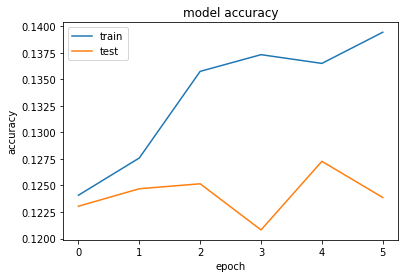

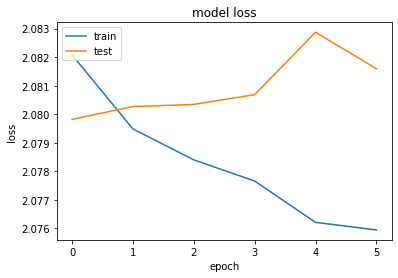

In [25]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
predictions = model.predict(test_x)

def get_card_from_encoding(encoding):
    gambels = encoding.argmax(axis=1)
    return np.vectorize(lambda x:possible_result[x])(gambels)

  1/266 [..............................] - ETA: 3:24

  2/266 [..............................] - ETA: 35s 

  3/266 [..............................] - ETA: 35s

  4/266 [..............................] - ETA: 35s

  5/266 [..............................] - ETA: 34s

  6/266 [..............................] - ETA: 34s

  7/266 [..............................] - ETA: 33s

  8/266 [..............................] - ETA: 33s

  9/266 [>.............................] - ETA: 33s

 10/266 [>.............................] - ETA: 33s

 11/266 [>.............................] - ETA: 33s

 12/266 [>.............................] - ETA: 33s

 13/266 [>.............................] - ETA: 33s

 14/266 [>.............................] - ETA: 32s

 15/266 [>.............................] - ETA: 32s

 16/266 [>.............................] - ETA: 32s

 17/266 [>.............................] - ETA: 31s

 18/266 [=>............................] - ETA: 31s

 19/266 [=>............................] - ETA: 31s

 20/266 [=>............................] - ETA: 31s

 21/266 [=>............................] - ETA: 31s

 22/266 [=>............................] - ETA: 30s

 23/266 [=>............................] - ETA: 30s

 24/266 [=>............................] - ETA: 30s

 25/266 [=>............................] - ETA: 30s

 26/266 [=>............................] - ETA: 30s

 27/266 [==>...........................] - ETA: 30s

 28/266 [==>...........................] - ETA: 30s

 29/266 [==>...........................] - ETA: 29s

 30/266 [==>...........................] - ETA: 29s

 31/266 [==>...........................] - ETA: 29s

 32/266 [==>...........................] - ETA: 29s

 33/266 [==>...........................] - ETA: 29s

 34/266 [==>...........................] - ETA: 29s

 35/266 [==>...........................] - ETA: 29s

 36/266 [===>..........................] - ETA: 29s

 37/266 [===>..........................] - ETA: 28s

 38/266 [===>..........................] - ETA: 28s

 39/266 [===>..........................] - ETA: 28s

 40/266 [===>..........................] - ETA: 28s

 41/266 [===>..........................] - ETA: 28s

 42/266 [===>..........................] - ETA: 28s

 43/266 [===>..........................] - ETA: 28s

 44/266 [===>..........................] - ETA: 28s

 45/266 [====>.........................] - ETA: 27s

 46/266 [====>.........................] - ETA: 27s

 47/266 [====>.........................] - ETA: 27s

 48/266 [====>.........................] - ETA: 27s

 49/266 [====>.........................] - ETA: 27s

 50/266 [====>.........................] - ETA: 27s

 51/266 [====>.........................] - ETA: 27s

 52/266 [====>.........................] - ETA: 27s

 53/266 [====>.........................] - ETA: 27s

 54/266 [=====>........................] - ETA: 26s

 55/266 [=====>........................] - ETA: 26s

 56/266 [=====>........................] - ETA: 26s

 57/266 [=====>........................] - ETA: 26s

 58/266 [=====>........................] - ETA: 26s

 59/266 [=====>........................] - ETA: 26s

 60/266 [=====>........................] - ETA: 26s

 61/266 [=====>........................] - ETA: 26s

 62/266 [=====>........................] - ETA: 26s

 63/266 [======>.......................] - ETA: 26s

 64/266 [======>.......................] - ETA: 25s

 65/266 [======>.......................] - ETA: 25s

 66/266 [======>.......................] - ETA: 25s

 67/266 [======>.......................] - ETA: 25s

 68/266 [======>.......................] - ETA: 25s

 69/266 [======>.......................] - ETA: 25s

 70/266 [======>.......................] - ETA: 25s

 71/266 [=======>......................] - ETA: 25s

 72/266 [=======>......................] - ETA: 25s

 73/266 [=======>......................] - ETA: 25s

 74/266 [=======>......................] - ETA: 24s

 75/266 [=======>......................] - ETA: 24s

 76/266 [=======>......................] - ETA: 24s

 77/266 [=======>......................] - ETA: 24s

 78/266 [=======>......................] - ETA: 24s

 79/266 [=======>......................] - ETA: 24s

 80/266 [========>.....................] - ETA: 24s

 81/266 [========>.....................] - ETA: 24s

 82/266 [========>.....................] - ETA: 23s

 83/266 [========>.....................] - ETA: 23s

 84/266 [========>.....................] - ETA: 23s

 85/266 [========>.....................] - ETA: 23s

 86/266 [========>.....................] - ETA: 23s

 87/266 [========>.....................] - ETA: 23s

 88/266 [========>.....................] - ETA: 23s

 89/266 [=========>....................] - ETA: 23s

 90/266 [=========>....................] - ETA: 22s

 91/266 [=========>....................] - ETA: 22s

 92/266 [=========>....................] - ETA: 22s

 93/266 [=========>....................] - ETA: 22s

 94/266 [=========>....................] - ETA: 22s

 95/266 [=========>....................] - ETA: 22s

 96/266 [=========>....................] - ETA: 22s

 97/266 [=========>....................] - ETA: 22s

 98/266 [==========>...................] - ETA: 22s

 99/266 [==========>...................] - ETA: 21s

100/266 [==========>...................] - ETA: 21s

101/266 [==========>...................] - ETA: 21s

102/266 [==========>...................] - ETA: 21s

103/266 [==========>...................] - ETA: 21s

104/266 [==========>...................] - ETA: 21s

105/266 [==========>...................] - ETA: 21s

106/266 [==========>...................] - ETA: 21s

107/266 [===========>..................] - ETA: 20s

108/266 [===========>..................] - ETA: 20s

109/266 [===========>..................] - ETA: 20s

110/266 [===========>..................] - ETA: 20s

111/266 [===========>..................] - ETA: 20s

112/266 [===========>..................] - ETA: 20s

113/266 [===========>..................] - ETA: 20s

114/266 [===========>..................] - ETA: 20s

115/266 [===========>..................] - ETA: 19s

116/266 [============>.................] - ETA: 19s

117/266 [============>.................] - ETA: 19s

118/266 [============>.................] - ETA: 19s

119/266 [============>.................] - ETA: 19s

120/266 [============>.................] - ETA: 19s

121/266 [============>.................] - ETA: 19s

122/266 [============>.................] - ETA: 19s

123/266 [============>.................] - ETA: 18s

124/266 [============>.................] - ETA: 18s

125/266 [=============>................] - ETA: 18s

126/266 [=============>................] - ETA: 18s

127/266 [=============>................] - ETA: 18s

128/266 [=============>................] - ETA: 18s

129/266 [=============>................] - ETA: 18s

130/266 [=============>................] - ETA: 18s

131/266 [=============>................] - ETA: 17s

132/266 [=============>................] - ETA: 17s

133/266 [==============>...............] - ETA: 17s

134/266 [==============>...............] - ETA: 17s

135/266 [==============>...............] - ETA: 17s

136/266 [==============>...............] - ETA: 17s

137/266 [==============>...............] - ETA: 17s

138/266 [==============>...............] - ETA: 17s

139/266 [==============>...............] - ETA: 16s

140/266 [==============>...............] - ETA: 16s

141/266 [==============>...............] - ETA: 16s

142/266 [===============>..............] - ETA: 16s

143/266 [===============>..............] - ETA: 16s

144/266 [===============>..............] - ETA: 16s

145/266 [===============>..............] - ETA: 16s

146/266 [===============>..............] - ETA: 16s

147/266 [===============>..............] - ETA: 15s

148/266 [===============>..............] - ETA: 15s

149/266 [===============>..............] - ETA: 15s

150/266 [===============>..............] - ETA: 15s

151/266 [================>.............] - ETA: 15s

152/266 [================>.............] - ETA: 15s

153/266 [================>.............] - ETA: 15s

154/266 [================>.............] - ETA: 15s

155/266 [================>.............] - ETA: 14s

156/266 [================>.............] - ETA: 14s

157/266 [================>.............] - ETA: 14s

158/266 [================>.............] - ETA: 14s

159/266 [================>.............] - ETA: 14s

160/266 [=================>............] - ETA: 14s

161/266 [=================>............] - ETA: 14s

162/266 [=================>............] - ETA: 14s

163/266 [=================>............] - ETA: 14s

164/266 [=================>............] - ETA: 13s

165/266 [=================>............] - ETA: 13s

166/266 [=================>............] - ETA: 13s

167/266 [=================>............] - ETA: 13s

168/266 [=================>............] - ETA: 13s

169/266 [==================>...........] - ETA: 13s

170/266 [==================>...........] - ETA: 13s

171/266 [==================>...........] - ETA: 12s

172/266 [==================>...........] - ETA: 12s

173/266 [==================>...........] - ETA: 12s

174/266 [==================>...........] - ETA: 12s

175/266 [==================>...........] - ETA: 12s

176/266 [==================>...........] - ETA: 12s

177/266 [==================>...........] - ETA: 12s

178/266 [===================>..........] - ETA: 12s

179/266 [===================>..........] - ETA: 11s

180/266 [===================>..........] - ETA: 11s

181/266 [===================>..........] - ETA: 11s

182/266 [===================>..........] - ETA: 11s

183/266 [===================>..........] - ETA: 11s

184/266 [===================>..........] - ETA: 11s

185/266 [===================>..........] - ETA: 11s

186/266 [===================>..........] - ETA: 11s

187/266 [====================>.........] - ETA: 10s

188/266 [====================>.........] - ETA: 10s

189/266 [====================>.........] - ETA: 10s

190/266 [====================>.........] - ETA: 10s

191/266 [====================>.........] - ETA: 10s

192/266 [====================>.........] - ETA: 10s

193/266 [====================>.........] - ETA: 10s

194/266 [====================>.........] - ETA: 9s 

195/266 [====================>.........] - ETA: 9s

196/266 [=====================>........] - ETA: 9s

197/266 [=====================>........] - ETA: 9s

198/266 [=====================>........] - ETA: 9s

199/266 [=====================>........] - ETA: 9s

200/266 [=====================>........] - ETA: 9s

201/266 [=====================>........] - ETA: 8s

202/266 [=====================>........] - ETA: 8s

203/266 [=====================>........] - ETA: 8s

204/266 [======================>.......] - ETA: 8s

205/266 [======================>.......] - ETA: 8s

206/266 [======================>.......] - ETA: 8s

207/266 [======================>.......] - ETA: 8s

208/266 [======================>.......] - ETA: 8s

209/266 [======================>.......] - ETA: 7s

210/266 [======================>.......] - ETA: 7s

211/266 [======================>.......] - ETA: 7s

212/266 [======================>.......] - ETA: 7s

213/266 [=======================>......] - ETA: 7s

214/266 [=======================>......] - ETA: 7s

215/266 [=======================>......] - ETA: 7s

216/266 [=======================>......] - ETA: 6s

217/266 [=======================>......] - ETA: 6s

218/266 [=======================>......] - ETA: 6s

219/266 [=======================>......] - ETA: 6s

220/266 [=======================>......] - ETA: 6s

221/266 [=======================>......] - ETA: 6s

222/266 [========================>.....] - ETA: 6s

223/266 [========================>.....] - ETA: 5s

224/266 [========================>.....] - ETA: 5s

225/266 [========================>.....] - ETA: 5s

226/266 [========================>.....] - ETA: 5s

227/266 [========================>.....] - ETA: 5s

228/266 [========================>.....] - ETA: 5s

229/266 [========================>.....] - ETA: 5s

230/266 [========================>.....] - ETA: 5s

231/266 [=========================>....] - ETA: 4s

232/266 [=========================>....] - ETA: 4s

233/266 [=========================>....] - ETA: 4s

234/266 [=========================>....] - ETA: 4s

235/266 [=========================>....] - ETA: 4s

236/266 [=========================>....] - ETA: 4s

237/266 [=========================>....] - ETA: 4s

238/266 [=========================>....] - ETA: 3s

239/266 [=========================>....] - ETA: 3s

240/266 [==========================>...] - ETA: 3s

241/266 [==========================>...] - ETA: 3s

242/266 [==========================>...] - ETA: 3s

243/266 [==========================>...] - ETA: 3s

244/266 [==========================>...] - ETA: 3s

245/266 [==========================>...] - ETA: 2s

246/266 [==========================>...] - ETA: 2s

247/266 [==========================>...] - ETA: 2s

248/266 [==========================>...] - ETA: 2s

249/266 [===========================>..] - ETA: 2s

250/266 [===========================>..] - ETA: 2s

251/266 [===========================>..] - ETA: 2s

252/266 [===========================>..] - ETA: 1s

253/266 [===========================>..] - ETA: 1s

254/266 [===========================>..] - ETA: 1s

255/266 [===========================>..] - ETA: 1s

256/266 [===========================>..] - ETA: 1s

257/266 [===========================>..] - ETA: 1s

258/266 [============================>.] - ETA: 1s

259/266 [============================>.] - ETA: 0s

260/266 [============================>.] - ETA: 0s

261/266 [============================>.] - ETA: 0s

262/266 [============================>.] - ETA: 0s

263/266 [============================>.] - ETA: 0s

264/266 [============================>.] - ETA: 0s

265/266 [============================>.] - ETA: 0s

266/266 [==============================] - ETA: 0s

266/266 [==============================] - 38s 140ms/step


In [27]:
# predictions_cards = get_card_from_encoding(predictions)
# true_cards = get_card_from_encoding(test_y)

# compute_statistics(predictions_cards,true_cards)